# Representación gráfica de las relaciones de dispersión TFG (matplotlib)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider, IntSlider, Checkbox
from typing import List, Tuple
from scipy import constants as const #De aquí puedo obtener las constantes físicas para el w_D
%config InlineBackend.figure_format = 'retina'  # para que se me vean en alta resolución  || tal cual copiado de google no sé que significa

from matplotlib.backends.backend_pdf import PdfPages
from pathlib import Path
import re

def export_pdf(basename="celda", folder="figs_pdf", multipage=False, close=True):
    """
    Guarda en PDF todas las figuras actualmente abiertas.
    - basename: prefijo para el nombre de archivo
    - folder: carpeta de salida
    - multipage: además crea un PDF multipágina con todas las figuras de la celda
    - close: cierra las figuras tras guardar (recomendado para no re-guardar en la siguiente celda)
    """
    Path(folder).mkdir(exist_ok=True)
    figs = [plt.figure(n) for n in plt.get_fignums()]
    if not figs:
        print("No hay figuras que exportar.")
        return

    # nombre “limpio”
    def slug(s): 
        s = re.sub(r"\s+", "_", str(s).strip())
        return re.sub(r"[^\w\-.]", "", s) or "fig"

    # guarda cada figura en su propio PDF
    for i, fig in enumerate(figs, 1):
        try: fig.tight_layout()
        except Exception: pass
        name = f"{basename}_{i:02d}" if len(figs) > 1 else basename
        fp = Path(folder) / f"{slug(name)}.pdf"
        fig.savefig(fp, bbox_inches="tight")
        print(f"✔ Guardado: {fp}")

    # opcional: un PDF multipágina con todas
    if multipage and len(figs) > 1:
        mp = Path(folder) / f"{slug(basename)}_multipage.pdf"
        with PdfPages(mp) as pdf:
            for fig in figs:
                pdf.savefig(fig, bbox_inches="tight")
        print(f"✔ Guardado multipágina: {mp}")

    if close:
        for fig in figs:
            plt.close(fig)


In [2]:
#Parámetros
Ef = 0.63
w_D = 2*Ef*const.alpha
    #Si02
eps_inf_si = 2.1
w_l0_si = 1244*100*const.h*const.c/const.e #en eV
w_t0_si = 105200*const.h*const.c/const.e   #en eV
y_0_si = 0.073*w_l0_si 
    #Al2O3
eps_inf_al = 2.5
w_l0_al = 93600*const.h*const.c/const.e   #en eV
w_t0_al = 77200*const.h*const.c/const.e   #en eV
y_0_al = 0.18*w_l0_al

factor_global= 100*const.h*const.c/const.e #para el eje X

w_D

0.009194664237318

# Grafeno

## 1. Polaritón plasmónico de grafeno

Relación de dispersión $$w^2 = \frac{2\cdot k_x \cdot w_D \cdot c}{\epsilon_1+\epsilon_2} $$

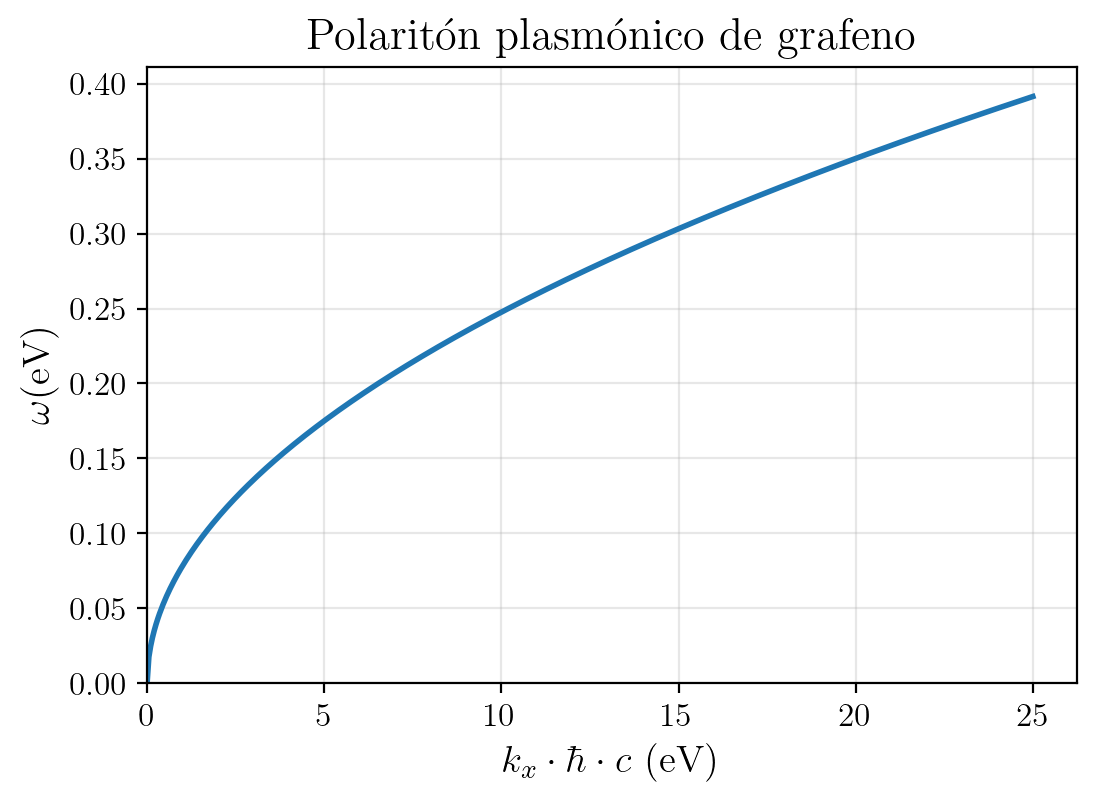

In [3]:
plt.rcParams.update({ # --- Parámetros (copiado de internet para cambiar lo de Latex) ---
    "text.usetex": True,  #Para tipografía de Latex
    "font.family": "serif",
    "font.size": 12,
    "axes.labelsize": 14,
    "axes.titlesize": 16,
    "legend.fontsize": 12,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
    "lines.linewidth": 2,
    "lines.markersize": 6,
    "axes.grid": True,
    "grid.alpha": 0.3
})

# --- Creación de los datos: manipular esto para cada ejemplo, el resto no tocar ---
fig, ax = plt.subplots(figsize=(6, 4))
ax.set_title("Polaritón plasmónico de grafeno") #Título de la gráfica
x = np.linspace(0,25,500)
y = (2*x*w_D/(1+2))**(1/2) # --- Suponemos un epsilon1 = aire = 1 y un epsilon2 = 2
ax.plot(x,y)

# --- Etiquetas, título y leyenda ---

ax.set_xlabel(r"$k_x \cdot \hbar \cdot c$ (eV)")
ax.set_ylabel("$\omega$(eV)")


# --- Límites y anotaciones ---
ax.set_xlim(0,)
ax.set_ylim(0,)

plt.show()



## 2. Polaritón plasmónico de grafeno: dos monocapas

Relación de dispersión $$w_1^2 = \frac{2\cdot k_x \cdot w_D \cdot c \cdot senh(d\cdot k_x/2)}{\epsilon_1senh(d\cdot k_x/2)+\epsilon_2cosh(d\cdot k_x/2)} $$ y $$w_2^2 = \frac{2\cdot k_x \cdot w_D \cdot c \cdot cosh(d\cdot k_x/2)}{\epsilon_1senh(d\cdot k_x/2)+\epsilon_2cosh(d\cdot k_x/2)} $$

Cuando miramos el límite asintótico con $k_x \to \infty$ tenemos que ambas soluciones tenderán a:

$$w_{\infty}^2 = \frac{2\cdot k_x \cdot w_D \cdot c  }{\epsilon_1+\epsilon_2} $$

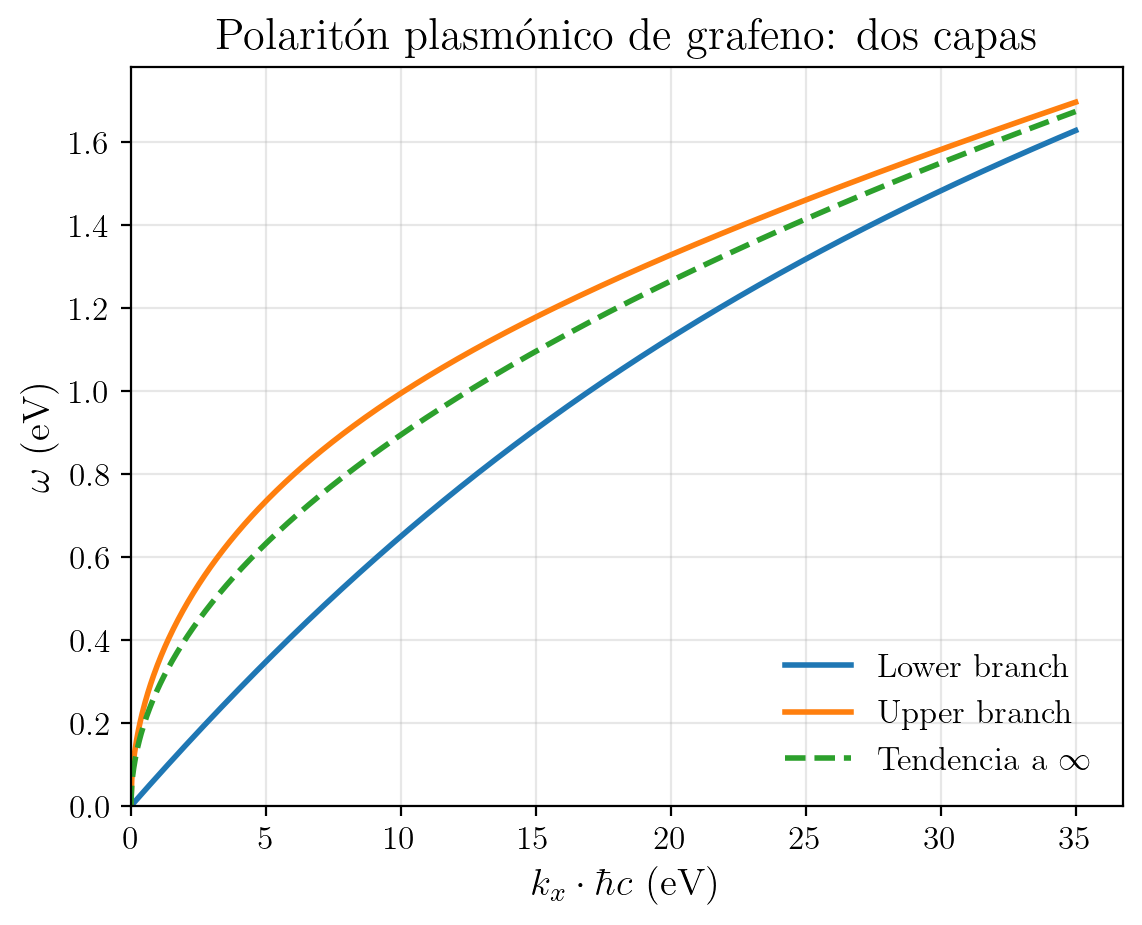

In [4]:
d_nm = 18.0   #Espesor lámina






# --- Render ---
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.size": 12,
    "axes.labelsize": 14,
    "axes.titlesize": 16,
    "legend.fontsize": 12,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
    "lines.linewidth": 2,
    "lines.markersize": 6,
    "axes.grid": True,
    "grid.alpha": 0.3
})

# ====== Parámetros físicos (ajusta a tus valores) ======
HBARC_EV_NM = 197.3269804     # ℏc en eV·nm
                # separación total (dos capas), en nm
d = d_nm / HBARC_EV_NM        # d en eV^{-1}  (~0.0912 eV^{-1})
eps1, eps2 = 1.0, 2.0         # aire y dieléctrico ejemplo
w_D = 0.12                    # ejemplo en eV (pon tu valor real)

# ====== Eje x: kx·ℏc en eV ======
x = np.linspace(0.0, 35.0, 1000)   # x ≡ kx·ℏc (eV)
kx_eV = x                           # por conveniencia

# Argumento adimensional para hiperbólicas: (kx * d/2) = (x * d / 2)
arg = kx_eV * (d / 2.0)

# ====== Ramas (dos capas) ======
den = (eps1 * np.sinh(arg) + 2.0 * np.cosh(arg))
y_1 = np.sqrt( (2.0 * kx_eV * w_D * np.sinh(arg)) / den )   # Lower branch
y_2 = np.sqrt( (2.0 * kx_eV * w_D * np.cosh(arg)) / den )   # Upper branch

# Asíntota a kx→∞ (línea discontinua)
y_asymp = np.sqrt( 2.0 * kx_eV * w_D / (eps1 + 2.0) )

# --- Plot ---
fig, ax = plt.subplots()
ax.set_title("Polaritón plasmónico de grafeno: dos capas")

ax.plot(x, y_1, label='Lower branch')
ax.plot(x, y_2, label='Upper branch')
ax.plot(x, y_asymp, '--', label=r'Tendencia a $\infty$')

ax.set_xlabel(r"$k_x \cdot \hbar c$ (eV)")
ax.set_ylabel(r"$\omega$ (eV)")
ax.legend(loc="lower right", frameon=False)
ax.set_xlim(0, None)
ax.set_ylim(0, None)
  
plt.show()


## 3. Polaritón plasmónico de grafeno acústico I

Relación de dispersión $$w^2 = \frac{2\cdot k_x \cdot w_D \cdot c \cdot senh(d\cdot k_x)}{\epsilon_1senh(d\cdot k_x)+\epsilon_2cosh(d\cdot k_x)}$$

Cuando tiende $k_x \to \infty$ nuevamente
$$w^2 = \frac{2\cdot k_x \cdot w_D \cdot c }{\epsilon_1+\epsilon_2}$$

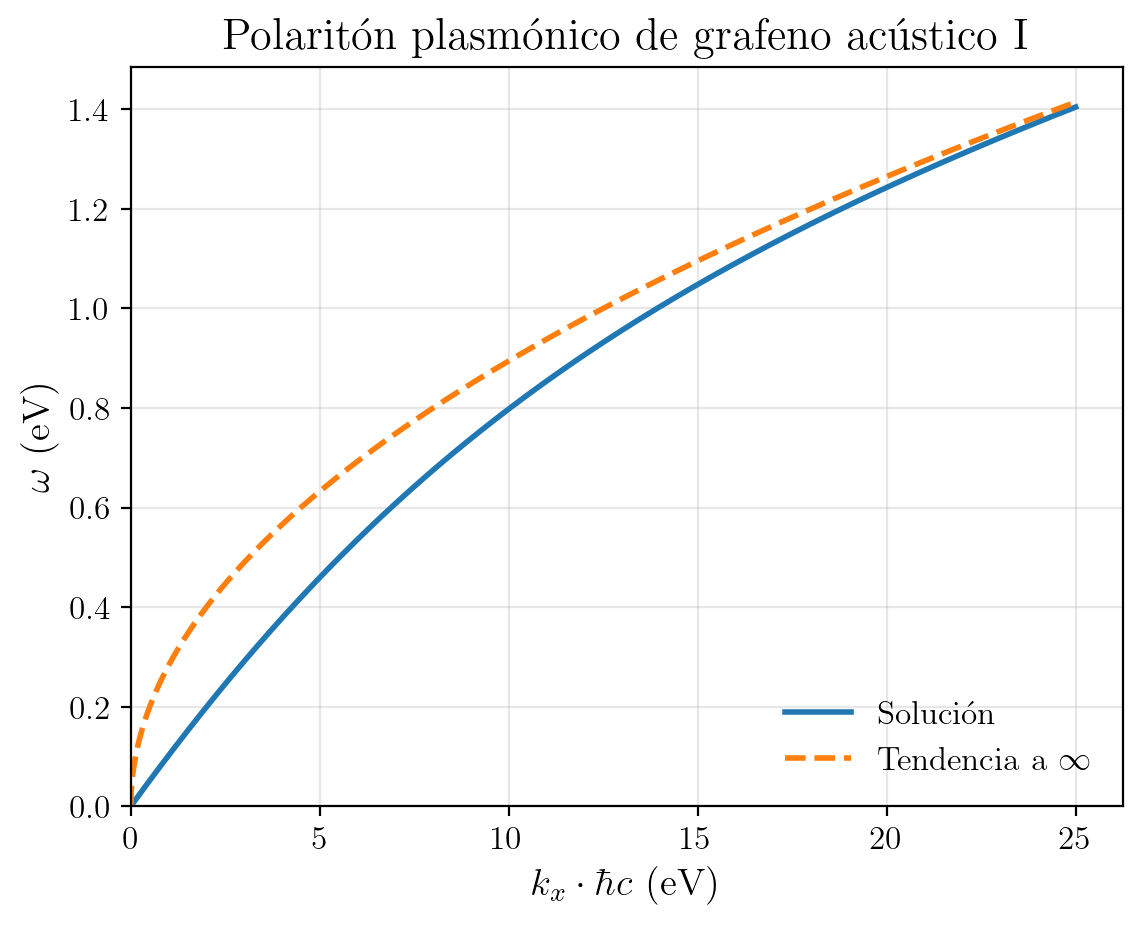

In [5]:
#Definición de d - parámetro de cuentas
plt.rcParams.update({ # --- Parámetros (copiado de internet para cambiar lo de Latex) ---
    "text.usetex": True,  #Para tipografía de Latex
    "font.family": "serif",
    "font.size": 12,
    "axes.labelsize": 14,
    "axes.titlesize": 16,
    "legend.fontsize": 12,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
    "lines.linewidth": 2,
    "lines.markersize": 6,
    "axes.grid": True,
    "grid.alpha": 0.3
})

# --- Creación de los datos: manipular esto para cada ejemplo, el resto no tocar ---
fig, ax = plt.subplots()
ax.set_title("Polaritón plasmónico de grafeno acústico I") #Título de la gráfica
HBAR_C_EV_NM = 197.3269804  # eV·nm

d_nm = 18.0
d = d_nm / HBAR_C_EV_NM     # d en eV^{-1}  ≈ 0.091219

x = np.linspace(0, 25, 3000)   # x ≡ kx·ħc en eV
kx_eV = x                       # kx expresado en eV (definición)

arg = kx_eV * d                 # adimensional

y_1 = np.sqrt( (2 * kx_eV * w_D * np.sinh(arg)) /
               (1.0 * np.sinh(arg) + 2.0 * np.cosh(arg)) )

y_asymp = np.sqrt( 2 * kx_eV * w_D / (1.0 + 2.0) )

ax.plot(x, y_1, label='Solución')
ax.plot(x, y_asymp, '--', label='Tendencia a $\infty$')
ax.set_xlabel(r"$k_x \cdot \hbar c$ (eV)")
ax.set_ylabel(r"$\omega$ (eV)")

ax.legend(loc="lower right", frameon=False)

# --- Límites y anotaciones ---
ax.set_xlim(0,)
ax.set_ylim(0,)
  
plt.show()

## 4. Polaritón plasmónico de grafeno acústico II

Relación de dispersión 

$$w^2= \frac{2 c k_x w_D (\epsilon_3 cosh(h_3k_x) senh(h_2k_x)+(2\epsilon_2 cosh(h_2k_x)+\epsilon_1 senh(h_2k_x))senh(h_3k_x)) -\sqrt{2c^2k_x^2w_D^2((-\epsilon_1^2+8\epsilon_2^2+\epsilon_1^2 cosh(2h_2k_x))senh(h_3k_x)^2+2\epsilon_3senh(h_2k_x)^2(\epsilon_3cosh(h_2k_x)^2-\epsilon_1senh(2h_3k_3))}}{2\epsilon_3cosh(h_3k_x)(\epsilon_2cosh(h_2k_x)+\epsilon_1senh(h_2k_x))+2\epsilon_2(\epsilon_1cosh(h_2k_x)+\epsilon_2senh(h_2k_x))senh(h_3k_x)))}$$


$$w^2= \frac{2 c k_x w_D (\epsilon_3 cosh(h_3k_x) senh(h_2k_x)+(2\epsilon_2 cosh(h_2k_x)+\epsilon_1 senh(h_2k_x))senh(h_3k_x)) +\sqrt{2c^2k_x^2w_D^2((-\epsilon_1^2+8\epsilon_2^2+\epsilon_1^2 cosh(2h_2k_x))senh(h_3k_x)^2+2\epsilon_3senh(h_2k_x)^2(\epsilon_3cosh(h_2k_x)^2-\epsilon_1senh(2h_3k_3))}}{2\epsilon_3cosh(h_3k_x)(\epsilon_2cosh(h_2k_x)+\epsilon_1senh(h_2k_x))+2\epsilon_2(\epsilon_1cosh(h_2k_x)+\epsilon_2senh(h_2k_x))senh(h_3k_x)))}$$

Hay algún comportamiento extraño cuando las h_2 $\neq$ h_3. Hay que revisar.

También notar que cuando hamos el límite con d$\to 0$ y $\epsilon_2 \to 1$ obtenemos que una expresión es 0, y la otra es:

$$w^2 = \frac{4ck_xw_D sinh(h_3k_x)}{\epsilon_3cosh(h_3k_x)+\epsilon_1sinh(h_3k_x)}$$

Hay un factor raíz de dos respecto a la relación de dispersión vista en el apartado #3



### Límite asintótico $k_x \to \infty$

Para \(h_2>0,\, h_3>0\), usando \(\cosh(a k_x)\sim \sinh(a k_x)\sim \tfrac12 e^{a k_x}\), se obtiene

$$
w^2 \;=\;
\frac{2 c\, w_D\, k_x}{2(\epsilon_1+\epsilon_2)(\epsilon_2+\epsilon_3)}
\Big[(\epsilon_1+\epsilon_2)+(\epsilon_2+\epsilon_3)\mp\big|(\epsilon_1+\epsilon_2)-(\epsilon_2+\epsilon_3)\big|\Big].
$$

Definiendo $a=\epsilon_1+\epsilon_2$ y $b=\epsilon_2+\epsilon_3$, el corchete es $(a+b)\mp|a-b|$, de donde salen las dos ramas:

$$
\boxed{\,w^2 \to \frac{2 c\, w_D\, k_x}{\epsilon_1+\epsilon_2}\,}
\qquad\text{y}\qquad
\boxed{\,w^2 \to \frac{2 c\, w_D\, k_x}{\epsilon_2+\epsilon_3}\,}
$$

Si $\epsilon_1=\epsilon_3$, ambas coinciden:
$$
w^2 \to \frac{2 c\, w_D\, k_x}{\epsilon_1+\epsilon_2}
$$


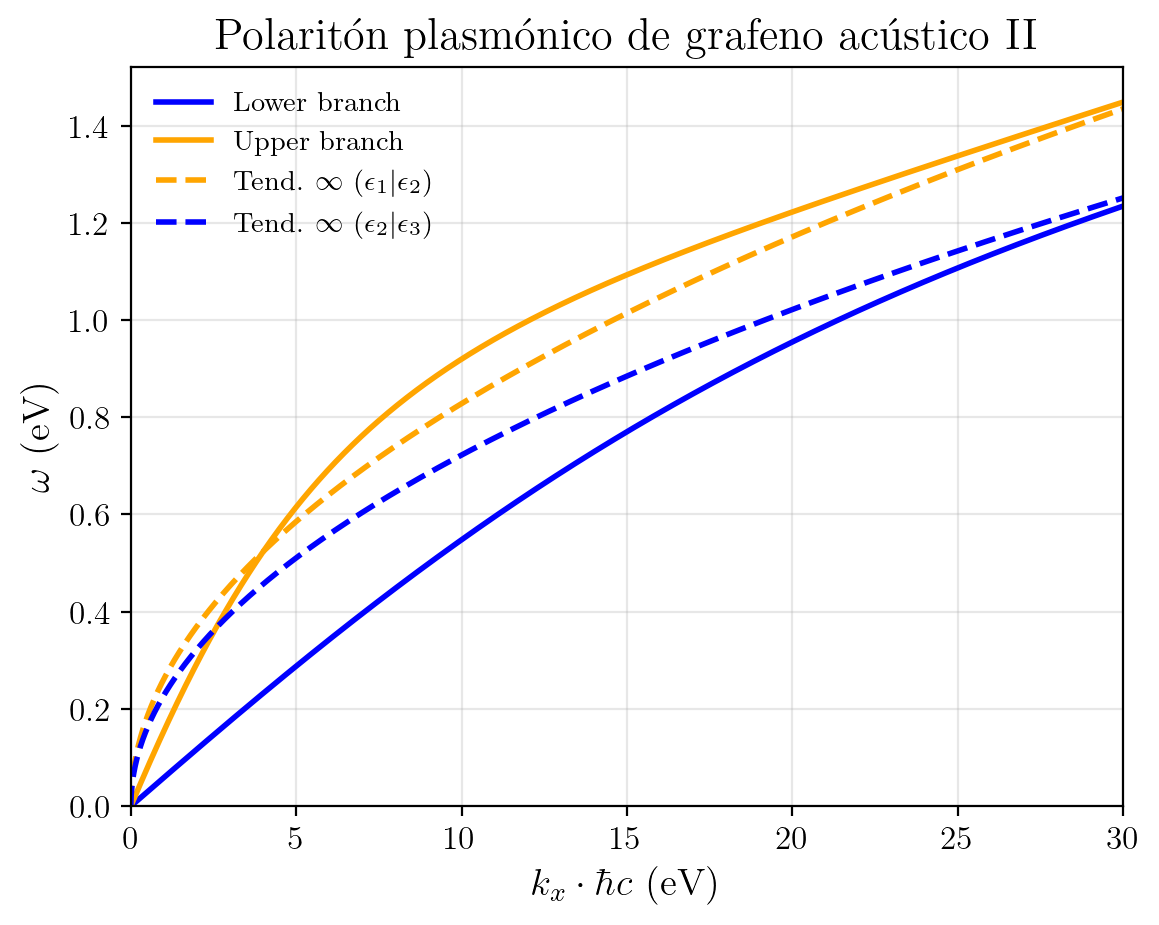

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# --- Estilo de plot (tu bloque) ---
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.size": 12,
    "axes.labelsize": 14,
    "axes.titlesize": 16,
    "legend.fontsize": 12,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
    "lines.linewidth": 2,
    "lines.markersize": 6,
    "axes.grid": True,
    "grid.alpha": 0.3
})

# =======================
# Parámetros y unidades
# =======================
HBARC_EV_NM = 197.3269804  # ℏc en eV·nm

# Epsilon (adimensionales)
epsilon_1 = 1.0
epsilon_2 = eps_inf_al     # pon aquí tu valor
epsilon_3 = eps_inf_si     # pon aquí tu valor

# Frecuencia característica (en eV)
# w_D debe estar en eV
# w_D = 0.12  # <-- ejemplo; usa tu valor real

# Espesores de las capas en nm (AJUSTA ESTO A TUS VALORES)
h2_nm = 18.0   # capa 2
h3_nm = 18.0   # capa 3

# Convertir a eV^{-1}
h_2 = h2_nm / HBARC_EV_NM
h_3 = h3_nm / HBARC_EV_NM

# =======================
# Eje x: kx·ℏc (en eV)
# =======================
# factor_global debe ser el máximo "X" en eV que quieres ver en el eje
x_max = 30
x = np.linspace(0.0, x_max, 3000)   # x ≡ kx·ℏc [eV]

# =======================
# Asíntotas (k->∞)
# =======================
yinf1 = np.sqrt(2.0 * x * w_D / (epsilon_1 + epsilon_2))
yinf2 = np.sqrt(2.0 * x * w_D / (epsilon_2 + epsilon_3))

# =======================
# Términos hiperbólicos (argumento adimensional)
# =======================
a2 = h_2 * x   # = kx*h2*ℏc (adimensional)
a3 = h_3 * x

s2, c2 = np.sinh(a2), np.cosh(a2)
s3, c3 = np.sinh(a3), np.cosh(a3)

# =======================
# Dispersión (dos ramas)
# =======================
# Raíz interna
arg_raiz = (2.0 * x**2 * w_D**2 *
           ((-epsilon_1**2 + 8.0 * epsilon_2**2 + epsilon_1**2 * np.cosh(2.0 * a2)) * (s3**2) +
            2.0 * epsilon_3 * (s2**2) * (epsilon_3 * (c2**2) - epsilon_1 * np.sinh(2.0 * a3))
           ))

# Evitar pequeños negativos por redondeo numérico
arg_raiz = np.clip(arg_raiz, 0.0, None)
sqrt_arg = np.sqrt(arg_raiz)

# Numerador antes de la raíz
numerador_antes_raiz = 2.0 * x * w_D * (epsilon_3 * c3 * s2 + (2.0 * epsilon_2 * c2 + epsilon_1 * s2) * s3)

# Denominador (adimensional)
denominador = 2.0 * epsilon_3 * c3 * (epsilon_2 * c2 + epsilon_1 * s2) + 2.0 * epsilon_2 * (epsilon_1 * c2 + epsilon_2 * s2) * s3

# Expresiones bajo la raíz exterior (deben ser ≥ 0 para obtener ω real)
inside1 = (numerador_antes_raiz - sqrt_arg) / denominador
inside2 = (numerador_antes_raiz + sqrt_arg) / denominador

# Filtrado de negativos (región evanescente -> NaN para no dibujar valores no reales)
omega1 = np.where(inside1 >= 0.0, np.sqrt(inside1), np.nan)
omega2 = np.where(inside2 >= 0.0, np.sqrt(inside2), np.nan)

# =======================
# Plot
# =======================
fig, ax = plt.subplots()
ax.set_title("Polaritón plasmónico de grafeno acústico II")

ax.plot(x, omega1, label='Lower branch', color='blue')
ax.plot(x, omega2, label='Upper branch', color='orange')
ax.plot(x, yinf1, '--', label=r'Tend. $\infty$ ($\epsilon_1|\epsilon_2$)', color='orange')
ax.plot(x, yinf2, '--', label=r'Tend. $\infty$ ($\epsilon_2|\epsilon_3$)', color='blue')

ax.set_xlabel(r"$k_x \cdot \hbar c$ (eV)")
ax.set_ylabel(r"$\omega$ (eV)")
ax.legend(loc="upper left", frameon=False, fontsize='small')
ax.set_xlim(0, x_max)
ax.set_ylim(0, None)

plt.show()


Vamos a plotear las dos juntas, acústico I y II ya que veremos como una de las ramas tenderá a la otra (ya que a efectos prácticos en el infinito todas tienden a la primera expresión del polaritón plasmónico de grafeno.

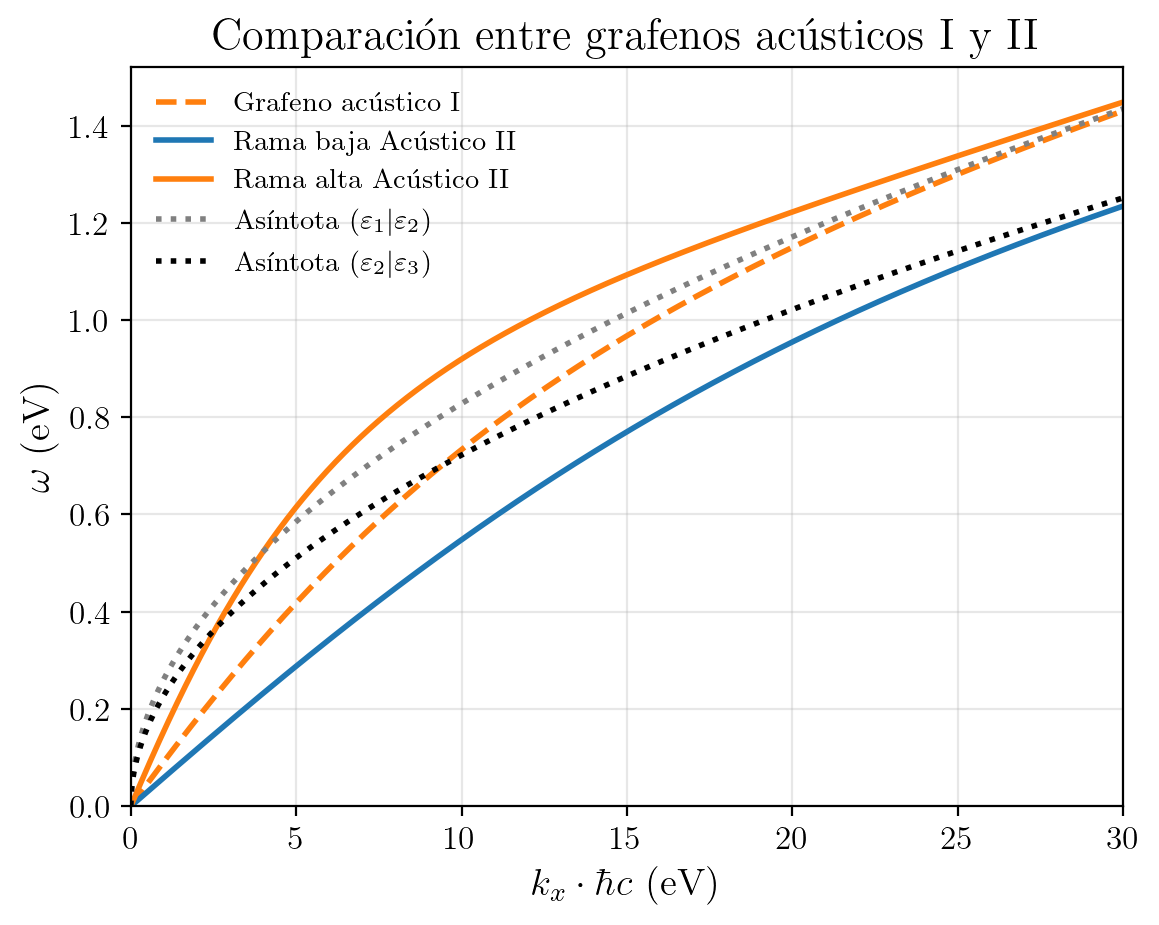

In [7]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams.update({
    "text.usetex": True, "font.family": "serif", "font.size": 12,
    "axes.labelsize": 14, "axes.titlesize": 16, "legend.fontsize": 12,
    "xtick.labelsize": 12, "ytick.labelsize": 12,
    "lines.linewidth": 2, "lines.markersize": 6,
    "axes.grid": True, "grid.alpha": 0.3
})

# --- Dielectricos (adimensionales) ---
epsilon_1 = 1.0
epsilon_2 = float(eps_inf_al)  # ya definidos por ti
epsilon_3 = float(eps_inf_si)

# --- Eje x: X = kx·ħc (eV) ---
x_max = 30
x = np.linspace(0.0, x_max, 3000)  # X en eV

# --- Espesores (deben estar en eV^{-1}) ---
# Asumo que ya tienes d, h_2, h_3 en eV^{-1}. Si los tienes en nm: divide por 197.3269804.
a  = d   * x          # adimensional
a2 = h_2 * x
a3 = h_3 * x

s,  c  = np.sinh(a),  np.cosh(a)
s2, c2 = np.sinh(a2), np.cosh(a2)
s3, c3 = np.sinh(a3), np.cosh(a3)

# --- Frecuencia característica (eV) ---
# w_D también ya definido por ti (en eV)

# ===== Grafeno acústico I (corregido) =====
# Cambio clave: '2' en el numerador (no epsilon_2)
y_I = np.sqrt( (2.0 * x * w_D * s) / (epsilon_1 * s + epsilon_2 * c) )

# ===== Grafeno acústico II =====
arg_raiz = (2.0 * x**2 * w_D**2 *
           ((-epsilon_1**2 + 8.0 * epsilon_2**2 + epsilon_1**2 * np.cosh(2.0 * a2)) * (s3**2) +
            2.0 * epsilon_3 * (s2**2) * (epsilon_3 * (c2**2) - epsilon_1 * np.sinh(2.0 * a3))))
arg_raiz = np.clip(arg_raiz, 0.0, None)
sqrt_arg = np.sqrt(arg_raiz)

num_pre = 2.0 * x * w_D * (epsilon_3 * c3 * s2 + (2.0 * epsilon_2 * c2 + epsilon_1 * s2) * s3)
den     = 2.0 * epsilon_3 * c3 * (epsilon_2 * c2 + epsilon_1 * s2) + 2.0 * epsilon_2 * (epsilon_1 * c2 + epsilon_2 * s2) * s3
den     = np.where(np.abs(den) > 1e-15, den, np.nan)

inside1 = (num_pre - sqrt_arg) / den
inside2 = (num_pre + sqrt_arg) / den

omega1 = np.where(inside1 >= 0.0, np.sqrt(inside1), np.nan)  # rama baja -> (ε2|ε3)
omega2 = np.where(inside2 >= 0.0, np.sqrt(inside2), np.nan)  # rama alta -> (ε1|ε2)

# ===== Asíntotas para verificar a ojo =====
y_inf_12 = np.sqrt( 2.0 * x * w_D / (epsilon_1 + epsilon_2) )
y_inf_23 = np.sqrt( 2.0 * x * w_D / (epsilon_2 + epsilon_3) )

# ===== Plot =====
fig, ax = plt.subplots()
ax.set_title("Comparación entre grafenos acústicos I y II")

ax.plot(x, y_I,    '--',  color='tab:orange', label='Grafeno acústico I')
ax.plot(x, omega1,       color='tab:blue',   label='Rama baja Acústico II')
ax.plot(x, omega2,       color='tab:orange', label='Rama alta  Acústico II')

# (opcionales) dibuja las asíntotas para comprobar la convergencia --- LOS LÍMITES DE LA GRÁFICA ANTERIOR
ax.plot(x, y_inf_12, ':', color='gray',  label=r'Asíntota $(\varepsilon_1|\varepsilon_2)$')
ax.plot(x, y_inf_23, ':', color='black', label=r'Asíntota $(\varepsilon_2|\varepsilon_3)$')

ax.set_xlabel(r"$k_x \cdot \hbar c$ (eV)")
ax.set_ylabel(r"$\omega$ (eV)")
ax.legend(loc="upper left", frameon=False, fontsize='small')
ax.set_xlim(0, x_max)
ax.set_ylim(0, None)

plt.show()



# Materiales polares

## 1. Polaritones fonónicos de volumen
Relación de dispersión $$w =  \sqrt{ \frac{c^2 k_x^2 + \varepsilon_\infty \omega_L^2 - \sqrt{(c^2 k_x^2 + \varepsilon_\infty \omega_L^2)^2 - 4 c^2 \varepsilon_\infty k_x^2 \omega_T^2}}{2\varepsilon_\infty} }$$ 
 $$w =  \sqrt{ \frac{c^2 k_x^2 + \varepsilon_\infty \omega_L^2 + \sqrt{(c^2 k_x^2 + \varepsilon_\infty \omega_L^2)^2 - 4 c^2 \varepsilon_\infty k_x^2 \omega_T^2}}{2\varepsilon_\infty} }$$
 
 Para los límites asíntoticos:
 
 ### 1. Cuando $kx \to 0$ 
 
 La ecuación es $$\varepsilon_\infty \frac{(wl^2 - w^2)}{(wt^2 - w^2)}\cdot w^2 = 0$$ cuya solución es $$w^2=0 \quad \text{y}\quad w^2=wl$$
 
 ### 2. Cuando $kx \to \infty$ hecho abajo
 
 

Vamos a representar tanto para el Si como para el Al

(0.0, 0.28689561477499187)

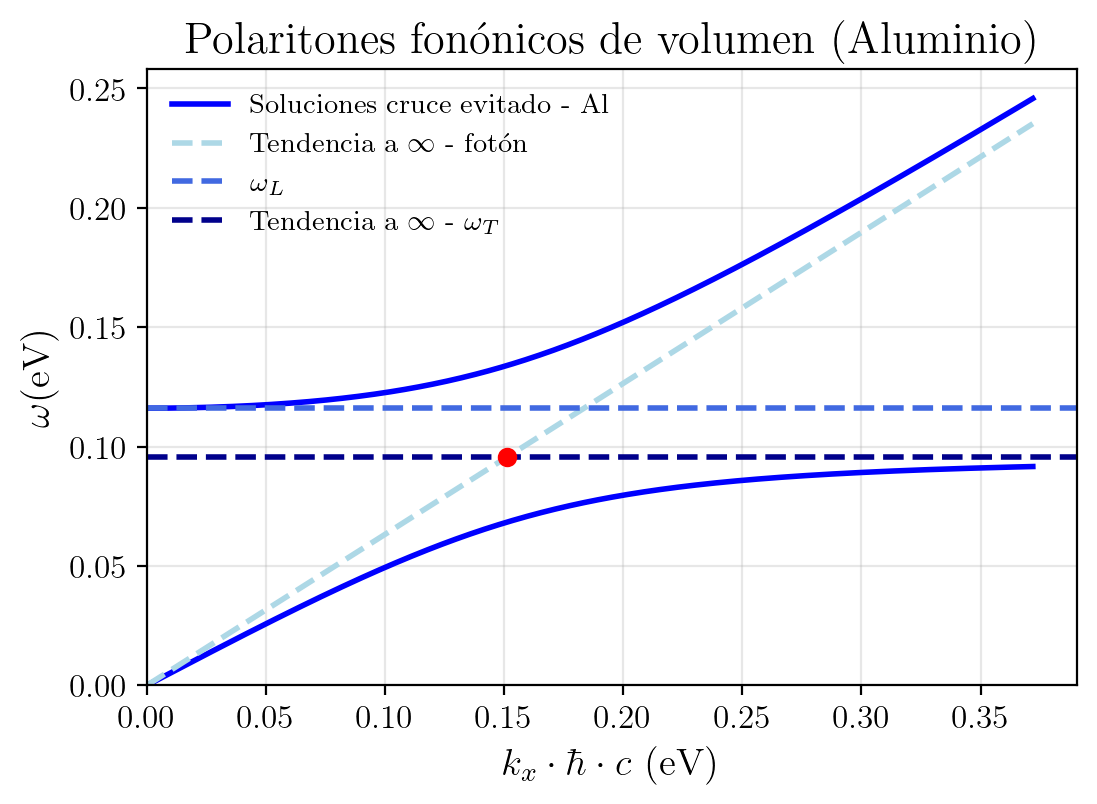

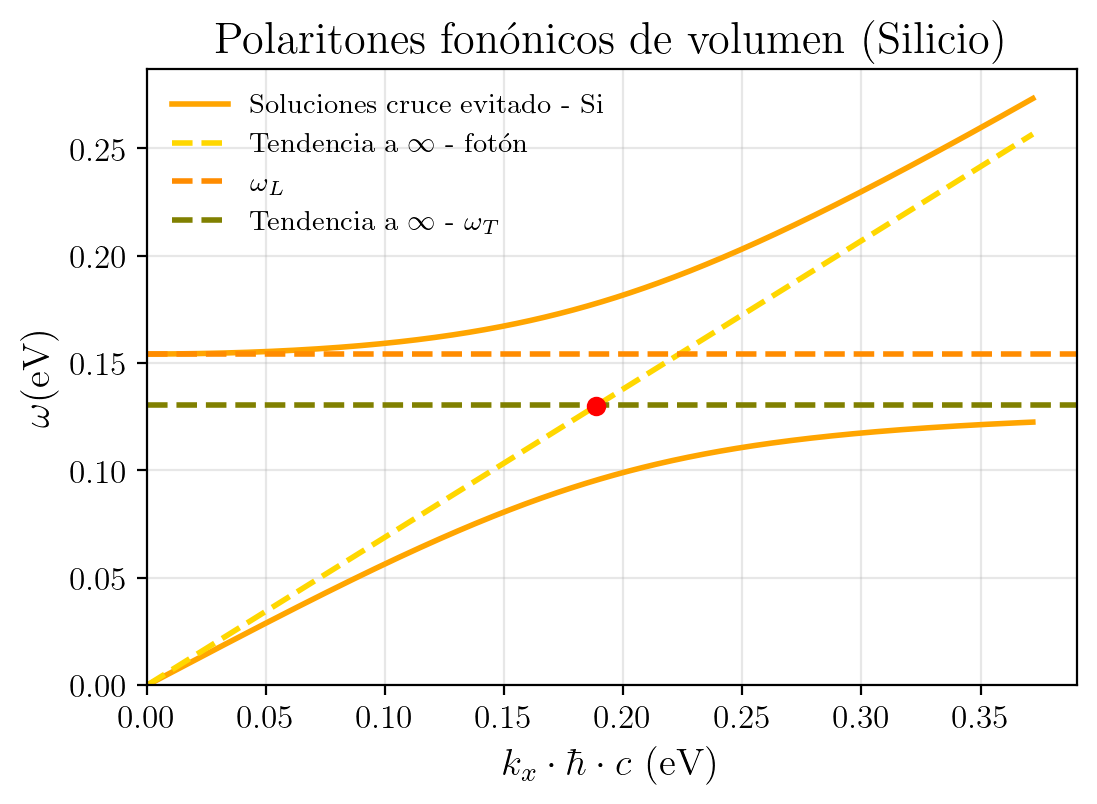

In [8]:
plt.rcParams.update({ # --- Parámetros (copiado de internet para cambiar lo de Latex) ---
    "text.usetex": True,  #Para tipografía de Latex
    "font.family": "serif",
    "font.size": 12,
    "axes.labelsize": 14,
    "axes.titlesize": 16,
    "legend.fontsize": 12,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
    "lines.linewidth": 2,
    "lines.markersize": 6,
    "axes.grid": True,
    "grid.alpha": 0.3
})

# --- Creación de los datos: manipular esto para cada ejemplo, el resto no tocar ---
fig, ax = plt.subplots(figsize=(6, 4))
ax.set_title("Polaritones fonónicos de volumen (Aluminio)") #Título de la gráfica
x = np.linspace(0,3000*factor_global,500)

y1al = np.sqrt((x**2+eps_inf_al*w_l0_al**2-np.sqrt((x**2+eps_inf_al*w_l0_al**2)**2-4*eps_inf_al*x**2*w_t0_al**2))/(2*eps_inf_al))
y2al = np.sqrt((x**2+eps_inf_al*w_l0_al**2+np.sqrt((x**2+eps_inf_al*w_l0_al**2)**2-4*eps_inf_al*x**2*w_t0_al**2))/(2*eps_inf_al))

fal = x/np.sqrt(eps_inf_al)
gal = w_t0_al
ax.plot(x,y1al,label='Soluciones cruce evitado - Al', color='blue')
ax.plot(x,y2al,color='blue')
ax.plot(x,fal,color='lightblue', linestyle ='--', label='Tendencia a $\infty$ - fotón')
plt.axhline(w_l0_al, color='royalblue', linestyle='--', linewidth=2, label='$\omega_L$')
plt.axhline(gal, color='darkblue', linestyle='--', linewidth=2, label='Tendencia a $\infty$ - $\omega_T$')

idx = np.argwhere(np.diff(np.sign(fal - gal))).flatten()
plt.plot(x[idx], fal[idx], 'ro')


# --- Etiquetas, título y leyenda ---

ax.set_xlabel(r"$k_x \cdot \hbar \cdot c$ (eV)")
ax.set_ylabel("$\omega$(eV)")
ax.legend(loc="upper left", frameon=False, fontsize='small' )

# --- Límites y anotaciones ---
ax.set_xlim(0,)
ax.set_ylim(0,)



# --- Creación de los datos: manipular esto para cada ejemplo, el resto no tocar ---
fig, ax = plt.subplots(figsize=(6, 4))
ax.set_title("Polaritones fonónicos de volumen (Silicio)") #Título de la gráfica
x = np.linspace(0,3000*factor_global,500)

y1si = np.sqrt((x**2+eps_inf_si*w_l0_si**2-np.sqrt((x**2+eps_inf_si*w_l0_si**2)**2-4*eps_inf_si*x**2*w_t0_si**2))/(2*eps_inf_si))
y2si = np.sqrt((x**2+eps_inf_si*w_l0_si**2+np.sqrt((x**2+eps_inf_si*w_l0_si**2)**2-4*eps_inf_si*x**2*w_t0_si**2))/(2*eps_inf_si))

fsi = x/np.sqrt(eps_inf_si)
gsi = w_t0_si
ax.plot(x,y1si,label='Soluciones cruce evitado - Si', color='orange')
ax.plot(x,y2si,color='orange')
ax.plot(x,fsi,color='gold', linestyle ='--', label='Tendencia a $\infty$ - fotón')
plt.axhline(w_l0_si, color='darkorange', linestyle='--', linewidth=2, label='$\omega_L$')
plt.axhline(gsi, color='olive', linestyle='--', linewidth=2, label='Tendencia a $\infty$ - $\omega_T$')

idx = np.argwhere(np.diff(np.sign(fsi - gsi))).flatten()

plt.plot(x[idx], fsi[idx], 'ro')


# --- Etiquetas, título y leyenda ---

ax.set_xlabel(r"$k_x \cdot \hbar \cdot c$ (eV)")
ax.set_ylabel("$\omega$(eV)")
ax.legend(loc="upper left", frameon=False, fontsize='small' )

# --- Límites y anotaciones ---
ax.set_xlim(0,)
ax.set_ylim(0,)


Ahora vamos a mostrar la diferencia entre $w_+ - w_-$ para pder ver el mínimo y compararlo con el gap del cruce evitado. Para el valor del mínimo gap del cruce evitado es la intersección entre el valor dado por $w_t$ y la línea de fonones, que para este caso vendrá dada por la ecuación $\varepsilon_{\infty}w^2=c^2k_x^2 \longrightarrow k_{min}=\sqrt{\varepsilon_{\infty}}w_t/c$

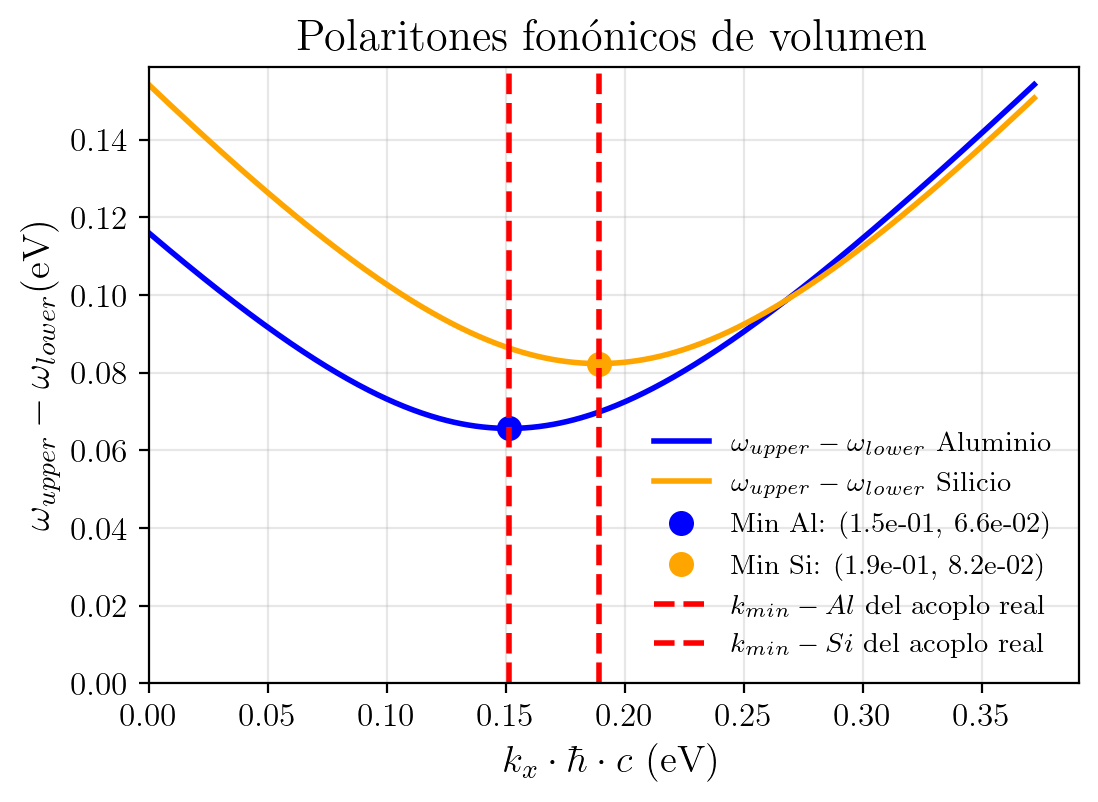

In [9]:
plt.rcParams.update({ # --- Parámetros (copiado de internet para cambiar lo de Latex) ---
    "text.usetex": True,  #Para tipografía de Latex
    "font.family": "serif",
    "font.size": 12,
    "axes.labelsize": 14,
    "axes.titlesize": 16,
    "legend.fontsize": 12,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
    "lines.linewidth": 2,
    "lines.markersize": 6,
    "axes.grid": True,
    "grid.alpha": 0.3
})

# --- Creación de los datos: manipular esto para cada ejemplo, el resto no tocar ---
fig, ax = plt.subplots(figsize=(6, 4))
ax.set_title("Polaritones fonónicos de volumen") #Título de la gráfica
x = np.linspace(0,3000*factor_global,500)

y1al = np.sqrt((x**2+eps_inf_al*w_l0_al**2-np.sqrt((x**2+eps_inf_al*w_l0_al**2)**2-4*eps_inf_al*x**2*w_t0_al**2))/(2*eps_inf_al))
y2al = np.sqrt((x**2+eps_inf_al*w_l0_al**2+np.sqrt((x**2+eps_inf_al*w_l0_al**2)**2-4*eps_inf_al*x**2*w_t0_al**2))/(2*eps_inf_al))
y1si = np.sqrt((x**2+eps_inf_si*w_l0_si**2-np.sqrt((x**2+eps_inf_si*w_l0_si**2)**2-4*eps_inf_si*x**2*w_t0_si**2))/(2*eps_inf_si))
y2si = np.sqrt((x**2+eps_inf_si*w_l0_si**2+np.sqrt((x**2+eps_inf_si*w_l0_si**2)**2-4*eps_inf_si*x**2*w_t0_si**2))/(2*eps_inf_si))


# Cálculo de las funciones finales
y_al = y2al - y1al
y_si = y2si - y1si

ax.plot(x,y_al,label=' $\omega_{upper}-\omega_{lower}$ Aluminio', color='blue')
ax.plot(x,y_si,label=' $\omega_{upper}-\omega_{lower}$ Silicio', color='orange')

# --- BÚSQUEDA DE MÍNIMOS ---
idx_min_al = np.argmin(y_al)
x_min_al = x[idx_min_al]
y_min_al = y_al[idx_min_al]

idx_min_si = np.argmin(y_si)
x_min_si = x[idx_min_si]
y_min_si = y_si[idx_min_si]
# Marcar los mínimos en la gráfica
ax.plot(x_min_al, y_min_al,'o', markersize=8, 
        label=f'Min Al: ({x_min_al:.1e}, {y_min_al:.1e})',color='blue')
ax.plot(x_min_si, y_min_si, 'o', markersize=8, 
        label=f'Min Si: ({x_min_si:.1e}, {y_min_si:.1e})',color='orange')
plt.axvline(np.sqrt(eps_inf_al)*w_t0_al, color='r', linestyle='--', linewidth=2, label='$k_{min}-Al$ del acoplo real')
plt.axvline(np.sqrt(eps_inf_si)*w_t0_si, color='r', linestyle='--', linewidth=2, label='$k_{min}-Si$ del acoplo real')


# --- Etiquetas, título y leyenda ---

ax.set_xlabel(r"$k_x \cdot \hbar \cdot c$ (eV)")
ax.set_ylabel("$\omega_{upper}-\omega_{lower}$(eV)")
ax.legend(loc="lower right", frameon=False, fontsize='small' )


# --- Límites y anotaciones ---
ax.set_xlim(0,)
ax.set_ylim(0,)
plt.show()

## 2. Fonones superficiales
Relación de dispersión

$$w = \frac{ \varepsilon_{\infty 2} (\omega_{L2}^2 + \omega_{T1}^2) + \varepsilon_{\infty 1} (\omega_{L1}^2 + \omega_{T2}^2) - \sqrt{ -4 (\varepsilon_{\infty 1} + \varepsilon_{\infty 2}) (\varepsilon_{\infty 2} \omega_{L2}^2 \omega_{T1}^2 + \varepsilon_{\infty 1} \omega_{L1}^2 \omega_{T2}^2) + (\varepsilon_{\infty 2} (\omega_{L2}^2 + \omega_{T1}^2) + \varepsilon_{\infty 1} (\omega_{L1}^2 + \omega_{T2}^2))^2 } \big)}{2(\varepsilon_{\infty 1} + \varepsilon_{\infty 2}) }
$$
$$
w = \frac{ \varepsilon_{\infty 2} (\omega_{L2}^2 + \omega_{T1}^2) + \varepsilon_{\infty 1} (\omega_{L1}^2 + \omega_{T2}^2) + \sqrt{ -4 (\varepsilon_{\infty 1} + \varepsilon_{\infty 2}) (\varepsilon_{\infty 2} \omega_{L2}^2 \omega_{T1}^2 + \varepsilon_{\infty 1} \omega_{L1}^2 \omega_{T2}^2) + (\varepsilon_{\infty 2} (\omega_{L2}^2 + \omega_{T1}^2) + \varepsilon_{\infty 1} (\omega_{L1}^2 + \omega_{T2}^2))^2 } \big)}{2(\varepsilon_{\infty 1} + \varepsilon_{\infty 2}) }
$$

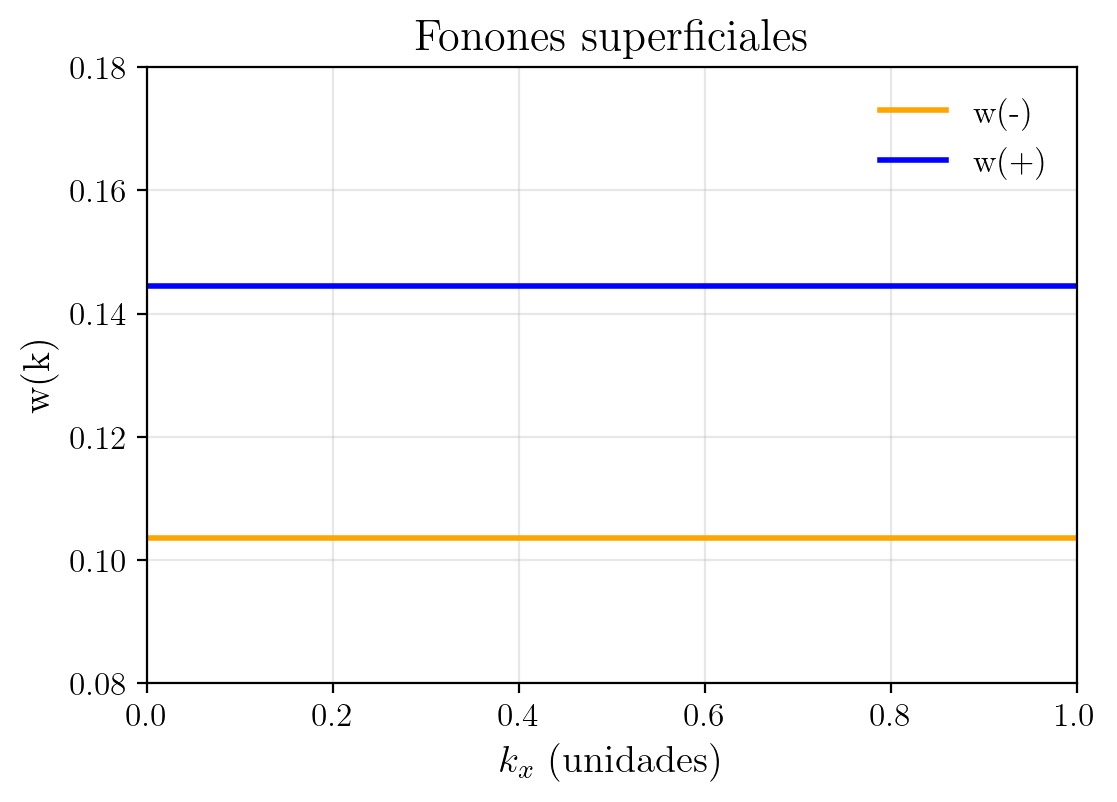

In [10]:
plt.rcParams.update({ # --- Parámetros (copiado de internet para cambiar lo de Latex) ---
    "text.usetex": True,  #Para tipografía de Latex
    "font.family": "serif",
    "font.size": 12,
    "axes.labelsize": 14,
    "axes.titlesize": 16,
    "legend.fontsize": 12,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
    "lines.linewidth": 2,
    "lines.markersize": 6,
    "axes.grid": True,
    "grid.alpha": 0.3
})

# --- Creación de los datos: manipular esto para cada ejemplo, el resto no tocar ---
fig, ax = plt.subplots(figsize=(6, 4))
ax.set_title("Fonones superficiales") #Título de la gráfica
x = np.linspace(0,0.000000002,500)

y2 = np.sqrt(
    (
        eps_inf_si * (w_l0_si**2 + w_t0_al**2)
        + eps_inf_al * (w_l0_al**2 + w_t0_si**2)
        + np.sqrt(
            -4 * (eps_inf_al + eps_inf_si)
            * (eps_inf_si * w_l0_si**2 * w_t0_al**2 + eps_inf_al * w_l0_al**2 * w_t0_si**2)
            + (
                eps_inf_si * (w_l0_si**2 + w_t0_al**2)
                + eps_inf_al * (w_l0_al**2 + w_t0_si**2)
            )**2
        )
    )
    / (2 * (eps_inf_al + eps_inf_si))
)
y1 = np.sqrt(
    (
        eps_inf_si * (w_l0_si**2 + w_t0_al**2)
        + eps_inf_al * (w_l0_al**2 + w_t0_si**2)
        - np.sqrt(
            -4 * (eps_inf_al + eps_inf_si)
            * (eps_inf_si * w_l0_si**2 * w_t0_al**2 + eps_inf_al * w_l0_al**2 * w_t0_si**2)
            + (
                eps_inf_si * (w_l0_si**2 + w_t0_al**2)
                + eps_inf_al * (w_l0_al**2 + w_t0_si**2)
            )**2
        )
    )
    / (2 * (eps_inf_al + eps_inf_si))
)




plt.axhline(y1,color='orange', label='w(-)')
plt.axhline(y2,color='blue', label='w(+)')




# --- Etiquetas, título y leyenda ---

ax.set_xlabel(r"$k_x$ (unidades)")
ax.set_ylabel("w(k)")
ax.legend(loc="best", frameon=False)

# --- Límites y anotaciones ---
ax.set_ylim(0.08,0.18)

plt.show()


## 3. Lámina de material polar de espesor d
Relación de dispersión

$$w^2=\frac{\varepsilon_{\infty}w_l^2cosh(k_xh)+\varepsilon_1w_t^2senh(k_xh)}{\varepsilon_{\infty}cosh(k_xh)+\varepsilon_1senh(k_xh)}$$

Cuando d tiende a infinito vamos a tener que:

$$w^2=\frac{\varepsilon_{\infty}w_l^2+\varepsilon_1w_t^2}{\varepsilon_{\infty}+\varepsilon_1} \equiv \omega_{\infty_{1-2}}$$

Y si d tiende a 0 los Cosh son los que sobreviven ya que el Senh tiende a 0, luego

$$w^2=wl^2$$

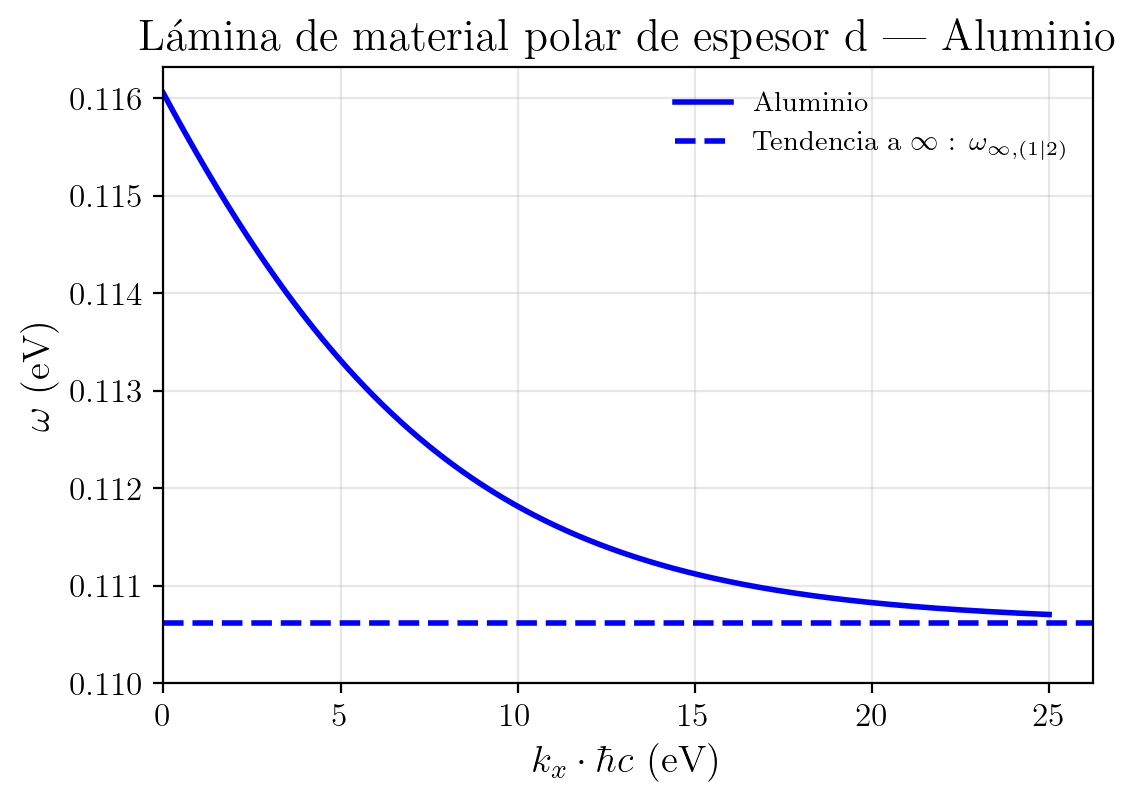

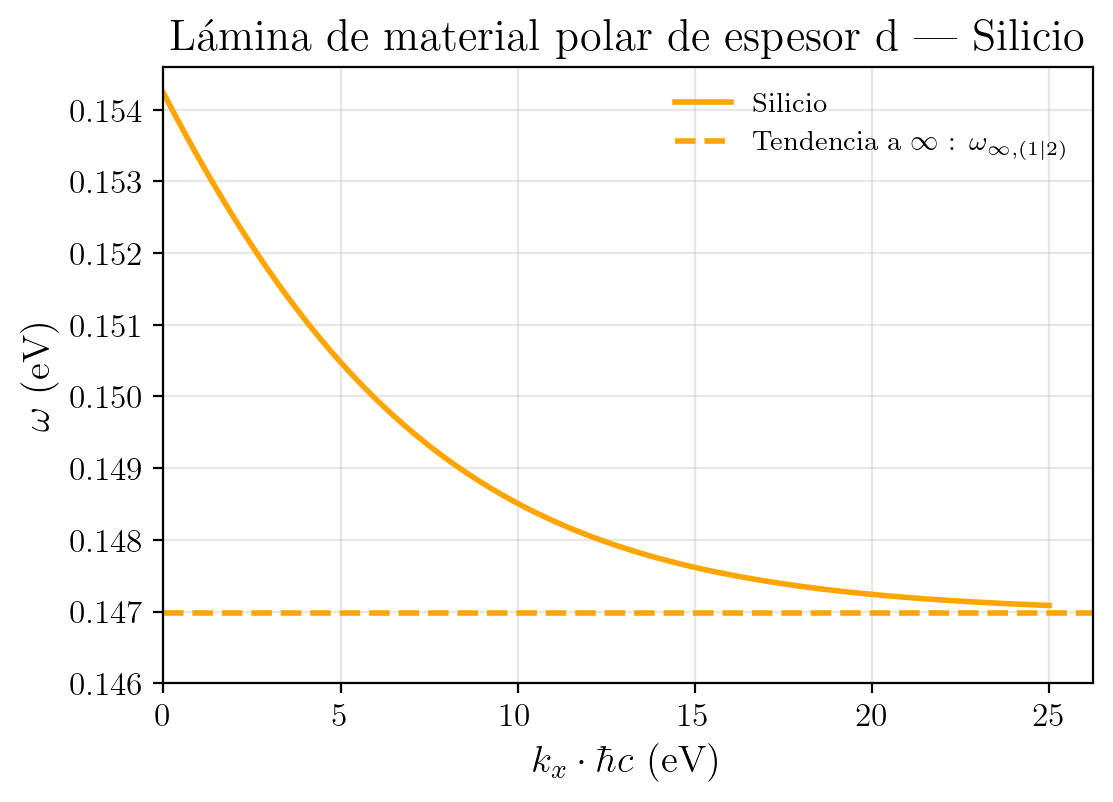

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# --- Render ---
plt.rcParams.update({
    "text.usetex": True, "font.family": "serif", "font.size": 12,
    "axes.labelsize": 14, "axes.titlesize": 16, "legend.fontsize": 12,
    "xtick.labelsize": 12, "ytick.labelsize": 12,
    "lines.linewidth": 2, "lines.markersize": 6,
    "axes.grid": True, "grid.alpha": 0.3
})

# =========================
# Definiciones arriba
# =========================
HBARC_EV_NM = 197.3269804  # ℏc [eV·nm]
eps1 = 1.0                 # aire

# Espesor (elige el tuyo en nm)
h_nm = 18.0
h = h_nm / HBARC_EV_NM     # -> eV^{-1}

# =========================
# Aluminio
# =========================
x_max_al = 25
x = np.linspace(0.0, x_max_al, 500)

num_al = (eps_inf_al * w_l0_al**2) * np.cosh(x * h) + (eps1 * w_t0_al**2) * np.sinh(x * h)
den_al = (eps_inf_al) * np.cosh(x * h) + (eps1) * np.sinh(x * h)
y_al   = np.sqrt(num_al / den_al)

w_inf_al = np.sqrt((eps_inf_al * w_l0_al**2 + eps1 * w_t0_al**2) / (eps_inf_al + eps1))

fig, ax = plt.subplots(figsize=(6, 4))
ax.set_title("Lámina de material polar de espesor d — Aluminio")
ax.plot(x, y_al, color='blue', label='Aluminio')
ax.axhline(w_inf_al, color='blue', linestyle='--', linewidth=2,
           label=r'Tendencia a $\infty$ : $\omega_{\infty,(1|2)}$')
ax.set_xlabel(r"$k_x \cdot \hbar c$ (eV)")
ax.set_ylabel(r"$\omega$ (eV)")
ax.legend(loc="upper right", frameon=False, fontsize='small')
ax.set_xlim(0,)
ax.set_ylim(0.11, )

plt.show()

# =========================
# Silicio
# =========================
x_max_si = 25
x = np.linspace(0.0, x_max_si, 500)

num_si = (eps_inf_si * w_l0_si**2) * np.cosh(x * h) + (eps1 * w_t0_si**2) * np.sinh(x * h)
den_si = (eps_inf_si) * np.cosh(x * h) + (eps1) * np.sinh(x * h)
y_si   = np.sqrt(num_si / den_si)

w_inf_si = np.sqrt((eps_inf_si * w_l0_si**2 + eps1 * w_t0_si**2) / (eps_inf_si + eps1))

fig, ax = plt.subplots(figsize=(6, 4))
ax.set_title("Lámina de material polar de espesor d — Silicio")
ax.plot(x, y_si, color='orange', label='Silicio')
ax.axhline(w_inf_si, color='orange', linestyle='--', linewidth=2,
           label=r'Tendencia a $\infty$ : $\omega_{\infty,(1|2)}$')
ax.set_xlabel(r"$k_x \cdot \hbar c$ (eV)")
ax.set_ylabel(r"$\omega$ (eV)")
ax.legend(loc="upper right", frameon=False, fontsize='small')
ax.set_xlim(0,)
ax.set_ylim(0.146,)

plt.show()


## 4. Hibridación de polaritones fonónicos superficiales I
**Lámina polar (2) de espesor \(d\) sobre sustrato polar (3), con $ \varepsilon_1$.**  
Definimos $u\equiv \omega^2$ (es bicúbica)

### Ecuación general en $u=\omega^2$
$$
\tanh(d\,k_x)\Big[
\varepsilon_{1}\varepsilon_{\infty 3}\,(\omega_{L3}^2-u)\,(\omega_{T2}^2-u)^2
+\varepsilon_{\infty 2}^{\,2}\,(\omega_{L2}^2-u)^2\,(\omega_{T3}^2-u)
\Big]
+\varepsilon_{\infty 2}\varepsilon_{\infty 3}\,(\omega_{L2}^2-u)\,(\omega_{L3}^2-u)\,(\omega_{T2}^2-u)
+\varepsilon_{1}\varepsilon_{\infty 2}\,(\omega_{L2}^2-u)\,(\omega_{T3}^2-u)\,(\omega_{T2}^2-u)=0.
$$

Para resolverlo debemos de hacer uso un método numérico, siendo las ecuaciones (si Al arriba o Al abajo):

$$
0.0000206569 Cosh[d kx] + u^3 (-7.75 Cosh[d kx] - 8.35 Sinh[d kx]) + 
  u (-0.0047448 Cosh[d kx] - 0.00508909 Sinh[d kx]) + 
  u^2 (0.342797 Cosh[d kx] + 0.363105 Sinh[d kx]) + 
  0.0000234777 Sinh[d kx] = 0
$$

$$0.0000364004 Cosh[d kx] + u^3 (-7.35 Cosh[d kx] - 6.91 Sinh[d kx]) + 
  u (-0.00664436 Cosh[d kx] - 0.00628702 Sinh[d kx]) + 
  u^2 (0.389832 Cosh[d kx] + 0.36895 Sinh[d kx]) + 
  0.0000326084 Sinh[d kx] == 0
  $$

Las soluciones las vamos a representar junto a sus límites asintóticos:

---

### 1) Límite $k_x\to 0$
Como $\tanh(d\,k_x)\to 0$, queda
$$
\varepsilon_{\infty 2}\,(\omega_{L2}^2-u)(\omega_{T2}^2-u)\,
\Big[\varepsilon_{\infty 3}(\omega_{L3}^2-u)+\varepsilon_{1}(\omega_{T3}^2-u)\Big]=0.
$$

De aquí:
$$
u_{10}=\omega_{L2}^2,\qquad
u_{20}=\omega_{T2}^2,
$$
y la raíz de interfaz $(3|1)$:
$$
\omega^2=\frac{\varepsilon_{\infty 3}\,\omega_{L3}^2+\varepsilon_{1}\,\omega_{T3}^2}
{\varepsilon_{\infty 3}+\varepsilon_{1}} \equiv \omega_{\infty_{1-3}}
$$

---

### 2) Límite asintótico $k_x\to\infty$
Como $\tanh(d\,k_x)\to 1$, resulta una cúbica en $u$. Una solución analítica toma la forma del modo superficial del medio 2 con el externo $\varepsilon_1$:
$$
u_{1inf}=\omega^2=\frac{\varepsilon_{\infty 2}\,\omega_{L2}^2+\varepsilon_{1}\,\omega_{T2}^2}
{\varepsilon_{\infty 2}+\varepsilon_{1}}  \equiv \omega_{\infty_{1-2}}
$$

Las otras dos raíces coinciden con las frecuencias de fonones superficiales de los medios polares semiinfinitos, cuya relación de dispersión es:
$$
u_{2inf} = \frac{ \varepsilon_{\infty 2} (\omega_{L2}^2 + \omega_{T1}^2) + \varepsilon_{\infty 1} (\omega_{L1}^2 + \omega_{T2}^2) - \sqrt{ -4 (\varepsilon_{\infty 1} + \varepsilon_{\infty 2}) (\varepsilon_{\infty 2} \omega_{L2}^2 \omega_{T1}^2 + \varepsilon_{\infty 1} \omega_{L1}^2 \omega_{T2}^2) + (\varepsilon_{\infty 2} (\omega_{L2}^2 + \omega_{T1}^2) + \varepsilon_{\infty 1} (\omega_{L1}^2 + \omega_{T2}^2))^2 } \big)}{2(\varepsilon_{\infty 1} + \varepsilon_{\infty 2}) }
$$
$$
u_{3inf} = \frac{ \varepsilon_{\infty 2} (\omega_{L2}^2 + \omega_{T1}^2) + \varepsilon_{\infty 1} (\omega_{L1}^2 + \omega_{T2}^2) + \sqrt{ -4 (\varepsilon_{\infty 1} + \varepsilon_{\infty 2}) (\varepsilon_{\infty 2} \omega_{L2}^2 \omega_{T1}^2 + \varepsilon_{\infty 1} \omega_{L1}^2 \omega_{T2}^2) + (\varepsilon_{\infty 2} (\omega_{L2}^2 + \omega_{T1}^2) + \varepsilon_{\infty 1} (\omega_{L1}^2 + \omega_{T2}^2))^2 } \big)}{2(\varepsilon_{\infty 1} + \varepsilon_{\infty 2}) }
$$


H = 20.0 nm,  X_max = ħc·k_x = 9.86634902 eV,  puntos = 600
kx_max (nm⁻¹) = 0.05,   t_max = H·kx_max = 1
[self-test] Iniciando…
[self-test] OK


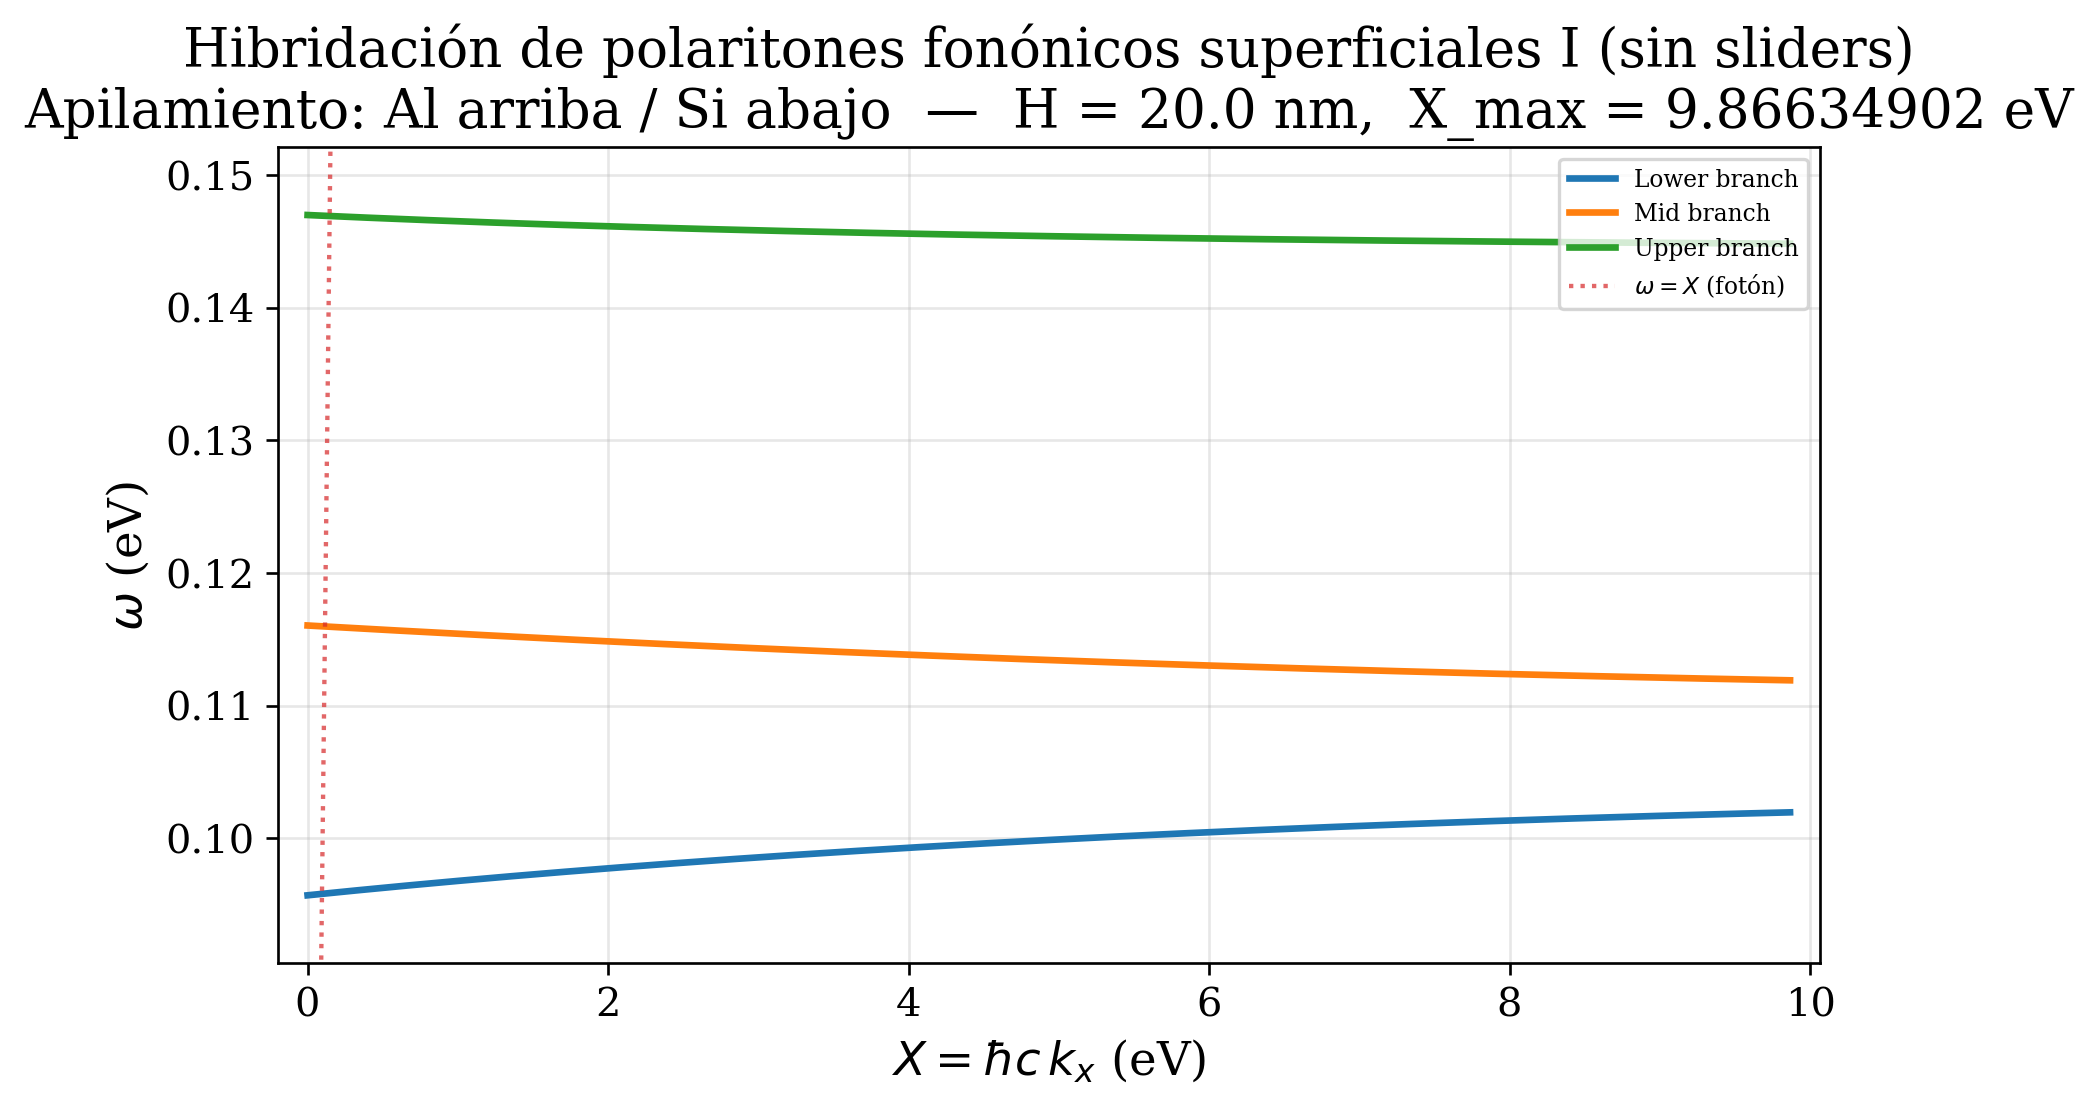

In [12]:
# -*- coding: utf-8 -*-
# Dispersión ω(kx) SIN sliders — ejes consistentes
# H en nm, kx en nm^{-1}. Se representa X = ħc·kx (en eV) en el eje X.
# Dentro de las ecuaciones se toma c ≡ 1 (la dependencia en c se recoge en X).

import numpy as np
import matplotlib.pyplot as plt
from typing import List, Tuple
from collections import OrderedDict

# =============================
# Parámetros de entrada (EDITA)
# =============================
H_NM = 20.0                # espesor H en nanómetros
NUM_PTS = 600             # densidad de muestreo del eje X

# Escala del eje X: elige UNA forma de fijar el rango horizontal
T_MAX = 1.0               # RECOMENDADO: t_max = H_nm * kx_phys_max (adimensional).
                          # Pon 3.0 para régimen asintótico (~0.995), o ajusta según quieras.
KX_HBARC_MAX_EV = None    # Alternativa: fija directamente X_max = (ħc) kx_max en eV. Si None, se usa T_MAX.

# =============================
# Constantes y tolerancias
# =============================
HBARC_EV_NM = 197.3269804  # ħc en eV·nm (CODATA 2018+)
REAL_TOL = 1e-8            # tolerancia parte imaginaria
_DEF_EPS = 1e-12

plt.rcParams.update({
    "text.usetex": False,     # mathtext interno
    "axes.unicode_minus": False,
})

# Resolver X_max según la opción elegida
if KX_HBARC_MAX_EV is None:
    KX_HBARC_MAX_EV = float(T_MAX) * HBARC_EV_NM / float(H_NM)

print(f"H = {H_NM} nm,  X_max = ħc·k_x = {KX_HBARC_MAX_EV} eV,  puntos = {NUM_PTS}")
print(f"kx_max (nm⁻¹) = {KX_HBARC_MAX_EV/HBARC_EV_NM:.6g},   t_max = H·kx_max = {H_NM * (KX_HBARC_MAX_EV/HBARC_EV_NM):.6g}")

# -------------------------------------------------------------------------------------
# Sistemas (apilamientos) y coeficientes de la cúbica: a3 u^3 + a2 u^2 + a1 u + a0 = 0
# con a_i(t) = a_i^C + a_i^S · tanh(t), t = H_nm · kx_phys (adimensional)
# -------------------------------------------------------------------------------------
CONFIGS = {
    "Al|Si": {"a3_C": -7.75, "a3_S": -8.35, "a2_C": 0.342797, "a2_S": 0.363105,
               "a1_C": -0.0047448, "a1_S": -0.00508909, "a0_C": 2.06569e-05, "a0_S": 2.34777e-05},
    "Si|Al": {"a3_C": -7.35, "a3_S": -6.91,  "a2_C": 0.389832, "a2_S": 0.36895,
               "a1_C": -0.00664436, "a1_S": -0.00628702, "a0_C": 3.64004e-05, "a0_S": 3.26084e-05},
}
CONFIG_LABELS = {"Al|Si": "Al arriba / Si abajo", "Si|Al": "Si arriba / Al abajo"}

# -------------------------------------------------------------------------------------
# Helpers físicos para etiquetas de leyenda (usa variables globales si existen)
# Espera: e1, eps_inf_al/si, w_l0_al/si, w_t0_al/si
# -------------------------------------------------------------------------------------

def _materials_for_apilamiento(apilamiento: str):
    try:
        mats = {
            "Al": {"einf": float(eps_inf_al), "wL": float(w_l0_al), "wT": float(w_t0_al)},
            "Si": {"einf": float(eps_inf_si), "wL": float(w_l0_si), "wT": float(w_t0_si)},
        }
        e1_loc = float(e1)
        if apilamiento == "Al|Si":
            top, bottom = mats["Al"], mats["Si"]
        else:
            top, bottom = mats["Si"], mats["Al"]
        return {"top": top, "bottom": bottom, "e1": e1_loc}
    except Exception:
        return None

def _u1inf_w(mat, e1_val):
    u1 = (mat["einf"]*mat["wL"]**2 + e1_val*mat["wT"]**2) / (mat["einf"] + e1_val)
    return float(np.sqrt(max(u1, 0.0)))

def _u23inf_w_pair(top, bottom):
    a = bottom["einf"]*(bottom["wL"]**2 + top["wT"]**2) + top["einf"]*(top["wL"]**2 + bottom["wT"]**2)
    b = -4.0*(top["einf"] + bottom["einf"])*(bottom["einf"]*bottom["wL"]**2*top["wT"]**2 + top["einf"]*top["wL"]**2*bottom["wT"]**2)
    disc = max(a*a + b, 0.0)
    denom = 2.0*(top["einf"] + bottom["einf"])
    u2 = (a - np.sqrt(disc)) / denom
    u3 = (a + np.sqrt(disc)) / denom
    return float(np.sqrt(max(u2, 0.0))), float(np.sqrt(max(u3, 0.0)))

def _match_labels(values: np.ndarray, candidates: OrderedDict, rel_tol: float = 2e-2):
    out = []
    for v in values:
        if not np.isfinite(v):
            continue
        best_key, best_rel = None, float("inf")
        for name, cv in candidates.items():
            rel = abs(v - cv) / max(cv, 1e-12)
            if rel < best_rel:
                best_key, best_rel = name, rel
        approx = r"\sim " if best_rel > rel_tol else ""
        out.append((float(v), rf"${approx}{best_key} = {v:.6g}\,\mathrm{{eV}}$"))
    return out

def _legend_candidates_zero(apilamiento: str):
    mats = _materials_for_apilamiento(apilamiento)
    if mats is None:
        return None
    top, bottom, e1_val = mats["top"], mats["bottom"], mats["e1"]
    cand = OrderedDict()
    cand[r"\omega_T^{\mathrm{top}}"]    = top["wT"]
    cand[r"\omega_L^{\mathrm{top}}"]    = top["wL"]
    cand[r"\omega_T^{\mathrm{bottom}}"] = bottom["wT"]
    # petición previa: etiquetar L del bottom como ω_{∞_{1-3}}
    cand[r"\omega_{\infty_{1-3}}"]       = _u1inf_w(bottom, e1_val)
    # y añadimos también ω_{∞(1-2)} por claridad
    cand[r"\omega_{\infty(1\!-\!2)}"]   = _u1inf_w(top, e1_val)
    return cand

def _legend_candidates_inf(apilamiento: str):
    mats = _materials_for_apilamiento(apilamiento)
    if mats is None:
        return None
    top, bottom, e1_val = mats["top"], mats["bottom"], mats["e1"]
    w1 = _u1inf_w(top, e1_val)
    w2, w3 = _u23inf_w_pair(top, bottom)
    return OrderedDict([
        (r"u_{1\infty}\equiv \omega_{\infty(1\!-\!2)}", w1),
        (r"u_{2\infty}\, (\mathrm{SPhP}\,-)", w2),
        (r"u_{3\infty}\, (\mathrm{SPhP}\,+)", w3),
    ])

# -------------------------------------------------------------------------------------
# Utilidades numéricas
# -------------------------------------------------------------------------------------

def _real_nonneg_roots(z: np.ndarray, tol: float = REAL_TOL) -> np.ndarray:
    z = np.asarray(z)
    mask = np.abs(np.imag(z)) < tol
    ur = np.real(z[mask])
    return ur[ur >= -_DEF_EPS]


def _track_branches(y_sets: List[np.ndarray], max_branches: int = 3) -> List[np.ndarray]:
    num_pts = len(y_sets)
    branches = [np.full(num_pts, np.nan) for _ in range(max_branches)]
    y0 = y_sets[0]
    for i in range(min(max_branches, y0.size)):
        branches[i][0] = y0[i]
    for j in range(1, num_pts):
        avail = list(y_sets[j])
        for b in range(max_branches):
            prev = branches[b][j-1]
            if np.isfinite(prev) and avail:
                idx = int(np.argmin([abs(v - prev) for v in avail]))
                branches[b][j] = avail.pop(idx)
        for b in range(max_branches):
            if not avail:
                break
            if not np.isfinite(branches[b][j]):
                branches[b][j] = avail.pop(0)
    return branches

# -------------------------------------------------------------------------------------
# Núcleo de cálculo (en nm & nm^{-1})
# -------------------------------------------------------------------------------------

def _coeffs_from_t(t: np.ndarray | float, apilamiento: str):
    cfg = CONFIGS[apilamiento]
    a3 = cfg["a3_C"] + cfg["a3_S"] * t
    a2 = cfg["a2_C"] + cfg["a2_S"] * t
    a1 = cfg["a1_C"] + cfg["a1_S"] * t
    a0 = cfg["a0_C"] + cfg["a0_S"] * t
    return a3, a2, a1, a0


def _omega_sets_over_kx_nm(h_nm: float, kx_phys_nminv: np.ndarray, apilamiento: str):
    t = np.tanh(h_nm * kx_phys_nminv)
    a3, a2, a1, a0 = _coeffs_from_t(t, apilamiento)
    coeffs = np.vstack([a3, a2, a1, a0]).T
    omega_sets: List[np.ndarray] = []
    for c in coeffs:
        ur = _real_nonneg_roots(np.roots(c))
        if ur.size:
            w = np.sqrt(np.clip(ur, 0.0, None))
            w.sort()
        else:
            w = np.array([])
        omega_sets.append(w)
    return omega_sets


def _limit_omegas_any(h_or_d: float, apilamiento: str):
    # límites t=0 y t=1 — independientes de unidades de kx/d (solo depende de t)
    a3, a2, a1, a0 = _coeffs_from_t(0.0, apilamiento)
    u0 = np.roots([a3, a2, a1, a0]); w0 = np.sqrt(np.clip(np.sort(_real_nonneg_roots(u0)), 0.0, None))
    a3i, a2i, a1i, a0i = _coeffs_from_t(1.0, apilamiento)
    ui = np.roots([a3i, a2i, a1i, a0i]); winf = np.sqrt(np.clip(np.sort(_real_nonneg_roots(ui)), 0.0, None))
    return w0, winf

# -------------------------------------------------------------------------------------
# Colores para asintóticas (match por valor de cola de cada rama)
# -------------------------------------------------------------------------------------

def _asymptote_color_map(winf: np.ndarray, branches: List[np.ndarray], lines: list) -> list:
    colors = [None] * len(winf)
    if len(winf) == 0:
        return colors
    tails, cols = [], []
    for br, ln in zip(branches, lines):
        if ln is None or br is None:
            continue
        idxs = np.where(np.isfinite(br))[0]
        if idxs.size == 0:
            continue
        tails.append(float(br[idxs[-1]]))
        cols.append(ln.get_color())
    assigned = set()
    for tail, col in zip(tails, cols):
        if not np.isfinite(tail):
            continue
        dists = [abs(float(w) - tail) for w in winf]
        for idx in np.argsort(dists):
            if idx not in assigned:
                colors[idx] = col
                assigned.add(idx)
                break
    return colors

# -------------------------------------------------------------------------------------
# Plot principal (sin sliders): X = ħc·kx (eV)
# -------------------------------------------------------------------------------------

def plot_dispersion_no_widgets(H_nm=H_NM, Xmax_eV=KX_HBARC_MAX_EV, apilamiento="Al|Si", asintoticas=True, show_photon=True):
    # Eje X (eV) y kx físico (nm^{-1})
    if Xmax_eV is None:
        Xmax_eV = float(T_MAX) * HBARC_EV_NM / float(H_nm)
    kx_max_nminv = float(Xmax_eV) / HBARC_EV_NM
    kx_phys = np.linspace(0.0, kx_max_nminv, int(NUM_PTS))
    X_eV = HBARC_EV_NM * kx_phys

    # Soluciones ω(kx_phys)
    omega_sets = _omega_sets_over_kx_nm(float(H_nm), kx_phys, apilamiento)
    branches = _track_branches(omega_sets, max_branches=3)

    # ---- Trazado ----
    plt.figure(figsize=(7.6, 4.8), dpi=120)
    labels = ["Lower branch", "Mid branch", "Upper branch"]
    any_data = False
    line_objs = []
    for i, br in enumerate(branches):
        if np.isfinite(br).any():
            any_data = True
            ln, = plt.plot(X_eV, br, lw=2, label=labels[i])
            line_objs.append(ln)
        else:
            line_objs.append(None)

    # Línea del fotón (c ≡ 1 dentro de ecuaciones, aquí ω = X)
    if show_photon:
        plt.plot(X_eV, X_eV, ls=':', lw=1.3, alpha=0.7, label=r"$\omega = X$ (fotón)")

    if asintoticas:
        w0, winf = _limit_omegas_any(H_nm, apilamiento)
        asym_colors = _asymptote_color_map(winf, branches, line_objs)
        cand_inf = _legend_candidates_inf(apilamiento)
        if cand_inf is not None and winf.size:
            pairs_inf = _match_labels(winf, cand_inf, rel_tol=2e-2)
            for idx, (y, lbl) in enumerate(pairs_inf):
                plt.axhline(y=float(y), ls='--', lw=1.6, alpha=0.75,
                            color=(asym_colors[idx] if asym_colors[idx] is not None else None),
                            label=lbl)
        cand_zero = _legend_candidates_zero(apilamiento)
        x0 = X_eV[0]
        if cand_zero is not None and w0.size:
            pairs_zero = _match_labels(w0, cand_zero, rel_tol=2e-2)
            for y, lbl in pairs_zero:
                plt.plot([x0], [float(y)], marker='o', ms=6, mfc='white', mec='k', label=lbl)

    titulo = (
        "Hibridación de polaritones fonónicos superficiales I (sin sliders)" + "\n" +
        f"Apilamiento: {CONFIG_LABELS[apilamiento]}  —  H = {H_nm} nm,  X_max = {Xmax_eV} eV"
    )
    plt.title(titulo)
    plt.xlabel(r"$X = \hbar c\, k_x$ (eV)")
    plt.ylabel(r"$\omega$ (eV)")
    plt.grid(True, alpha=0.3)

    if any_data:
        ydata = np.hstack([br[np.isfinite(br)] for br in branches if np.isfinite(br).any()])
        y0, yi = _limit_omegas_any(H_nm, apilamiento)
        yextra = np.hstack([y0, yi]) if (y0.size + yi.size) else np.array([])
        if yextra.size:
            ydata = np.hstack([ydata, yextra])
        ymin, ymax = float(np.nanmin(ydata)), float(np.nanmax(ydata))
        ypad = 0.10 * (ymax - ymin if ymax > ymin else 1.0)
        xpad = 0.02 * (X_eV[-1] - X_eV[0])
        plt.xlim(X_eV[0] - xpad, X_eV[-1] + xpad)
        plt.ylim(ymin - ypad, ymax + ypad)

    plt.legend(loc="upper right", frameon=True, ncol=1,fontsize=7)
    plt.tight_layout()
    plt.show()

# -------------------------------------------------------------------------------------
# Tests automáticos (smoke)
# -------------------------------------------------------------------------------------

def _self_tests():
    print("[self-test] Iniciando…")
    # 1) Constantes definidas
    assert isinstance(HBARC_EV_NM, float) and HBARC_EV_NM > 100, "HBARC_EV_NM mal definido"
    # 2) Coherencia de X y kx: X = ħc·kx
    kx_max = KX_HBARC_MAX_EV / HBARC_EV_NM
    assert abs(H_NM * kx_max - T_MAX) < 1e-12 or KX_HBARC_MAX_EV is not None, "Conversión X↔kx inconsistente"
    # 3) Límites finitos
    for ap in CONFIGS.keys():
        w0, winf = _limit_omegas_any(H_NM, ap)
        assert np.all(np.isfinite(w0)) and np.all(np.isfinite(winf)), "Límites no finitos"
    print("[self-test] OK")

try:
    _self_tests()
except Exception as _e:
    print("[self-test] FALLO:", _e)

# Ejecución directa con los parámetros actuales
plot_dispersion_no_widgets(H_nm=H_NM, Xmax_eV=KX_HBARC_MAX_EV, apilamiento="Al|Si", asintoticas=True, show_photon=True)


## 4. Hibridación de polaritones fonónicos superficiales II
### Ecuación general (sin simplificar)

$$
-\mathrm{e}^{2(d+h)k_x}\big(\mathrm{einf2}\,(u-\mathrm{wl2}^2)+e1\,(u-\mathrm{wt2}^2)\big)\big(\mathrm{einf3}\,(u-\mathrm{wl3}^2)(u-\mathrm{wt2}^2)+\mathrm{einf2}\,(u-\mathrm{wl2}^2)(u-\mathrm{wt3}^2)\big)\\
\qquad+\;\mathrm{e}^{2 d k_x}\big(\mathrm{einf2}\,(-u+\mathrm{wl2}^2)+e1\,(u-\mathrm{wt2}^2)\big)\big(\mathrm{einf3}\,(u-\mathrm{wl3}^2)(u-\mathrm{wt2}^2)+\mathrm{einf2}\,(u-\mathrm{wl2}^2)(u-\mathrm{wt3}^2)\big)\\
\qquad+\;\mathrm{e}^{4 d k_x}\big(\mathrm{einf2}\,(u-\mathrm{wl2}^2)+e1\,(u-\mathrm{wt2}^2)\big)\big(\mathrm{einf3}\,(u-\mathrm{wl3}^2)(-u+\mathrm{wt2}^2)+\mathrm{einf2}\,(u-\mathrm{wl2}^2)(u-\mathrm{wt3}^2)\big)\\
\qquad-\;\mathrm{e}^{2 h k_x}\big(\mathrm{einf2}\,(-u+\mathrm{wl2}^2)+e1\,(u-\mathrm{wt2}^2)\big)\big(\mathrm{einf3}\,(u-\mathrm{wl3}^2)(-u+\mathrm{wt2}^2)+\mathrm{einf2}\,(u-\mathrm{wl2}^2)(u-\mathrm{wt3}^2)\big)
\;=\;0.
$$

---

## Límite $k_x\to 0$

Como $\mathrm{e}^{0}=1$, la ecuación una vez la simplificamos queda (sacado de Mathematica directo):

$$
\mathrm{einf2}\,\mathrm{einf3}\,(u-\mathrm{wl2}^2)(u-\mathrm{wl3}^2)(u-\mathrm{wt2}^2)=0.
$$

Soluciones:

$$
\{\,u=\mathrm{wl2}^2,\; u=\mathrm{wl3}^2,\; u=\mathrm{wt2}^2\,\}.
$$

---

## Límite $k_x\to\infty$

### Caso $ d > h$, luego $4 d > 2 d, 2 h$ y $4 d > 2 d + 2 h$ luego domina el término de $4 d $

Domina el término con $\mathrm{e}^{4 d k_x}$. Queda:

$$
\big(\mathrm{einf2}(u-\mathrm{wl2}^2)+e1(u-\mathrm{wt2}^2)\big)\,\Big(\mathrm{einf3}(u-\mathrm{wl3}^2)(-u+\mathrm{wt2}^2)+\mathrm{einf2}(u-\mathrm{wl2}^2)(u-\mathrm{wt3}^2)\Big)=0.
$$

Así, las asíntotas (en $u$) son:

$$
\boxed{\;u=\dfrac{\mathrm{einf2}\,\mathrm{wl2}^2+e1\,\mathrm{wt2}^2}{e1+\mathrm{einf2}}\;}
$$

y las dos raíces de la cuadrática:

$$
\boxed{\;u=\frac{\mathrm{einf2}\,\mathrm{wl2}^2-\mathrm{einf3}\,\mathrm{wl3}^2-\mathrm{einf3}\,\mathrm{wt2}^2+\mathrm{einf2}\,\mathrm{wt3}^2\;\pm\;\sqrt{\big(-\mathrm{einf2}\,\mathrm{wl2}^2+\mathrm{einf3}\,\mathrm{wl3}^2+\mathrm{einf3}\,\mathrm{wt2}^2-\mathrm{einf2}\,\mathrm{wt3}^2\big)^2-4(\mathrm{einf2}-\mathrm{einf3})\big(-\mathrm{einf3}\,\mathrm{wl3}^2\mathrm{wt2}^2+\mathrm{einf2}\,\mathrm{wl2}^2\mathrm{wt3}^2\big)}}{2(\mathrm{einf2}-\mathrm{einf3})}\;}
$$

(para $\mathrm{einf2}\neq\mathrm{einf3}$).

---

### Caso $h>d$ luego $2 h > 2 d$ y $2 h + 2 d > 4 d$, luego domina el de $2 (d + h)$

Domina el término con $\mathrm{e}^{2(d+h)k_x}$. Queda:

$$
\big(\mathrm{einf2}(u-\mathrm{wl2}^2)+e1(u-\mathrm{wt2}^2)\big)\,\Big(\mathrm{einf3}(u-\mathrm{wl3}^2)(u-\mathrm{wt2}^2)+\mathrm{einf2}(u-\mathrm{wl2}^2)(u-\mathrm{wt3}^2)\Big)=0.
$$

Así, las asíntotas (en $u$) son:

$$
\boxed{\;u=\dfrac{\mathrm{einf2}\,\mathrm{wl2}^2+e1\,\mathrm{wt2}^2}{e1+\mathrm{einf2}}\;}
$$

y las dos raíces de la cuadrática:

$$
\boxed{\;u=\frac{\mathrm{einf2}\,\mathrm{wl2}^2+\mathrm{einf3}\,\mathrm{wl3}^2+\mathrm{einf3}\,\mathrm{wt2}^2+\mathrm{einf2}\,\mathrm{wt3}^2\;\pm\;\sqrt{\big(-\mathrm{einf2}\,\mathrm{wl2}^2-\mathrm{einf3}\,\mathrm{wl3}^2-\mathrm{einf3}\,\mathrm{wt2}^2-\mathrm{einf2}\,\mathrm{wt3}^2\big)^2-4(\mathrm{einf2}+\mathrm{einf3})\big(\mathrm{einf3}\,\mathrm{wl3}^2\mathrm{wt2}^2+\mathrm{einf2}\,\mathrm{wl2}^2\mathrm{wt3}^2\big)}}{2(\mathrm{einf2}+\mathrm{einf3})}\;}
$$

(para $\mathrm{einf2}+\mathrm{einf3}\neq0$).

---

### Caso $d=h$, luego el término de $4 d$ y $2 (d + h)$ son de mayor orden que los otros 2, dominan ellos

Los dos términos líderes ($\mathrm{e}^{4dk_x}$ y $\mathrm{e}^{2(d+h)k_x}$) son del mismo orden y se cancelan entre sí dejando:

$$
\big(\mathrm{einf2}(u-\mathrm{wl2}^2)+e1(u-\mathrm{wt2}^2)\big)\,\Big(\mathrm{einf3}(u-\mathrm{wl3}^2)(-u+\mathrm{wt2}^2)+\mathrm{einf2}(u-\mathrm{wl2}^2)(u-\mathrm{wt3}^2)\Big)\\
=\;\big(\mathrm{einf2}(u-\mathrm{wl2}^2)+e1(u-\mathrm{wt2}^2)\big)\,\Big(\mathrm{einf3}(u-\mathrm{wl3}^2)(u-\mathrm{wt2}^2)+\mathrm{einf2}(u-\mathrm{wl2}^2)(u-\mathrm{wt3}^2)\Big).
$$

De donde se obtienen las asíntotas:

$$
\{\,u=\mathrm{wl3}^2,\; u=\mathrm{wt2}^2,\; u=\dfrac{\mathrm{einf2}\,\mathrm{wl2}^2+e1\,\mathrm{wt2}^2}{e1+\mathrm{einf2}}\,\}.
$$


In [13]:
import numpy as np
import matplotlib.pyplot as plt
from typing import List, Tuple
from ipywidgets import interact, FloatSlider, Checkbox, Dropdown

# === Preferencias de render: evitar errores con LaTeX externo/Unicode ===
# Usamos Unicode (ω, √, ∞, super/subíndices) para evitar errores del parser mathtext.
plt.rcParams.update({
    "text.usetex": False,           # usar motor interno, no LaTeX externo
    "axes.unicode_minus": False,    # guiones seguros
})

# === Constantes y tolerancias ===
HC_EV_NM = 1239.84193  # (hc) en eV·nm — convierte longitudes [nm] -> [eV]
REAL_TOL = 1e-8        # tolerancia para parte imaginaria ~ 0
_DEF_EPS = 1e-12       # tolerancia para comparar con 0 (clip numérico)
NUM_PTS = 600          # puntos fijos en la malla kx

# -------------------------------------------------------------------------------------
# Sistema II: lámina d sobre lámina h (ambas polares) sobre sustrato conductor perfecto
#   Polinomio: a0 + a1 u + a2 u^2 + a3 u^3 = 0, con a_i = Σ C_i(exp(γ_i kx))
#   Exponentes usados: γ ∈ {2d, 4d, 2h, 2(d+h)}
# -------------------------------------------------------------------------------------

# Coeficientes para "Al arriba / Si abajo" (Al en d, Si en h) — proporcionados por el usuario
COEFFS_ALu_SIl = {
    '2d'    : [ 2.52535e-05, -5.10889e-03,  3.30825e-01, -6.9    ],
    '4d'    : [-4.92987e-06,  7.02827e-04, -4.16448e-02,  1.4    ],
    '2h'    : [-2.82083e-06,  3.44293e-04, -2.03083e-02,  0.6    ],
    '2(d+h)': [ 4.41346e-05, -9.83389e-03,  7.05901e-01, -16.1   ],
}

# Coeficientes para "Si arriba / Al abajo" (Si en d, Al en h) — proporcionados por el usuario
COEFFS_SIu_ALl = {
    '2d'    : [ 3.39477e-05, -5.92344e-03,  3.11478e-01, -5.06   ],
    '4d'    : [ 7.70832e-06, -8.25846e-04,  4.84989e-02, -1.24   ],
    '2h'    : [ 3.79198e-06, -3.57343e-04,  2.08817e-02, -0.44   ],
    '2(d+h)': [ 6.90087e-05, -1.29314e-02,  7.58782e-01, -14.26  ],
}

LABELS = {
    'Al|Si': 'Al ↑ / Si ↓',
    'Si|Al': 'Si ↑ / Al ↓',
}

# -------------------------------------------------------------------------------------
# Utilidades numéricas
# -------------------------------------------------------------------------------------

def _real_nonneg_roots(z: np.ndarray, tol: float = REAL_TOL) -> np.ndarray:
    """Filtra raíces con |Im|<tol y parte real >= -_DEF_EPS."""
    z = np.asarray(z)
    mask = np.abs(np.imag(z)) < tol
    ur = np.real(z[mask])
    return ur[ur >= -_DEF_EPS]


def _track_branches(y_sets: List[np.ndarray], max_branches: int = 3) -> List[np.ndarray]:
    """Asigna hasta 'max_branches' curvas por continuidad (greedy) a lo largo de kx.
    y_sets[j] contiene las ω reales (ordenadas) en el j‑ésimo kx.
    Devuelve listas de longitud num_pts con NaNs donde falta rama.
    """
    num_pts = len(y_sets)
    branches = [np.full(num_pts, np.nan) for _ in range(max_branches)]

    # Inicializa con las raíces del primer punto (j=0)
    y0 = y_sets[0]
    for i in range(min(max_branches, y0.size)):
        branches[i][0] = y0[i]

    # Recorre kx y enlaza por cercanía al valor previo
    for j in range(1, num_pts):
        avail = list(y_sets[j])  # raíces disponibles en este kx
        # 1) continúa ramas existentes eligiendo la raíz más cercana al valor previo
        for b in range(max_branches):
            prev = branches[b][j-1]
            if np.isfinite(prev) and avail:
                idx = int(np.argmin([abs(v - prev) for v in avail]))
                branches[b][j] = avail.pop(idx)
        # 2) abre nuevas ramas si sobran raíces sin asignar
        for b in range(max_branches):
            if not avail:
                break
            if not np.isfinite(branches[b][j]):
                branches[b][j] = avail.pop(0)
    return branches


# -------------------------------------------------------------------------------------
# Cálculo de coeficientes dependientes de (kx, d, h) y asintóticos
# -------------------------------------------------------------------------------------

def _select_coeff_table(apilamiento: str):
    if apilamiento == 'Al|Si':
        return COEFFS_ALu_SIl
    elif apilamiento == 'Si|Al':
        return COEFFS_SIu_ALl
    else:
        raise ValueError(f"Apilamiento desconocido: {apilamiento}")


def _coeffs_expon_over_kx(kx: np.ndarray, d_eV: float, h_eV: float, apilamiento: str) -> Tuple[np.ndarray, np.ndarray, np.ndarray, np.ndarray]:
    """Devuelve (a3, a2, a1, a0) evaluados para cada kx según la tabla de coeficientes.
    **Con estabilización numérica**: se factoriza la exponencial dominante e^{-γ_max kx}
    común a (a0,a1,a2,a3), que no altera las raíces del cúbico en u.
    """
    tbl = _select_coeff_table(apilamiento)
    # Exponentes
    e2d  = np.exp(2.0 * d_eV * kx)
    e4d  = np.exp(4.0 * d_eV * kx)
    e2h  = np.exp(2.0 * h_eV * kx)
    e2dh = np.exp(2.0 * (d_eV + h_eV) * kx)

    # Estabilización: divide todos por la exponencial máxima en cada kx
    emax = np.maximum.reduce([e2d, e4d, e2h, e2dh])
    r2d, r4d, r2h, r2dh = e2d/emax, e4d/emax, e2h/emax, e2dh/emax  # ≤ 1

    # a0 + a1 u + a2 u^2 + a3 u^3 (todos escalados por 1/emax)
    c2d, c4d, c2h, c2dh = tbl['2d'], tbl['4d'], tbl['2h'], tbl['2(d+h)']
    a0 = c2d[0]*r2d + c4d[0]*r4d + c2h[0]*r2h + c2dh[0]*r2dh
    a1 = c2d[1]*r2d + c4d[1]*r4d + c2h[1]*r2h + c2dh[1]*r2dh
    a2 = c2d[2]*r2d + c4d[2]*r4d + c2h[2]*r2h + c2dh[2]*r2dh
    a3 = c2d[3]*r2d + c4d[3]*r4d + c2h[3]*r2h + c2dh[3]*r2dh
    return a3, a2, a1, a0  # orden para np.roots


def _omega_sets_over_kx(d_eV: float, h_eV: float, kx: np.ndarray, apilamiento: str) -> List[np.ndarray]:
    """Resuelve el cúbico en u para cada kx, filtra u≥0 reales y devuelve ω ordenadas."""
    a3, a2, a1, a0 = _coeffs_expon_over_kx(kx, d_eV, h_eV, apilamiento)
    coeffs = np.vstack([a3, a2, a1, a0]).T  # (num_pts, 4)

    omega_sets: List[np.ndarray] = []
    for c in coeffs:
        u_roots = np.roots(c)
        ur = _real_nonneg_roots(u_roots)
        if ur.size:
            w = np.sqrt(np.clip(ur, 0.0, None))
            w.sort()
        else:
            w = np.array([])
        omega_sets.append(w)
    return omega_sets


def _limit_omegas(d_eV: float, h_eV: float, apilamiento: str) -> Tuple[np.ndarray, np.ndarray]:
    """Calcula ω(kx→0) y ω(kx→∞) usando límites analíticos de las exponenciales."""
    # kx -> 0: todas las exponenciales → 1 ⇒ evalúa a_i con e^0=1
    a3_0, a2_0, a1_0, a0_0 = _coeffs_expon_over_kx(np.array([0.0]), d_eV, h_eV, apilamiento)
    u0 = np.roots([a3_0[0], a2_0[0], a1_0[0], a0_0[0]])
    u0r = _real_nonneg_roots(u0)
    w0 = np.sqrt(np.clip(np.sort(u0r), 0.0, None))

    # kx -> ∞: domina el término con γ máximo (si hay empate, se suman contribuciones)
    tbl = _select_coeff_table(apilamiento)
    g2d, g4d, g2h, g2dh = 2.0*d_eV, 4.0*d_eV, 2.0*h_eV, 2.0*(d_eV + h_eV)
    gmax = max(g2d, g4d, g2h, g2dh)
    a0_inf = (tbl['2d'][0]    if np.isclose(g2d,  gmax) else 0.0) \
           + (tbl['4d'][0]    if np.isclose(g4d,  gmax) else 0.0) \
           + (tbl['2h'][0]    if np.isclose(g2h,  gmax) else 0.0) \
           + (tbl['2(d+h)'][0]if np.isclose(g2dh, gmax) else 0.0)
    a1_inf = (tbl['2d'][1]    if np.isclose(g2d,  gmax) else 0.0) \
           + (tbl['4d'][1]    if np.isclose(g4d,  gmax) else 0.0) \
           + (tbl['2h'][1]    if np.isclose(g2h,  gmax) else 0.0) \
           + (tbl['2(d+h)'][1]if np.isclose(g2dh, gmax) else 0.0)
    a2_inf = (tbl['2d'][2]    if np.isclose(g2d,  gmax) else 0.0) \
           + (tbl['4d'][2]    if np.isclose(g4d,  gmax) else 0.0) \
           + (tbl['2h'][2]    if np.isclose(g2h,  gmax) else 0.0) \
           + (tbl['2(d+h)'][2]if np.isclose(g2dh, gmax) else 0.0)
    a3_inf = (tbl['2d'][3]    if np.isclose(g2d,  gmax) else 0.0) \
           + (tbl['4d'][3]    if np.isclose(g4d,  gmax) else 0.0) \
           + (tbl['2h'][3]    if np.isclose(g2h,  gmax) else 0.0) \
           + (tbl['2(d+h)'][3]if np.isclose(g2dh, gmax) else 0.0)

    u_inf = np.roots([a3_inf, a2_inf, a1_inf, a0_inf])
    uinfr = _real_nonneg_roots(u_inf)
    winf = np.sqrt(np.clip(np.sort(uinfr), 0.0, None))
    return w0, winf


# -------------------------------------------------------------------------------------
# Trazado (sin mathtext en ejes/leyendas)
# -------------------------------------------------------------------------------------

def _plot(kx: np.ndarray, d_eV: float, h_eV: float, branches: List[np.ndarray], apilamiento: str, show_asymptotes: bool = True):
    """Dibuja ramas ω(kx). Si show_asintototes=True, añade líneas horizontales ω∞ y marcadores ω0."""
    plt.figure(figsize=(7.6, 4.8), dpi=120)

    # 1) Ramas numéricas
    labels = ["Rama 1 (ω>0)", "Rama 2 (ω>0)", "Rama 3 (ω>0)"]
    any_data = False
    for i, br in enumerate(branches):
        if np.isfinite(br).any():
            any_data = True
            plt.plot(kx, br, lw=2, label=labels[i])

    # 2) Asintóticas y cortes en kx=0
    if show_asymptotes:
        w0, winf = _limit_omegas(d_eV, h_eV, apilamiento)
        x0 = kx[0]
        for idx, w in enumerate(winf):
            y = float(w)
            plt.axhline(y=y, ls='--', lw=1.6, alpha=0.65, label=f"ω∞,{idx+1}={y:.6g}")
        for idx, w in enumerate(w0):
            y = float(w)
            plt.plot([x0], [y], marker='o', ms=6, mfc='white', mec='k', label=f"ω0,{idx+1}={y:.6g}")

    # 3) Decoración
    titulo = (
        "Hibridación de polaritones fonónicos superficiales II" + "\n" +
        f"Apilamiento: {LABELS[apilamiento]}"
    )
    
  
    
    plt.title(titulo)
    plt.xlabel("kₓ  [eV⁻¹]")
    plt.ylabel("ω = √u  [unid. de √u]")
    plt.grid(True, alpha=0.3)

    # Ajuste de límites con margen
    if any_data:
        ydata = np.hstack([br[np.isfinite(br)] for br in branches if np.isfinite(br).any()])
        if show_asymptotes:
            w0, winf = _limit_omegas(d_eV, h_eV, apilamiento)
            yextra = np.hstack([w0, winf]) if (w0.size + winf.size) else np.array([])
            if yextra.size:
                ydata = np.hstack([ydata, yextra])
        ymin, ymax = float(np.nanmin(ydata)), float(np.nanmax(ydata))
        ypad = 0.10 * (ymax - ymin if ymax > ymin else 1.0)
        xpad = 0.02 * (kx[-1] - kx[0])
        plt.xlim(kx[0] - xpad, kx[-1] + xpad)
        plt.ylim(ymin - ypad, ymax + ypad)

    plt.legend(loc="upper right", frameon=True, ncol=1)
    plt.tight_layout()
    plt.show()


# -------------------------------------------------------------------------------------
# Interfaz
# -------------------------------------------------------------------------------------

def _solve_omega_vs_kx(d_nm: float, h_nm: float, kx_max: float, apilamiento: str) -> Tuple[np.ndarray, float, float, List[np.ndarray]]:
    """Resuelve la cúbica en todo el dominio kx y devuelve (kx, d_eV, h_eV, ramas ω)."""
    d_eV = d_nm * HC_EV_NM
    h_eV = h_nm * HC_EV_NM
    kx = np.linspace(0.0, kx_max, int(NUM_PTS))
    omega_sets = _omega_sets_over_kx(d_eV, h_eV, kx, apilamiento)
    branches = _track_branches(omega_sets, max_branches=3)
    return kx, d_eV, h_eV, branches


def plot_dispersion(d_nm=5.0, h_nm=5.0, kx_max=1e-3, apilamiento='Al|Si', asintoticas=True):
    """Función invocada por los sliders.
    d_nm, h_nm: espesores en nanómetros (se convierten a eV multiplicando por 1239.84193)
    kx_max    : límite superior del eje X en eV^{-1}
    apilamiento: 'Al|Si' (Al en d, Si en h) o 'Si|Al' (Si en d, Al en h)
    asintoticas: si True, dibuja ω∞ (kx→∞) y ω0 (kx=0)
    """
    kx, d_eV, h_eV, branches = _solve_omega_vs_kx(float(d_nm), float(h_nm), float(kx_max), apilamiento)
    _plot(kx, d_eV, h_eV, branches, apilamiento, show_asymptotes=bool(asintoticas))

# -------------------------------------------------------------------------------------
# Tests "smoke" mínimos
# -------------------------------------------------------------------------------------

def _self_tests():
    print("[self-test] Sistema II: comprobaciones básicas…")
    # Regímenes diferentes (gmax=4d vs gmax=2(d+h)) y ambos apilamientos
    for ap in ['Al|Si', 'Si|Al']:
        for d_nm, h_nm in [(30.0, 10.0), (10.0, 30.0)]:
            kx, d_eV, h_eV, _ = _solve_omega_vs_kx(d_nm, h_nm, 1e-4, ap)
            w0, winf = _limit_omegas(d_eV, h_eV, ap)
            assert np.all(np.isfinite(w0)) and np.all(w0 >= -1e-12), (ap, d_nm, h_nm, w0)
            assert np.all(np.isfinite(winf)) and np.all(winf >= -1e-12), (ap, d_nm, h_nm, winf)
    # tamaño de malla fijo
    kx2, *_ = _solve_omega_vs_kx(5.0, 5.0, 1e-3, 'Al|Si')
    assert len(kx2) == NUM_PTS
    print("[self-test] OK")

try:
    _self_tests()
except Exception as _e:
    print("[self-test] FALLO:", _e)

# -------------------------------------------------------------------------------------
# Controles interactivos: sliders para d y h (nm), kx_max y selector de apilamiento
# -------------------------------------------------------------------------------------
_inter = interact(
    plot_dispersion,
    d_nm=FloatSlider(value=5.0, min=0.1, max=50.0, step=0.1, description='d [nm]'),
    h_nm=FloatSlider(value=5.0, min=0.1, max=50.0, step=0.1, description='h [nm]'),
    kx_max=FloatSlider(value=1e-3, min=1e-7, max=1e-3, step=1e-7, readout_format='.1e', description='kx_max [eV^{-1}]'),
    apilamiento=Dropdown(options=[(LABELS['Al|Si'], 'Al|Si'), (LABELS['Si|Al'], 'Si|Al')], value='Al|Si', description='apilamiento'),
    asintoticas=Checkbox(value=True, description='asintóticas y cortes')
)



[self-test] Sistema II: comprobaciones básicas…
[self-test] OK


interactive(children=(FloatSlider(value=5.0, description='d [nm]', max=50.0, min=0.1), FloatSlider(value=5.0, …

# Heteroestructuras

## 1. Hibridación de polaritón plasmónico de grafeno y polaritón fónonico de volumen


### Ecuación general 

$$
 e_1\,\omega^2
 + \varepsilon_{\infty,2}\,\omega^2\,\frac{\omega_{L,2}^2 - \omega^2}{\omega_{T,2}^2 - \omega^2}
 - 2\,\omega_D\,c\,k_x
 = 0
$$

---

### Soluciones analíticas (dos ramas)

$$
\omega_{-}
= \sqrt{\;\frac{c\,k_x\,\omega_D}{\,e_1 + \varepsilon_{\infty,2}\,}
+ \frac{\varepsilon_{\infty,2}\,\omega_{L,2}^2}{2\,(e_1 + \varepsilon_{\infty,2})}
+ \frac{e_1\,\omega_{T,2}^2}{2\,(e_1 + \varepsilon_{\infty,2})}
- \frac{1}{2\,(e_1 + \varepsilon_{\infty,2})}\,\sqrt{\;-8\,c\,(e_1 + \varepsilon_{\infty,2})\,k_x\,\omega_D\,\omega_{T,2}^2
+ \Big( -2\,c\,k_x\,\omega_D - \varepsilon_{\infty,2}\,\omega_{L,2}^2 - e_1\,\omega_{T,2}^2 \Big)^2\;}\;\,}
$$

$$
\omega_{+}
= \sqrt{\;\frac{c\,k_x\,\omega_D}{\,e_1 + \varepsilon_{\infty,2}\,}
+ \frac{\varepsilon_{\infty,2}\,\omega_{L,2}^2}{2\,(e_1 + \varepsilon_{\infty,2})}
+ \frac{e_1\,\omega_{T,2}^2}{2\,(e_1 + \varepsilon_{\infty,2})}
+ \frac{1}{2\,(e_1 + \varepsilon_{\infty,2})}\,\sqrt{\;-8\,c\,(e_1 + \varepsilon_{\infty,2})\,k_x\,\omega_D\,\omega_{T,2}^2
+ \Big( -2\,c\,k_x\,\omega_D - \varepsilon_{\infty,2}\,\omega_{L,2}^2 - e_1\,\omega_{T,2}^2 \Big)^2\;}\;\,}
$$

---

### Límites asintóticos

### 1) Límite $k_x \to 0$

$$
 e_1\,\omega^2 + \varepsilon_{\infty,2}\,\omega^2\,\frac{\omega_{L,2}^2 - \omega^2}{\omega_{T,2}^2 - \omega^2} = 0
$$

Soluciones:

$$
\boxed{\;\omega = 0\;}
\qquad\text{y}\qquad
\boxed{\;\omega(0) = \sqrt{\frac{\varepsilon_{\infty,2}\,\omega_{L,2}^2 + e_1\,\omega_{T,2}^2}{\,e_1 + \varepsilon_{\infty,2}\,}}\; }
$$

Cuya solución coincide con la interfaz

---

### 2) Límite $k_x \to \infty$

 Para la rama inferior:

$$
\boxed{\;\omega_{-}^2(k_x) \to \omega_{T,2}^2\; }
$$

Para la rama superior (forma útil en $\omega^2$):
$$
\boxed{\;\omega_{+}^2(k_x) \simeq \frac{2\,c\,\omega_D}{\,e_1 + \varepsilon_{\infty,2}\,}\,k_x }
$$



Para la intersección esta vez vamos a usar la asíntota dada por la upper brach y su intersección con wt, esto definirá el punto donde se abre el gap y la intensidad de la interacción. Para ello hay que resolver:

$$
{\omega_{T,2}^2=\frac{2\,c\,\omega_D}{\,e_1 + \varepsilon_{\infty,2}\,}\,k_x}
\quad \text{cuya solución es} \quad kx = \frac{\omega_{T,2}^2(\varepsilon_1+\varepsilon_{\infty_2})}{2c\omega_D}
$$

Para este caso, no hay parámetros donde variar luego será el gap único. Podemos ver además que ahora el mínimo no coincide con el valor del gap.

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, Dropdown

# =============================================================
# Render: forzamos a NO usar LaTeX externo y evitamos $...$ (todo en Unicode)
# =============================================================
plt.rcParams.update({
    "text.usetex": False,
    "axes.unicode_minus": False,
})

# ==========================
# Constantes y parámetros
# ==========================
e1 = 1.0                      # aire (fijo)
HBARC_EV_NM = 197.3269804     # ħ c en eV·nm
c_eff = HBARC_EV_NM           # así c_eff * kx[nm^-1] -> eV en las fórmulas

# kx_max en [nm^-1] (el eje x mostrado será ħ c kx en [eV])
kx_max_nm_inv = 5 / HBARC_EV_NM   # ajusta a tu gusto (p.ej., 0.5, 2.0, ...)
N = 800                       # muestreo

# =============================================================
# Variables físicas externas esperadas (defínelas en otra celda):
#   Ef, w_D, eps_inf_si, w_l0_si, w_t0_si,
#   eps_inf_al, w_l0_al, w_t0_al
# =============================================================

def _getv(name: str):
    if name not in globals():
        raise NameError(f"La variable '{name}' no está definida en este notebook. Declárala en una celda previa.")
    return globals()[name]

materials = {
    "silicio (SiO₂) — usa eps_inf_si, w_l0_si, w_t0_si": {
        "eps_inf": "eps_inf_si",
        "wL": "w_l0_si",
        "wT": "w_t0_si",
    },
    "aluminio (Al₂O₃) — usa eps_inf_al, w_l0_al, w_t0_al": {
        "eps_inf": "eps_inf_al",
        "wL": "w_l0_al",
        "wT": "w_t0_al",
    },
}

# ==========================
# Núcleo matemático
# ==========================

def compute_branches(e1, eps_inf, wL, wT, c_eff, w_D, kx_nm_inv):
    """Devuelve w_plus, w_minus para un array kx (solo parte real no-negativa).
       Aquí K = c_eff * kx_nm_inv tiene unidades de eV para que cuadren dimensiones.
    """
    S = e1 + eps_inf
    K = c_eff * kx_nm_inv  # [eV]
    # Discriminante y solución en u = w^2 con todas las magnitudes en eV (o adimensionales)
    disc = (-8.0 * K * S * w_D * (wT**2)) + (-2.0 * K * w_D - eps_inf * wL**2 - e1 * wT**2)**2
    rootDisc = np.sqrt(np.clip(disc, 0.0, None))
    A = (K * w_D) / S + (eps_inf * wL**2) / (2.0 * S) + (e1 * wT**2) / (2.0 * S)
    s_plus = A + rootDisc / (2.0 * S)
    s_minus = A - rootDisc / (2.0 * S)
    w_plus = np.sqrt(np.clip(s_plus, 0.0, None))
    w_minus = np.sqrt(np.clip(s_minus, 0.0, None))
    return w_plus, w_minus


def compute_asymptotes(e1, eps_inf, wL, wT, c_eff, w_D, kx_nm_inv):
    """Asíntotas: w₊ ≈ √(A kₓ + B − w_T²), w₋ ≈ w_T, y línea horizontal w(0)."""
    S = e1 + eps_inf
    Acoef = 2.0 * c_eff * w_D / S                # [eV·nm] * [eV] / adim = eV²·nm
    Bcoef = (eps_inf * wL**2 + e1 * wT**2) / S   # [eV²]
    w_asymp_high = np.sqrt(np.clip(Acoef * kx_nm_inv + Bcoef - wT**2, 0.0, None))
    w_asymp_low = np.full_like(kx_nm_inv, wT)
    w0 = np.sqrt((e1 * wT**2 + eps_inf * wL**2) / S)
    return w_asymp_high, w_asymp_low, w0

# ==========================
# Helpers (intersección y mínimos)
# ==========================

def _first_crossing_x(X, y_high, y_low):
    """Devuelve (X_cross, kx_cross_nm) donde y_high - y_low cruza 0 (primer cruce)."""
    X = np.asarray(X)
    d = np.asarray(y_high) - np.asarray(y_low)
    s = np.sign(d)
    idx = np.where(s[:-1] * s[1:] < 0)[0]
    if idx.size == 0:
        return None, None
    i = int(idx[0])
    x0, x1 = float(X[i]), float(X[i+1])
    d0, d1 = float(d[i]), float(d[i+1])
    x_cross = x0 if d1 == d0 else x0 - d0 * (x1 - x0) / (d1 - d0)
    return float(x_cross), float(x_cross / HBARC_EV_NM)


def _mark_min(ax, X, Y, color="purple"):
    X = np.asarray(X); Y = np.asarray(Y)
    m = np.isfinite(X) & np.isfinite(Y)
    if not np.any(m):
        return None, None
    Xf, Yf = X[m], Y[m]
    i_min = int(np.nanargmin(Yf))
    x_min, y_min = float(Xf[i_min]), float(Yf[i_min])
    ax.plot(x_min, y_min, 'o', color=color, markersize=8,
            label=f"mínimo: ħc·kₓ = {x_min:.3g} eV")
    return x_min, y_min

# ==========================
# Plot interactivo
# ==========================

def update(material_key):
    # Valores desde las variables externas (debes definirlas en otra celda)
    eps_inf = _getv(materials[material_key]["eps_inf"])   # eps_inf_si o eps_inf_al
    wL = _getv(materials[material_key]["wL"])             # w_l0_si o w_l0_al (eV)
    wT = _getv(materials[material_key]["wT"])             # w_t0_si o w_t0_al (eV)
    w_D = _getv("w_D")                                    # (eV)

    # Malla en kx en [nm^-1] y su conversión a X = ħ c kx en [eV]
    kx_nm_inv = np.linspace(0.0, kx_max_nm_inv, N)
    X_eV = c_eff * kx_nm_inv

    # Ramas y asíntotas
    w_plus, w_minus = compute_branches(e1, eps_inf, wL, wT, c_eff, w_D, kx_nm_inv)
    w_asymp_high, w_asymp_low, w0 = compute_asymptotes(e1, eps_inf, wL, wT, c_eff, w_D, kx_nm_inv)

    # ===== FIGURA 1: ramas y asíntotas (guardamos intersección) =====
    fig, ax = plt.subplots(figsize=(7.6, 4.8))
    ax.plot(X_eV, w_plus,  label="ω₊(kₓ)")
    ax.plot(X_eV, w_minus, label="ω₋(kₓ)")

    ax.plot(X_eV, w_asymp_low,  linestyle="--", label="Asínt. ω₋:  ω = ω_T,2", color='orange')
    ax.plot(X_eV, w_asymp_high, linestyle="--", label="Asínt. ω₊:  √(A kₓ + B)", color='#1f77b4')

    # Línea horizontal en w(0) — mostramos valor numérico para evitar fórmulas TeX
    ax.hlines(w0, X_eV[0], X_eV[-1], linestyles="--", label=f"ω(0) = {float(w0):.3g} eV")

    # Intersección de asíntotas (reutilizaremos este X_cross en la 2ª figura)
    X_cross, kx_cross_nm = _first_crossing_x(X_eV, w_asymp_high, w_asymp_low)
    if X_cross is not None:
        y_cross = float(np.interp(X_cross, X_eV, w_asymp_high))
        ax.plot(X_cross, y_cross, 'o', color='red', label=f"intersección: kx*={kx_cross_nm:.3g} nm⁻¹")

    ax.set_xlabel("ħ c·kₓ (eV)")
    ax.set_ylabel("ω (eV)")
    ax.set_title(f"Ramas y asíntotas — {material_key}")
    ax.grid(True, alpha=0.3)

    # Escalado vertical automático con margen
    all_y = np.concatenate([w_plus, w_minus, w_asymp_high, w_asymp_low, np.array([w0])])
    finite = np.isfinite(all_y)
    if finite.any():
        ymax = 1.08 * np.nanmax(all_y[finite])
        ax.set_ylim(0.0, ymax if np.isfinite(ymax) and (ymax > 0) else 1.0)

    ax.legend(loc="best", fontsize=9)
    plt.show()

    # ===== FIGURA 2: Δω = ω₊ − ω₋ usando el mismo kx* =====
    fig, ax = plt.subplots(figsize=(7.6, 4.8))
    w_diff = w_plus - w_minus
    ax.plot(X_eV, w_diff, label="Δω = ω₊ − ω₋")

    # Mínimo (morado)
    _mark_min(ax, X_eV, w_diff, color="purple")
# Intersección reutilizada (rojo): mismo X_cross de la Figura 1
    if X_cross is not None:
        y_gap = float(np.interp(X_cross, X_eV, w_diff))
        ax.axvline(X_cross, color='red', linestyle='--', linewidth=1.2, alpha=0.6)
        ax.plot(X_cross, y_gap, 'o', color='red',
        label=f"calculado kx*: ħc·kₓ* = {X_cross:.3g} eV; Δω = {y_gap:.3g} eV")

    ax.set_xlabel("ħ c·kₓ (eV)")
    ax.set_ylabel("Δω (eV)")
    ax.set_title("Diferencia: ω₊ − ω₋")
    ax.grid(True, alpha=0.3)

    # Escalado vertical automático con margen
    finite = np.isfinite(w_diff)
    if finite.any():
        ymax = 1.08 * np.nanmax(w_diff[finite])
        ax.set_ylim(0.0, ymax if np.isfinite(ymax) and (ymax > 0) else 1.0)

    ax.legend(loc="best", fontsize=9)
    plt.show()

# Dropdown para elegir el material
material_dropdown = Dropdown(options=list(materials.keys()), value=list(materials.keys())[0], description="Material")

interact(update, material_key=material_dropdown);


interactive(children=(Dropdown(description='Material', options=('silicio (SiO₂) — usa eps_inf_si, w_l0_si, w_t…

## 2. Hibridación de polaritón plasmónico de grafeno y polaritón fónonico superficial



---

### Ecuación general

$$
\begin{aligned}
&\varepsilon_{\infty,2}\,(\omega-\omega_{L2})(\omega+\omega_{L2})(\omega-\omega_{T2})(\omega+\omega_{T2})
\Bigg[
\varepsilon_{\infty,3}\,\omega^{2}(\omega-\omega_{L3})(\omega+\omega_{L3})
+\varepsilon_{1}\,\omega^{2}(\omega-\omega_{T3})(\omega+\omega_{T3})
+2\,c\,k_{x}\,\omega_{D}\,(-\omega^{2}+\omega_{T3}^{2})
\Bigg]
\\[4pt]
&\quad+\Bigg[
\varepsilon_{\infty,3}\,(\varepsilon_{1}\,\omega^{2}-2\,c\,k_{x}\,\omega_{D})\,(\omega-\omega_{L3})(\omega+\omega_{L3})\,(\omega-\omega_{T2})^{2}(\omega+\omega_{T2})^{2}
+\varepsilon_{\infty,2}^{2}\,(\omega^{3}-\omega\,\omega_{L2}^{2})^{2}\,(\omega^{2}-\omega_{T3}^{2})
\Bigg]\,\tanh(d\,k_{x})
=0\,.
\end{aligned}
$$

De aquí se obtienen **4 soluciones** de forma numérica.

---

## Límites asintóticos

### 1) Cuando $k_x \to 0$ ($\tanh(d k_x)\to 0$)

La ecuación se reduce a

$$
\varepsilon_{\infty,2}\,(\omega-\omega_{L2})(\omega+\omega_{L2})(\omega-\omega_{T2})(\omega+\omega_{T2})
\Bigg[
\varepsilon_{\infty,3}\,\omega^{2}(\omega-\omega_{L3})(\omega+\omega_{L3})
+\varepsilon_{1}\,\omega^{2}(\omega-\omega_{T3})(\omega+\omega_{T3})
+2\,c\,k_{x}\,\omega_{D}\,(-\omega^{2}+\omega_{T3}^{2})
\Bigg]
=0\,.
$$

Sus raíces (asíntotas) son:

$$
\omega = 0,\qquad
\omega = \omega_{L2},\qquad
\omega = \omega_{T2},\qquad
\omega = \sqrt{\frac{\varepsilon_{\infty,3}\,\omega_{L3}^{2}+\varepsilon_{1}\,\omega_{T3}^{2}}{\varepsilon_{1}+\varepsilon_{\infty,3}}}\, \equiv \omega_{\infty_{1-3}}
$$

---

### 2) Cuando $k_x \to \infty$ ($\tanh(d k_x)\to 1$)

La ecuación se reduce a: 

$$
\begin{aligned}
&\varepsilon_{\infty,2}\,(\omega-\omega_{L2})(\omega+\omega_{L2})(\omega-\omega_{T2})(\omega+\omega_{T2})
\Bigg[
\varepsilon_{\infty,3}\,\omega^{2}(\omega-\omega_{L3})(\omega+\omega_{L3})
+\varepsilon_{1}\,\omega^{2}(\omega-\omega_{T3})(\omega+\omega_{T3})
+2\,c\,k_{x}\,\omega_{D}\,(-\omega^{2}+\omega_{T3}^{2})
\Bigg]\\[4pt]
&\quad+\Bigg[
\varepsilon_{\infty,3}\,(\varepsilon_{1}\,\omega^{2}-2\,c\,k_{x}\,\omega_{D})\,(\omega-\omega_{L3})(\omega+\omega_{L3})\,(\omega-\omega_{T2})^{2}(\omega+\omega_{T2})^{2}
+\varepsilon_{\infty,2}^{2}\,(\omega^{3}-\omega\,\omega_{L2}^{2})^{2}\,(\omega^{2}-\omega_{T3}^{2})
\Bigg]\,
=0\,.
\end{aligned}
$$

Dos ramas (signo $\pm$):

$$
\omega
=\sqrt{
\frac{\varepsilon_{\infty,2}\,\omega_{L2}^{2}}{2\,(\varepsilon_{\infty,2}+\varepsilon_{\infty,3})}
+\frac{\varepsilon_{\infty,3}\,\omega_{L3}^{2}}{2\,(\varepsilon_{\infty,2}+\varepsilon_{\infty,3})}
+\frac{\varepsilon_{\infty,3}\,\omega_{T2}^{2}}{2\,(\varepsilon_{\infty,2}+\varepsilon_{\infty,3})}
+\frac{\varepsilon_{\infty,2}\,\omega_{T3}^{2}}{2\,(\varepsilon_{\infty,2}+\varepsilon_{\infty,3})}
\;\;\pm\;\;
\frac{\sqrt{\big(-\varepsilon_{\infty,2}\,\omega_{L2}^{2}-\varepsilon_{\infty,3}\,\omega_{L3}^{2}-\varepsilon_{\infty,3}\,\omega_{T2}^{2}-\varepsilon_{\infty,2}\,\omega_{T3}^{2}\big)^{2}
-4\,(\varepsilon_{\infty,2}+\varepsilon_{\infty,3})\,\big(\varepsilon_{\infty,3}\,\omega_{L3}^{2}\,\omega_{T2}^{2}+\varepsilon_{\infty,2}\,\omega_{L2}^{2}\,\omega_{T3}^{2}\big)}}{2\,(\varepsilon_{\infty,2}+\varepsilon_{\infty,3})}
}\,.
$$

Aquí podemos usar la definición siguiente: 

$$
\omega_{\infty_{2-3}}=\frac{\varepsilon_{\infty_2}\omega_{L,2}^2+\varepsilon_{\infty_3}\omega_{T,2}^2}{2(\varepsilon_{\infty_2}+\varepsilon_{\infty_3})} \quad \text{y}\quad \omega_{\infty_{3-2}}=\frac{\varepsilon_{\infty_3}\omega_{L,3}^2+\varepsilon_{\infty_2}\omega_{T,3}^2}{2(\varepsilon_{\infty_2}+\varepsilon_{\infty_3})}
$$

Obteniendo que esas dos ramas se transforman en: 
$$
\omega
=\sqrt{ \omega_{\infty_{2-3}}+\omega_{\infty_{3-2}}
\pm\;\;
\sqrt{\big(\omega_{\infty_{2-3}}+\omega_{\infty_{2-2}})^{2}-
\,\big(\varepsilon_{\infty,3}\,\omega_{L3}^{2}\,\omega_{T2}^{2}+\varepsilon_{\infty,2}\,\omega_{L2}^{2}\,\omega_{T3}^{2}\big)}} \equiv \omega_{\pm}
$$
Otra rama:

$$
\omega
=\sqrt{\frac{2\,c\,k_{x}\,\omega_{D}}{\varepsilon_{1}+\varepsilon_{\infty,2}}
+\frac{\varepsilon_{\infty,2}\,\omega_{L2}^{2}}{\varepsilon_{1}+\varepsilon_{\infty,2}}
-\omega_{T}^{2}
+\frac{\varepsilon_{1}\,\omega_{T2}^{2}}{\varepsilon_{1}+\varepsilon_{\infty,2}}} \longrightarrow \omega_p=\sqrt{\;\frac{2 c k_x \omega_D}{\varepsilon_{1}+\varepsilon_{\infty 2}}}\,
$$

Y la constante:

$$
\omega = \omega_{T2}\,.
$$


In [73]:
"""
Dispersión ω(kx) resolviendo en u = ω² (eV²) a partir de la ecuación analítica.

✅ Versión con *slider de espesor en nanómetros* (0–20 nm):
   - El slider expone **d (nm)**, pero internamente se usa **d_eVinv = d_nm / (ħc [eV·nm])**.
   - La **Figura 1** muestra la dispersión + asíntotas. (Sin gaps aquí.)
   - La **Celda 2** (abajo) calcula los **gaps** (rama superior − {ω₋, ω_T2, ω₊}) y marca
     el mínimo discreto y el punto k₀ = Ω²(ε₁+ε∞,2)/(2 c ω_D). Todos los valores que salen
     en leyenda están en **eV** (y k en eV, i.e., kx·ħc).

Unidades y convenciones:
  • Eje X usa **kx en eV** (≡ kx·ħc).  
  • El espesor d en el slider está en **nm**, se convierte a **eV⁻¹** para tanh(d k).  
  • c (C_EFF) es **adimensional** ⇒ 2 c k ω_D con k en eV tiene unidades eV².

Asíntotas k→∞ en la leyenda (Figura 1):
  • ω_pl(k)   = sqrt(2 c k ω_D /(ε₁+ε∞,2))  ← depende de k (curva discontinua)
  • ω_T2      (constante)
  • ω_+ , ω_- (constantes)
"""
from __future__ import annotations
import numpy as np
import matplotlib.pyplot as plt
from typing import List, Tuple, Optional, Dict

# ==========================
# Constantes y unidades
# ==========================
HBARC_EV_NM = 197.3269804       # ħc en eV·nm
HC_EV_PER_CM = 1.23984193e-4    # eV·cm — E[eV] = (cm^-1)*HC
ALPHA0 = 1/137.035999139        # α
EF = 0.63                       # eV (grafeno)
W_D = 2 * ALPHA0 * EF           # ~ 2 α EF (eV)
E1 = 1.0                        # ε del medio 1 (aire)
C_EFF = 1.0                     # c ADIMENSIONAL → 2*c*k*W_D tiene unidades eV² si k está en eV

# Materiales (parámetros en cm^-1 → eV)
MATS = {
    'Al2O3': {'einf': 2.5, 'wl_cm': 936.0,  'wt_cm': 772.0},
    'SiO2' : {'einf': 2.1, 'wl_cm': 1244.0, 'wt_cm': 1052.0},
}

def _to_eV(cm: float) -> float:
    return cm * HC_EV_PER_CM

# ==========================
# Construcción del polinomio en u = ω² (desde la ecuación analítica)
# ==========================

def _poly_mul(p: np.ndarray, q: np.ndarray) -> np.ndarray:
    return np.convolve(p, q)

def _poly_add(p: np.ndarray, q: np.ndarray) -> np.ndarray:
    n = max(len(p), len(q))
    r = np.zeros(n)
    r[:len(p)] += p
    r[:len(q)] += q
    return r

def _coeffs_from_analytic(struct_key: str, k_eV: float, d_eVinv: float) -> Tuple[np.ndarray, Tuple[float,float,float,float,float,float]]:
    """Devuelve coeficientes (descendentes) de P(u) con k en eV y d en eV⁻¹."""
    if struct_key == 'Si → Al':
        mat2, mat3 = 'SiO2', 'Al2O3'
    else:
        mat2, mat3 = 'Al2O3', 'SiO2'
    m2, m3 = MATS[mat2], MATS[mat3]
    einf2, wl2, wt2 = m2['einf'], _to_eV(m2['wl_cm']), _to_eV(m2['wt_cm'])
    einf3, wl3, wt3 = m3['einf'], _to_eV(m3['wl_cm']), _to_eV(m3['wt_cm'])

    th = np.tanh(d_eVinv * k_eV)  # adimensional

    def u_minus(a: float) -> np.ndarray:  # (u - a)
        return np.array([-a, 1.0])

    u = np.array([0.0, 1.0])

    # A(u) = ε∞2 (u - ωL2²)(u - ωT2²)
    A = einf2 * _poly_mul(u_minus(wl2**2), u_minus(wt2**2))

    # B(u) = ε∞3 u(u - ωL3²) + e1 u(u - ωT3²) + 2 c k ωD (−u + ωT3²)
    term1 = einf3 * _poly_mul(u, u_minus(wl3**2))
    term2 = E1    * _poly_mul(u, u_minus(wt3**2))
    term3 = 2 * C_EFF * k_eV * W_D * np.array([wt3**2, -1.0])  # ωT3² − u
    B = _poly_add(_poly_add(term1, term2), term3)

    # C(u) = ε∞3 (e1 u − 2 c k ωD)(u − ωL3²)(u − ωT2²)² + ε∞2² u(u − ωL2²)²(u − ωT3²)
    term1C = einf3 * _poly_mul(
        _poly_mul(np.array([-2 * C_EFF * k_eV * W_D, E1]), u_minus(wl3**2)),
        _poly_mul(u_minus(wt2**2), u_minus(wt2**2))
    )
    term2C = (einf2**2) * _poly_mul(
        u,
        _poly_mul(_poly_mul(u_minus(wl2**2), u_minus(wl2**2)), u_minus(wt3**2))
    )
    C = _poly_add(term1C, term2C)

    # P(u) = A(u)·B(u) + tanh(d k)·C(u)
    P_inc = _poly_add(_poly_mul(A, B), th * C)  # coeficientes en orden creciente
    a_desc = P_inc[::-1]  # descendente para numpy.roots

    # Asegurar grado ≤ 4 y recortar ceros líderes numéricos
    if len(a_desc) < 5:
        a_desc = np.concatenate([np.zeros(5 - len(a_desc)), a_desc])
    else:
        while len(a_desc) > 5 and abs(a_desc[0]) < 1e-22:
            a_desc = a_desc[1:]
    return a_desc, (einf2, wl2, wt2, einf3, wl3, wt3)

# ==========================
# Raíces reales (u ≥ 0) y ω = √u
# ==========================

def _real_u_roots(a_desc: np.ndarray,
                  tol_im_abs: float = 1e-9,
                  tol_im_rel: float = 1e-9) -> np.ndarray:
    if abs(a_desc[0]) > 0:
        aN = a_desc / a_desc[0]
    else:
        aN = a_desc
    r = np.roots(aN)
    mask = np.abs(r.imag) <= (tol_im_abs + tol_im_rel * np.maximum(1.0, np.abs(r.real)))
    u_reals = np.sort(r.real[mask])
    return np.clip(u_reals, 0.0, None)


def _omegas_from_u(u_reals: np.ndarray,
                   tol_w_abs: float = 1e-12,
                   tol_w_rel: float = 1e-7) -> np.ndarray:
    if u_reals.size == 0:
        return np.array([], dtype=float)
    ws = np.sort(np.sqrt(u_reals))  # ω = √u (eV)
    uniq = []
    for w in ws:
        if not uniq or abs(w - uniq[-1]) > max(tol_w_abs, tol_w_rel * max(1.0, abs(uniq[-1]))):
            uniq.append(w)
    return np.array(uniq, dtype=float)

# ==========================
# Asíntotas (mismas unidades, con la misma c adimensional)
# ==========================

def _mats_for(struct_key: str):
    if struct_key == 'Si → Al':
        mat2, mat3 = 'SiO2', 'Al2O3'
    else:
        mat2, mat3 = 'Al2O3', 'SiO2'
    m2, m3 = MATS[mat2], MATS[mat3]
    return (
        m2['einf'], _to_eV(m2['wl_cm']), _to_eV(m2['wt_cm']),
        m3['einf'], _to_eV(m3['wl_cm']), _to_eV(m3['wt_cm'])
    )


def asymptotes_kx0(struct_key: str, d_eVinv: float) -> np.ndarray:
    a_desc, _ = _coeffs_from_analytic(struct_key, k_eV=0.0, d_eVinv=d_eVinv)
    u = _real_u_roots(a_desc)
    ws = _omegas_from_u(u)
    if ws.size == 0 or ws[0] > 1e-14:
        ws = np.concatenate(([0.0], ws))
    return ws


def asymptotes_kxinf(struct_key: str, ks_eV: np.ndarray) -> Dict[str, np.ndarray]:
    """Devuelve constantes ω_+, ω_-, ω_T2 y la curva plasmónica ω_pl(k)."""
    einf2, wl2, wt2, einf3, wl3, wt3 = _mats_for(struct_key)
    denom = 2.0 * (einf2 + einf3)
    A = (einf2 * wl2**2 + einf3 * wl3**2 + einf3 * wt2**2 + einf2 * wt3**2) / denom
    B = (-einf2 * wl2**2 - einf3 * wl3**2 - einf3 * wt2**2 - einf2 * wt3**2)**2 \
        - 4.0 * (einf2 + einf3) * (einf3 * wl3**2 * wt2**2 + einf2 * wl2**2 * wt3**2)
    first  = np.sqrt(max(A + np.sqrt(max(B, 0.0)) / denom, 0.0))   # ω_+
    second = np.sqrt(max(A - np.sqrt(max(B, 0.0)) / denom, 0.0))   # ω_-
    third  = wt2                                                   # ω_T2
    # «asíntota plasmónica» dependiente de k: ω_pl(k) = sqrt(2 c k ω_D /(ε1+ε∞2))
    fourth = np.sqrt((2.0 * C_EFF * ks_eV * W_D) / (E1 + einf2))
    return {'first_const': first, 'second_const': second, 'third_wt2': third, 'fourth_curve': fourth}

# ==========================
# Continuidad de ramas
# ==========================

def _order_by_continuity(prev_ws: Optional[np.ndarray], curr_ws: np.ndarray) -> np.ndarray:
    if prev_ws is None or prev_ws.size == 0:
        return curr_ws.copy()
    used = np.zeros(curr_ws.size, dtype=bool)
    ordered = []
    for wprev in prev_ws:
        jbest, best = -1, np.inf
        for j, w in enumerate(curr_ws):
            if used[j]:
                continue
            d = abs(w - wprev)
            if d < best:
                best, jbest = d, j
        if jbest >= 0:
            used[jbest] = True
            ordered.append(curr_ws[jbest])
    for j, w in enumerate(curr_ws):
        if not used[j]:
            ordered.append(w)
    return np.array(ordered, dtype=float)

# ==========================
# Cálculo base (eje X en eV)
# ==========================

def compute_dispersion(struct_key: str, d_eVinv: float, k_max_eV: float, n: int = 600, connect: bool = True
                       ) -> Tuple[np.ndarray, List[np.ndarray]]:
    ks = np.linspace(0.0, float(k_max_eV), int(n))  # k en eV para el eje X
    prev_ws: Optional[np.ndarray] = None
    all_ws: List[np.ndarray] = []
    for k in ks:
        a_desc, _ = _coeffs_from_analytic(struct_key, k, d_eVinv)
        u = _real_u_roots(a_desc)
        ws = _omegas_from_u(u)
        if connect:
            ws = _order_by_continuity(prev_ws, ws)
            prev_ws = ws.copy()
        all_ws.append(ws)
    return ks, all_ws


def _branch_values_at_end(all_ws: List[np.ndarray]) -> np.ndarray:
    """Devuelve el valor final (último válido) de cada rama en k≈k_max."""
    nb = max((ws.size for ws in all_ws), default=0)
    finals = np.full(nb, np.nan)
    for bi in range(nb):
        for ws in reversed(all_ws):
            if bi < ws.size:
                finals[bi] = ws[bi]
                break
    return finals


def _fmt_eV(x: float, nd=3) -> str:
    return f"{float(x):.{nd}f} eV"

# ==========================
# Dibujo — SOLO PRIMERA FIGURA
# ==========================

def plot_dispersion(struct_key: str, d_eVinv: float, k_max_eV: float, n: int = 600, connect: bool = True) -> None:
    ks, all_ws = compute_dispersion(struct_key, d_eVinv, k_max_eV, n=n, connect=connect)

    # Asíntotas k→∞
    asy = asymptotes_kxinf(struct_key, ks)
    asy_vals = np.array([
        asy['first_const'],
        asy['second_const'],
        asy['third_wt2'],
        asy['fourth_curve'][-1],  # valor al final para emparejar y colorear
    ])

    finals = _branch_values_at_end(all_ws)

    # Emparejar ramas↔asíntotas por distancia mínima (one-to-one)
    nb = finals.size
    used = [False]*4
    match = [-1]*nb
    for bi in np.argsort(finals):  # orden indiferente
        if not np.isfinite(finals[bi]):
            continue
        dists = [abs(finals[bi]-asy_vals[j]) if not used[j] else np.inf for j in range(4)]
        jbest = int(np.argmin(dists))
        used[jbest] = True
        match[bi] = jbest

    # Paleta: 2 superiores → azules; 2 inferiores → naranjas
    blues   = ['#3b82f6', '#1e40af']
    oranges = ['#f59e0b', '#b45309']
    order_desc = list(np.argsort(finals)[::-1])
    color_map = {}
    for idx, bi in enumerate(order_desc):
        color_map[bi] = blues[idx] if idx < 2 else oranges[idx-2]

    asy_color = ['#888888']*4
    for bi, jA in enumerate(match):
        if jA >= 0:
            asy_color[jA] = color_map.get(bi, '#888888')

    # ===== k→0: etiquetas con nombres físicos =====
    einf2, wl2, wt2, einf3, wl3, wt3 = _mats_for(struct_key)
    w0_named = [
        (r"$k_x\!\to\!0:\ \omega=0$", 0.0),
        (r"$k_x\!\to\!0:\ \omega_{L2}$ = " + _fmt_eV(wl2), wl2),
        (r"$k_x\!\to\!0:\ \omega_{T2}$ = " + _fmt_eV(wt2), wt2),
        (r"$k_x\!\to\!0:\ \omega_{\infty,(1|3)}$ = " +
          _fmt_eV(np.sqrt((einf3*wl3**2 + E1*wt3**2)/(E1 + einf3))),
         np.sqrt((einf3*wl3**2 + E1*wt3**2)/(E1 + einf3))
        ),
    ]

    # ===== Dibujo =====
    plt.figure(figsize=(8, 5))
    ax = plt.gca()

    # Ramas conectadas
    nb = max((ws.size for ws in all_ws), default=0)
    for bi in range(nb):
        xs, ys = [], []
        for k, ws in zip(ks, all_ws):
            if bi < ws.size:
                xs.append(k); ys.append(ws[bi])
            else:
                if xs:
                    ax.plot(xs, ys, linewidth=1.8, color=color_map.get(bi,'#aaa'))
                    xs, ys = [], []
        if xs:
            ax.plot(xs, ys, linewidth=1.8, color=color_map.get(bi,'#aaa'), label=f"rama {bi+1}")

    # k→0: puntos con etiquetas separadas en la leyenda
    for lab, wval in w0_named:
        ax.plot([0.0], [wval], 'o', ms=6, color='#7e22ce', label=lab)

    # --- k→∞: leyenda con nombres físicos pedidos ---
    ax.axhline(
        asy['first_const'], linestyle='--', color=asy_color[0],
        label=r"Asint. $\infty$ ($\omega_{+}$) = " + _fmt_eV(asy['first_const'])
    )
    ax.axhline(
        asy['second_const'], linestyle='--', color=asy_color[1],
        label=r"Asint. $\infty$ ($\omega_{-}$) = " + _fmt_eV(asy['second_const'])
    )
    ax.axhline(
        asy['third_wt2'], linestyle='--', color=asy_color[2],
        label=r"Asint. $\infty$ ($\omega_{T2}$) = " + _fmt_eV(asy['third_wt2'])
    )

    # Curva k-dependiente: «asíntota plasmónica»
    ax.plot(
        ks, asy['fourth_curve'], linestyle='--', color=asy_color[3],
        label=r"Asint. plasmónica: $\omega_{\mathrm{pl}}(k_x)=\sqrt{\frac{2\,c\,k_x\,\omega_D}{\varepsilon_1+\varepsilon_{\infty,2}}}$"
    )

    # Mostrar d tanto en nm como en eV⁻¹
    d_nm = d_eVinv * HBARC_EV_NM
    ax.set_xlabel(r"$k_x\, (\equiv k_x\,\hbar c)$  [eV]")
    ax.set_ylabel(r"$\omega$  (eV)")
    ax.set_title(fr"$\omega(k_x)$ — {struct_key}  (d={d_nm:.3f} nm ≡ {d_eVinv:.4f} eV$^{{-1}}$)  [c = {C_EFF:.3g}]")
    ax.grid(True, alpha=0.3)

    # Autoscaling ≥ 0
    ymin, ymax = np.inf, -np.inf
    for ws in all_ws:
        if ws.size:
            ymin = min(ymin, ws.min()); ymax = max(ymax, ws.max())
    for val in [asy['first_const'], asy['second_const'], asy['third_wt2']]:
        ymin = min(ymin, val); ymax = max(ymax, val)
    ymin = min(ymin, float(np.nanmin(asy['fourth_curve']))); ymax = max(ymax, float(np.nanmax(asy['fourth_curve'])))
    if not np.isfinite(ymin) or not np.isfinite(ymax) or ymin == ymax:
        ymin, ymax = 0.0, 1.0
    pad = 0.08 * (ymax - ymin if ymax > ymin else 1.0)
    ax.set_ylim(max(0.0, ymin - pad), ymax + pad)
    ax.set_xlim(0.0, float(k_max_eV))

    ax.legend(loc='best', fontsize=8, ncol=3, frameon=False)
    plt.tight_layout()
    plt.show()

# ==========================
# Interfaz Jupyter (dos sliders + selector) — SOLO FIGURA 1, d en nm
# ==========================
try:
    import ipywidgets as W
    from IPython.display import display, clear_output

    dd_struct = W.Dropdown(options=['Si → Al', 'Al → Si'], value='Si → Al', description='Orden:')
    sl_d_nm  = W.FloatSlider(value=5.0, min=0.0, max=20.0, step=0.1, readout_format='.2f', description='d (nm):')
    sl_k  = W.FloatSlider(value=7.0, min=0.5, max=30.0, step=0.1, description='k_max (eV):')

    out = W.Output()

    def _update(*args):
        with out:
            clear_output(wait=True)
            d_eVinv = sl_d_nm.value / HBARC_EV_NM
            plot_dispersion(dd_struct.value, d_eVinv, sl_k.value, n=600, connect=True)

    for w in (dd_struct, sl_d_nm, sl_k):
        w.observe(_update, 'value')

    display(W.VBox([dd_struct, W.HBox([sl_d_nm, sl_k])]), out)
    _update()
except Exception:
    print("Sin ipywidgets: usa plot_dispersion('Si → Al', d_eVinv=d_nm/HBARC_EV_NM, k_max_eV=7.0)")


# =============================================================
# CELDA 2 — GAPS: (rama superior) − (ω+, ω−, ω_T2)
# (reutiliza funciones de la celda 1) y usa slider de d en nm
# =============================================================

import numpy as _np
import matplotlib.pyplot as _plt


def plot_gaps_upper_minus_others(struct_key: str, d_eVinv: float, k_max_eV: float, n: int = 600, connect: bool = True):
    ks, all_ws = compute_dispersion(struct_key, d_eVinv, k_max_eV, n=n, connect=connect)
    asy = asymptotes_kxinf(struct_key, ks)
    finals = _branch_values_at_end(all_ws)

    nb = finals.size
    if nb == 0:
        print("No hay ramas calculadas.")
        return

    # Empareja ramas ↔ asíntotas (ω₊, ω₋, ω_T2) por cercanía al final
    asy_vals = _np.array([asy['first_const'], asy['second_const'], asy['third_wt2'], asy['fourth_curve'][-1]])
    used = [False]*4
    match = [-1]*nb
    for bi in _np.argsort(finals):
        if not _np.isfinite(finals[bi]):
            continue
        dists = [_np.abs(finals[bi]-asy_vals[j]) if not used[j] else _np.inf for j in range(4)]
        jbest = int(_np.argmin(dists))
        used[jbest] = True
        match[bi] = jbest

    idx_upper = int(_np.nanargmax(finals))
    idx_map = {}
    for bi, jA in enumerate(match):
        if jA == 0: idx_map['w_plus']  = bi
        if jA == 1: idx_map['w_minus'] = bi
        if jA == 2: idx_map['w_T2']    = bi

    colors = {'w_minus': '#ef4444', 'w_T2': '#10b981', 'w_plus': '#3b82f6'}
    labels = {'w_minus': r"Δω(upper − ω₋)", 'w_T2': r"Δω(upper − ω_{T2})", 'w_plus': r"Δω(upper − ω₊)"}
    const_vals = {'w_minus': float(asy['second_const']), 'w_T2': float(asy['third_wt2']), 'w_plus': float(asy['first_const'])}

    # k₀(Ω) = Ω² (ε₁+ε∞,2)/(2 c ω_D)
    einf2, _, _, _, _, _ = _mats_for(struct_key)
    def k0_from_Omega(Omega: float) -> float:
        return float((Omega**2) * (E1 + einf2) / (2.0 * C_EFF * W_D))

    _plt.figure(figsize=(7.6, 4.8))
    ax = _plt.gca()

    for key in ['w_minus', 'w_T2', 'w_plus']:
        if key not in idx_map:
            continue
        iU = idx_upper
        iX = idx_map[key]

        y = _np.full_like(ks, _np.nan, dtype=float)
        for t, ws in enumerate(all_ws):
            if iU < ws.size and iX < ws.size:
                y[t] = ws[iU] - ws[iX]

        ax.plot(ks, y, color=colors[key], label=labels[key])

        Omega = const_vals[key]
        k0 = k0_from_Omega(Omega)
        if _np.isfinite(k0) and (ks.min() <= k0 <= ks.max()):
            m = _np.isfinite(y)
            if m.any():
                yk0 = float(_np.interp(k0, ks[m], y[m]))
                ax.plot(k0, yk0, 's', ms=6, color=colors[key],
                        label=f"@k₀ (Ω={Omega:.4g} eV): Δω={yk0:.4g} eV; k₀={k0:.4g} eV")

        m = _np.isfinite(y)
        if m.any():
            i_rel = int(_np.nanargmin(y[m])); i = _np.nonzero(m)[0][i_rel]
            kmin, ymin = float(ks[i]), float(y[i])
            ax.plot(kmin, ymin, 'o', ms=6, color=colors[key],
                    label=f"min Δω={ymin:.4g} eV @ k={kmin:.4g} eV")

    d_nm = d_eVinv * HBARC_EV_NM
    ax.set_xlabel(r"$k_x\, (\equiv k_x\,\hbar c)$  [eV]")
    ax.set_ylabel(r"Δω  (eV)")
    ax.set_title(fr"Gaps (upper−X) — {struct_key}  (d={d_nm:.3f} nm ≡ {d_eVinv:.4f} eV$^{{-1}}$)")
    ax.grid(True, alpha=0.3)
    ax.legend(loc='best', fontsize=9, ncol=2, frameon=False)
    _plt.tight_layout(); _plt.show()


# Interfaz (d en nm) — independiente de la Figura 1
try:
    import ipywidgets as W
    from IPython.display import display, clear_output

    dd_struct_g = W.Dropdown(options=['Si → Al', 'Al → Si'], value='Si → Al', description='Orden:')
    sl_d_nm_g  = W.FloatSlider(value=5.0, min=0.0, max=200.0, step=0.1, readout_format='.2f', description='d (nm):')
    sl_k_g  = W.FloatSlider(value=7.0, min=0.5, max=30.0, step=0.1, description='k_max (eV):')

    out_g = W.Output()

    def _update_g(*args):
        with out_g:
            clear_output(wait=True)
            d_eVinv = sl_d_nm_g.value / HBARC_EV_NM
            plot_gaps_upper_minus_others(dd_struct_g.value, d_eVinv, sl_k_g.value, n=600, connect=True)

    for w in (dd_struct_g, sl_d_nm_g, sl_k_g):
        w.observe(_update_g, 'value')

    display(W.VBox([dd_struct_g, W.HBox([sl_d_nm_g, sl_k_g])]), out_g)
    _update_g()
except Exception:
    print("(Gaps) Llama a plot_gaps_upper_minus_others('Si → Al', d_eVinv=(d_nm/HBARC_EV_NM), k_max_eV=7.0)")


Output()

Output()

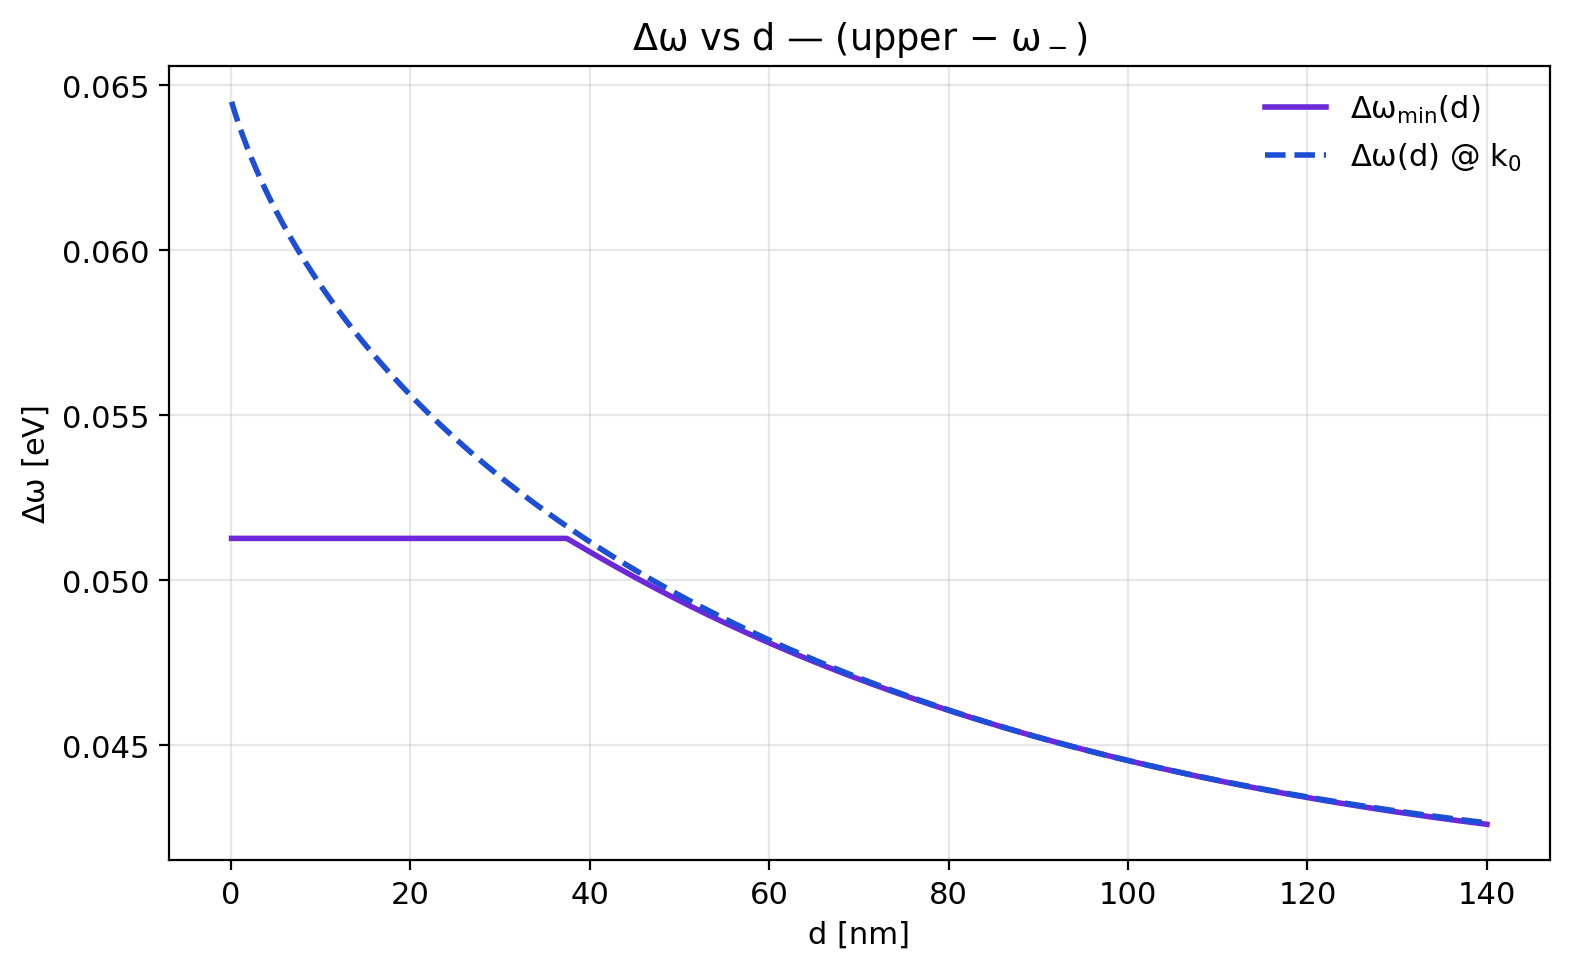

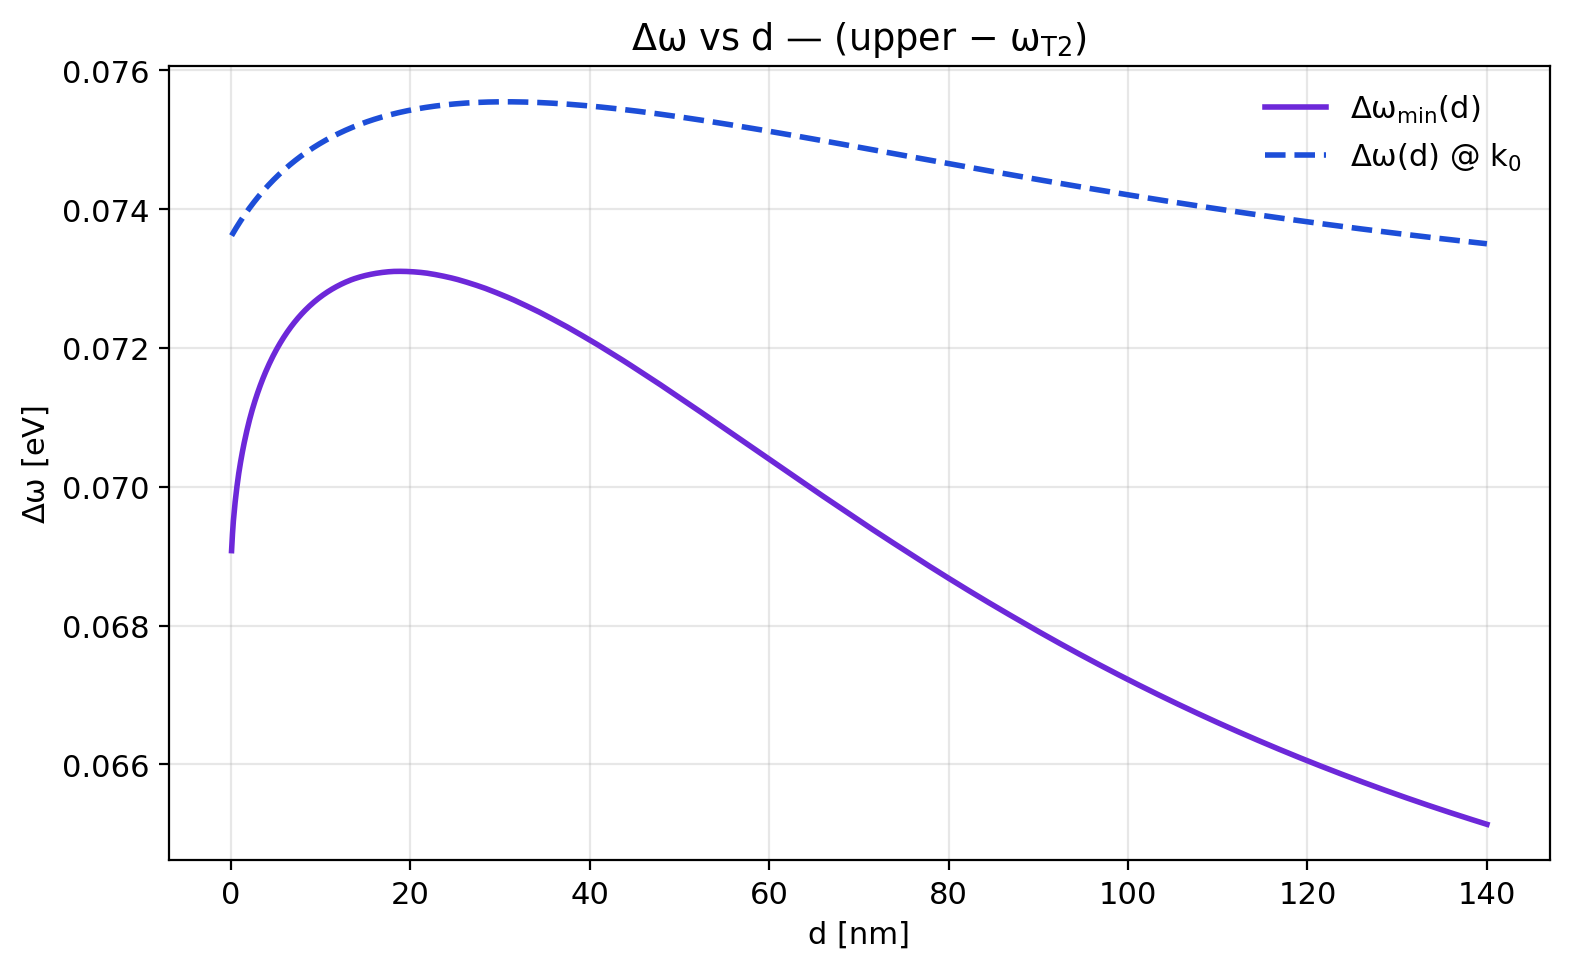

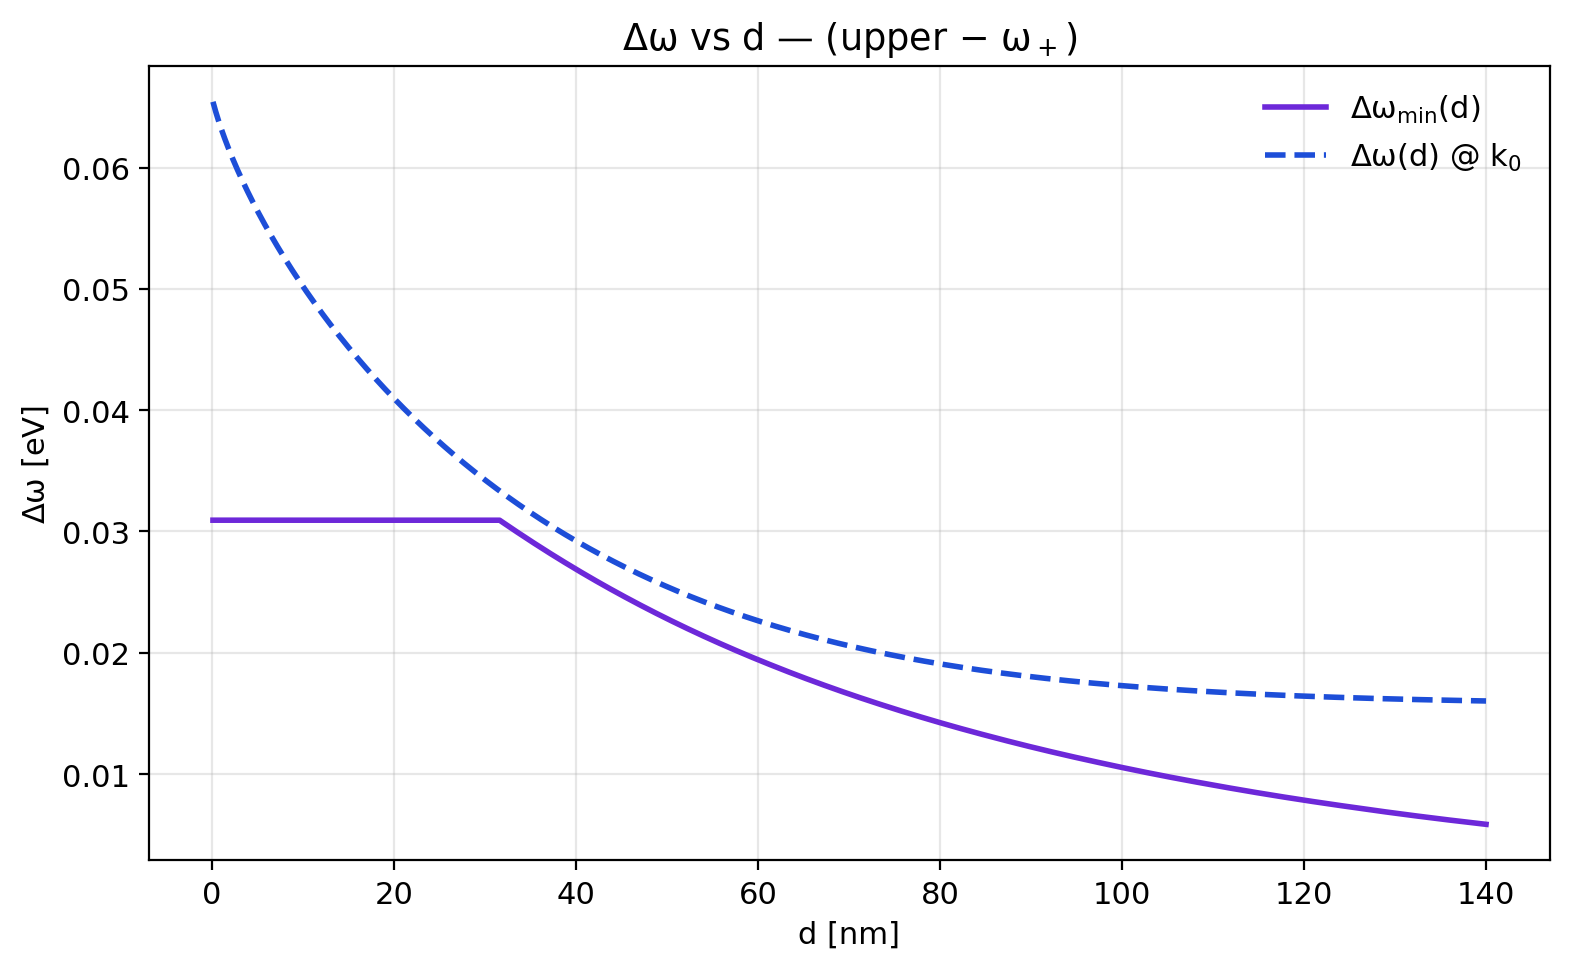

In [72]:
# -*- coding: utf-8 -*-
"""
Salida pedida: 3 figuras **independientes** (una por resta) con dos curvas vs espesor d (nm):
    • Δω_min(d)  — mínimo global de [ω_upper(k) − Ω(k)] en k∈[0, k_max]
    • Δω@k0(d)   — valor de ese gap en k0(Ω) = Ω^2 (ε1+ε∞,2) / (2 c ω_D)

Sistema: Hibridación de polaritón plasmónico de grafeno y polaritón fonónico superficial
(la ecuación analítica se implementa en u=ω² como en tu celda anterior; unidades en eV y nm).

Cómo usar:
1) Ejecuta este bloque tal cual en Jupyter. Es **autocontenido**.
2) Llama a `run_three_gap_figures(struct_key='Si → Al', d_min_nm=0.1, d_max_nm=20.0, d_step_nm=0.1,
                                   k_max_eV=7.0, n_k=600)`.
   Genera 3 figuras: (upper−ω₋), (upper−ω_T2) y (upper−ω₊).
3) Si prefieres llamar al espesor "h", solo cambia los labels (ver parámetro label_x).

Colores y estilo: sólido morado para Δω_min(d); azul discontinuo para Δω@k0(d),
como en tu ejemplo adjunto.
"""
from __future__ import annotations
import numpy as np
import matplotlib.pyplot as plt
from typing import List, Tuple, Optional, Dict

# ==========================
# Constantes y unidades
# ==========================
HBARC_EV_NM = 197.3269804       # ħc en eV·nm
HC_EV_PER_CM = 1.23984193e-4    # eV·cm — E[eV] = (cm^-1)*HC
ALPHA0 = 1/137.035999139        # α
EF = 0.63                       # eV (grafeno)
W_D = 2 * ALPHA0 * EF           # ~ 2 α EF (eV)
E1 = 1.0                        # ε del medio 1 (aire)
C_EFF = 1.0                     # c ADIMENSIONAL → 2*c*k*W_D tiene unidades eV² si k está en eV

# Materiales (parámetros en cm^-1 → eV)
MATS = {
    'Al2O3': {'einf': 2.5, 'wl_cm': 936.0,  'wt_cm': 772.0},
    'SiO2' : {'einf': 2.1, 'wl_cm': 1244.0, 'wt_cm': 1052.0},
}

def _to_eV(cm: float) -> float:
    return cm * HC_EV_PER_CM

# ==========================
# Construcción del polinomio en u = ω² (desde la ecuación analítica)
# ==========================

def _poly_mul(p: np.ndarray, q: np.ndarray) -> np.ndarray:
    return np.convolve(p, q)

def _poly_add(p: np.ndarray, q: np.ndarray) -> np.ndarray:
    n = max(len(p), len(q))
    r = np.zeros(n)
    r[:len(p)] += p
    r[:len(q)] += q
    return r

def _coeffs_from_analytic(struct_key: str, k_eV: float, d_eVinv: float) -> Tuple[np.ndarray, Tuple[float,float,float,float,float,float]]:
    """Coeficientes descendentes de P(u) con k en eV y d en eV⁻¹."""
    if struct_key == 'Si → Al':
        mat2, mat3 = 'SiO2', 'Al2O3'
    else:
        mat2, mat3 = 'Al2O3', 'SiO2'
    m2, m3 = MATS[mat2], MATS[mat3]
    einf2, wl2, wt2 = m2['einf'], _to_eV(m2['wl_cm']), _to_eV(m2['wt_cm'])
    einf3, wl3, wt3 = m3['einf'], _to_eV(m3['wl_cm']), _to_eV(m3['wt_cm'])

    th = np.tanh(d_eVinv * k_eV)  # adimensional

    def u_minus(a: float) -> np.ndarray:  # (u - a)
        return np.array([-a, 1.0])

    u = np.array([0.0, 1.0])

    # A(u) = ε∞2 (u - ωL2²)(u - ωT2²)
    A = einf2 * _poly_mul(u_minus(wl2**2), u_minus(wt2**2))

    # B(u) = ε∞3 u(u - ωL3²) + e1 u(u - ωT3²) + 2 c k ωD (−u + ωT3²)
    term1 = einf3 * _poly_mul(u, u_minus(wl3**2))
    term2 = E1    * _poly_mul(u, u_minus(wt3**2))
    term3 = 2 * C_EFF * k_eV * W_D * np.array([wt3**2, -1.0])  # ωT3² − u
    B = _poly_add(_poly_add(term1, term2), term3)

    # C(u) = ε∞3 (e1 u − 2 c k ωD)(u − ωL3²)(u − ωT2²)² + ε∞2² u(u − ωL2²)²(u − ωT3²)
    term1C = einf3 * _poly_mul(
        _poly_mul(np.array([-2 * C_EFF * k_eV * W_D, E1]), u_minus(wl3**2)),
        _poly_mul(u_minus(wt2**2), u_minus(wt2**2))
    )
    term2C = (einf2**2) * _poly_mul(
        u,
        _poly_mul(_poly_mul(u_minus(wl2**2), u_minus(wl2**2)), u_minus(wt3**2))
    )
    C = _poly_add(term1C, term2C)

    # P(u) = A(u)·B(u) + tanh(d k)·C(u)
    P_inc = _poly_add(_poly_mul(A, B), th * C)  # coeficientes en orden creciente
    a_desc = P_inc[::-1]  # descendente para numpy.roots

    # Asegurar grado ≤ 4 y recortar ceros líderes numéricos
    if len(a_desc) < 5:
        a_desc = np.concatenate([np.zeros(5 - len(a_desc)), a_desc])
    else:
        while len(a_desc) > 5 and abs(a_desc[0]) < 1e-22:
            a_desc = a_desc[1:]
    return a_desc, (einf2, wl2, wt2, einf3, wl3, wt3)

# ==========================
# Raíces reales (u ≥ 0) y ω = √u
# ==========================

def _real_u_roots(a_desc: np.ndarray,
                  tol_im_abs: float = 1e-9,
                  tol_im_rel: float = 1e-9) -> np.ndarray:
    aN = a_desc / a_desc[0] if abs(a_desc[0]) > 0 else a_desc
    r = np.roots(aN)
    mask = np.abs(r.imag) <= (tol_im_abs + tol_im_rel * np.maximum(1.0, np.abs(r.real)))
    u_reals = np.sort(r.real[mask])
    return np.clip(u_reals, 0.0, None)


def _omegas_from_u(u_reals: np.ndarray,
                   tol_w_abs: float = 1e-12,
                   tol_w_rel: float = 1e-7) -> np.ndarray:
    if u_reals.size == 0:
        return np.array([], dtype=float)
    ws = np.sort(np.sqrt(u_reals))  # ω = √u (eV)
    uniq = []
    for w in ws:
        if not uniq or abs(w - uniq[-1]) > max(tol_w_abs, tol_w_rel * max(1.0, abs(uniq[-1]))):
            uniq.append(w)
    return np.array(uniq, dtype=float)

# ==========================
# Asíntotas (mismas unidades)
# ==========================

def _mats_for(struct_key: str):
    if struct_key == 'Si → Al':
        mat2, mat3 = 'SiO2', 'Al2O3'
    else:
        mat2, mat3 = 'Al2O3', 'SiO2'
    m2, m3 = MATS[mat2], MATS[mat3]
    return (
        m2['einf'], _to_eV(m2['wl_cm']), _to_eV(m2['wt_cm']),
        m3['einf'], _to_eV(m3['wl_cm']), _to_eV(m3['wt_cm'])
    )


def asymptotes_kxinf(struct_key: str, ks_eV: np.ndarray) -> Dict[str, np.ndarray]:
    """Devuelve constantes ω_+, ω_-, ω_T2 y la curva plasmónica ω_pl(k)."""
    einf2, wl2, wt2, einf3, wl3, wt3 = _mats_for(struct_key)
    denom = 2.0 * (einf2 + einf3)
    A = (einf2 * wl2**2 + einf3 * wl3**2 + einf3 * wt2**2 + einf2 * wt3**2) / denom
    B = (-einf2 * wl2**2 - einf3 * wl3**2 - einf3 * wt2**2 - einf2 * wt3**2)**2 \
        - 4.0 * (einf2 + einf3) * (einf3 * wl3**2 * wt2**2 + einf2 * wl2**2 * wt3**2)
    first  = np.sqrt(max(A + np.sqrt(max(B, 0.0)) / denom, 0.0))   # ω_+
    second = np.sqrt(max(A - np.sqrt(max(B, 0.0)) / denom, 0.0))   # ω_-
    third  = wt2                                                   # ω_T2
    fourth = np.sqrt((2.0 * C_EFF * ks_eV * W_D) / (E1 + einf2))   # ω_pl(k)
    return {'first_const': first, 'second_const': second, 'third_wt2': third, 'fourth_curve': fourth}

# ==========================
# Continuidad y dispersión
# ==========================

def _order_by_continuity(prev_ws: Optional[np.ndarray], curr_ws: np.ndarray) -> np.ndarray:
    if prev_ws is None or prev_ws.size == 0:
        return curr_ws.copy()
    used = np.zeros(curr_ws.size, dtype=bool)
    ordered = []
    for wprev in prev_ws:
        jbest, best = -1, np.inf
        for j, w in enumerate(curr_ws):
            if used[j]:
                continue
            d = abs(w - wprev)
            if d < best:
                best, jbest = d, j
        if jbest >= 0:
            used[jbest] = True
            ordered.append(curr_ws[jbest])
    for j, w in enumerate(curr_ws):
        if not used[j]:
            ordered.append(w)
    return np.array(ordered, dtype=float)


def compute_dispersion(struct_key: str, d_eVinv: float, k_max_eV: float, n: int = 600,
                       connect: bool = True) -> Tuple[np.ndarray, List[np.ndarray]]:
    ks = np.linspace(0.0, float(k_max_eV), int(n))  # k en eV para el eje X
    prev_ws: Optional[np.ndarray] = None
    all_ws: List[np.ndarray] = []
    for k in ks:
        a_desc, _ = _coeffs_from_analytic(struct_key, k, d_eVinv)
        u = _real_u_roots(a_desc)
        ws = _omegas_from_u(u)
        if connect:
            ws = _order_by_continuity(prev_ws, ws)
            prev_ws = ws.copy()
        all_ws.append(ws)
    return ks, all_ws

# ==========================
# Utilidades de GAPS
# ==========================

def _branch_map_upper_and_refs(struct_key: str, ks: np.ndarray, all_ws: List[np.ndarray]):
    """Mapa { 'w_plus': idx, 'w_minus': idx, 'w_T2': idx }, idx_upper y valores Ω constantes."""
    asy = asymptotes_kxinf(struct_key, ks)
    finals = _branch_values_at_end(all_ws)
    nb = finals.size
    asy_vals = np.array([asy['first_const'], asy['second_const'], asy['third_wt2'], asy['fourth_curve'][-1]])
    used = [False]*4
    match = [-1]*nb
    for bi in np.argsort(finals):
        if not np.isfinite(finals[bi]):
            continue
        dists = [abs(finals[bi]-asy_vals[j]) if not used[j] else np.inf for j in range(4)]
        jbest = int(np.argmin(dists))
        used[jbest] = True
        match[bi] = jbest

    idx_upper = int(np.nanargmax(finals))
    idx_map = {}
    for bi, jA in enumerate(match):
        if jA == 0: idx_map['w_plus']  = bi
        if jA == 1: idx_map['w_minus'] = bi
        if jA == 2: idx_map['w_T2']    = bi

    const_vals = {'w_minus': float(asy['second_const']),
                  'w_T2':    float(asy['third_wt2']),
                  'w_plus':  float(asy['first_const'])}
    return idx_upper, idx_map, const_vals


def _branch_values_at_end(all_ws: List[np.ndarray]) -> np.ndarray:
    nb = max((ws.size for ws in all_ws), default=0)
    finals = np.full(nb, np.nan)
    for bi in range(nb):
        for ws in reversed(all_ws):
            if bi < ws.size:
                finals[bi] = ws[bi]
                break
    return finals


def _gap_curve_vs_k(ks: np.ndarray, all_ws: List[np.ndarray], idx_upper: int, idx_ref: int) -> np.ndarray:
    y = np.full_like(ks, np.nan, dtype=float)
    for t, ws in enumerate(all_ws):
        if idx_upper < ws.size and idx_ref < ws.size:
            y[t] = ws[idx_upper] - ws[idx_ref]
    return y


def _k0_from_Omega(struct_key: str, Omega: float) -> float:
    einf2, *_ = _mats_for(struct_key)
    return float((Omega**2) * (E1 + einf2) / (2.0 * C_EFF * W_D))

# ==========================
# Escaneo en d y figuras independientes
# ==========================

def calc_gap_series_for_key(struct_key: str, d_nm_values: np.ndarray, k_max_eV: float, n_k: int,
                            key: str) -> Tuple[np.ndarray, np.ndarray]:
    """Devuelve (Δω_min(d), Δω@k0(d)) para key∈{'w_minus','w_T2','w_plus'}.
    d_nm_values: array de espesores en nm.
    """
    dw_min = np.full_like(d_nm_values, np.nan, dtype=float)
    dw_k0  = np.full_like(d_nm_values, np.nan, dtype=float)

    for i, d_nm in enumerate(d_nm_values):
        d_eVinv = d_nm / HBARC_EV_NM
        ks, all_ws = compute_dispersion(struct_key, d_eVinv, k_max_eV, n=n_k, connect=True)
        if not any(ws.size for ws in all_ws):
            continue
        idx_upper, idx_map, const_vals = _branch_map_upper_and_refs(struct_key, ks, all_ws)
        if key not in idx_map:
            continue
        y = _gap_curve_vs_k(ks, all_ws, idx_upper, idx_map[key])
        m = np.isfinite(y)
        if m.any():
            dw_min[i] = float(np.nanmin(y[m]))
        # Δω en k0(Ω)
        Omega = const_vals[key]
        k0 = _k0_from_Omega(struct_key, Omega)
        if np.isfinite(k0) and (ks.min() <= k0 <= ks.max()) and m.any():
            dw_k0[i] = float(np.interp(k0, ks[m], y[m]))
    return dw_min, dw_k0


def plot_gap_series_one_figure(d_nm_values: np.ndarray, dw_min: np.ndarray, dw_k0: np.ndarray,
                               title: str, label_x: str = 'd [nm]') -> None:
    plt.figure(figsize=(8, 5))
    ax = plt.gca()
    ax.plot(d_nm_values, dw_min, color='#6d28d9', linewidth=2.0, label=r"$\Delta\omega_\min(d)$")
    ax.plot(d_nm_values, dw_k0,  linestyle='--', linewidth=2.0, color='#1d4ed8',
            label=r"$\Delta\omega(d)$ @ $k_0$")
    ax.set_xlabel(label_x)
    ax.set_ylabel(r"$\Delta\omega$ [eV]")
    ax.set_title(title)
    ax.grid(True, alpha=0.3)
    ax.legend(loc='best', frameon=False)
    plt.tight_layout(); plt.show()


def run_three_gap_figures(struct_key: str = 'Si → Al',
                          d_min_nm: float = 0.1, d_max_nm: float = 140.0, d_step_nm: float = 0.1,
                          k_max_eV: float = 7.0, n_k: int = 600,
                          label_x: str = 'd [nm]') -> None:
    """Genera las 3 figuras independientes solicitadas."""
    d_vals = np.arange(d_min_nm, d_max_nm + 1e-9, d_step_nm)
    keys_and_titles = [
        ('w_minus', r"$\Delta\omega$ vs d — (upper $-$ $\omega_-$)"),
        ('w_T2',    r"$\Delta\omega$ vs d — (upper $-$ $\omega_{T2}$)"),
        ('w_plus',  r"$\Delta\omega$ vs d — (upper $-$ $\omega_+$)"),
    ]
    for key, ttl in keys_and_titles:
        dw_min, dw_k0 = calc_gap_series_for_key(struct_key, d_vals, k_max_eV, n_k, key)
        plot_gap_series_one_figure(d_vals, dw_min, dw_k0, ttl, label_x=label_x)

# Ejemplo rápido (descomenta para probar):
#run_three_gap_figures(struct_key='Si → Al', d_min_nm=0.1, d_max_nm=20.0, d_step_nm=0.1, k_max_eV=7.0, n_k=600, label_x='d [nm]')
run_three_gap_figures(struct_key='Al → Si', d_min_nm=0.1, d_max_nm=140.0, d_step_nm=0.1, k_max_eV=7.0, n_k=200, label_x='d [nm]')


## 3. Hibridación de polaritón plasmónimo de grafeno acústico y polaritón fonónico de volumen I



### Ecuación general 
$$
\varepsilon_{\infty 2}\,\omega^{2}\,(\omega - \omega_{L2})(\omega + \omega_{L2})
+\Big(\varepsilon_{1}\,\omega^{2} - 2\,c\,k_x\,\omega_D\Big)\,(\omega - \omega_{T2})(\omega + \omega_{T2})\,\tanh(d\,k_x)
= 0.
$$

De aquí se obtienen **2 soluciones**.

 $$
 \omega(k_x)=\sqrt{\frac{\,\varepsilon_{\infty 2}\,\omega_{L2}^{2}\,\cosh(d k_x)+\big(2 c k_x \omega_D+\varepsilon_{1}\,\omega_{T2}^{2}\big)\,\sinh(d k_x)
 \;\pm\;\sqrt{\Big[\varepsilon_{\infty 2}\,\omega_{L2}^{2}\,\cosh(d k_x)+\big(2 c k_x \omega_D+\varepsilon_{1}\,\omega_{T2}^{2}\big)\,\sinh(d k_x)\Big]^2
-8\,c\,k_x\,\omega_D\,\omega_{T2}^{2}\,\sinh(d k_x)\,\Big(\varepsilon_{\infty 2}\,\cosh(d k_x)+\varepsilon_{1}\,\sinh(d k_x)\Big)}}{\,2\,\Big(\varepsilon_{\infty 2}\,\cosh(d k_x)+\varepsilon_{1}\,\sinh(d k_x)\Big)\,}}\,.
 $$

---

### Límites asintóticos

#### 1) $k_x\to 0$ ($\tanh(d k_x)\to 0$)

Ecuación reducida:

$$
\varepsilon_{\infty 2}\,\omega^{2}\,(\omega - \omega_{L2})(\omega + \omega_{L2})=0.
$$

Soluciones (frecuencias positivas):

$$
\omega=0,\qquad \omega=\omega_{L2}.
$$

---

#### 2) $k_x\to \infty$ ($\tanh(d k_x)\to 1$)

Ecuación reducida:

$$
\varepsilon_{\infty 2}\,\omega^{2}\,(\omega - \omega_{L2})(\omega + \omega_{L2})
+\Big(\varepsilon_{1}\,\omega^{2}-2 c k_x \omega_D\Big)(\omega-\omega_{T2})(\omega+\omega_{T2})=0.
$$

Sus soluciones son:

$$
\omega=\omega_{T2},
$$

$$
\omega=\sqrt{\;\frac{2 c k_x \omega_D}{\varepsilon_{1}+\varepsilon_{\infty 2}}}\,
$$


In [64]:
# %% [markdown]
# AGP (grafeno acústico) + fonón de volumen — solución exacta y asíntotas (sin enmascarado)
# 
# **FIX**: Eliminadas las etiquetas con TeX (\\omega, \\Delta, etc.) que provocaban
# `ValueError: Unknown symbol: \` en algunos entornos. Ahora las leyendas usan
# **Unicode** (ω, Δ, subíndices) o texto plano para máxima compatibilidad.
# 
# • Ecuación base:  ε∞2 ω²(ω−ωL2)(ω+ωL2) + (ε1 ω² − 2 c kx ωD)(ω−ωT2)(ω+ωT2) tanh(d kx) = 0
# • Dos ramas exactas (ω±) a partir de la solución cerrada en ω².
# • **Asíntotas sin enmascarado** sobre TODO el rango X (aunque la LO solo es estricta a k→∞):
#     - Alta (LO):  ω_high(X) = sqrt( 2 c_eff X ωD / (ε1 + ε∞2) ),  con  X ≡ kx·ħc  [eV]
#     - Baja:       ω_low  = ωT2
#     - k→0:        ω → ωL2 (línea horizontal de referencia)
# • Solo dos deslizadores:  d∈[0,20] nm  y  X_max∈[0,100] eV.
# • Figura 2: curva Δω(X) = ω_+ − ω_- con el **mínimo** marcado y **X_kmin**.
# • **Figura 3**: Δω frente a d, con dos curvas:  
#     (i) Δω_min(d) = min_X[ω_+−ω_-]  y  (ii) Δω(d) evaluado en X_kmin.

# %% Imports y estilos
import numpy as np
import matplotlib.pyplot as plt

try:
    import ipywidgets as W
    from IPython.display import display, clear_output
    HAVE_WIDGETS = True
except Exception:
    HAVE_WIDGETS = False

plt.rcParams.update({
    "figure.figsize": (7.8, 5.2),
    "axes.grid": True,
    "grid.alpha": 0.28,
    "font.size": 11,
})

# %% Constantes y parámetros fijos
HBARC_EV_NM = 197.3269804          # ħc [eV·nm]
CM1_PER_eV = 8065.54429            # 1 eV = 8065.54429 cm^-1
ALPHA0 = 1/137.035999084           # α0

def cm1_to_eV(nu_cm1):
    return nu_cm1/CM1_PER_eV

# Parámetros del material polar (fijos aquí)
MATS = {
    "SiO2":  {"eps_inf2": 2.1, "wL2": cm1_to_eV(1244.0), "wT2": cm1_to_eV(1052.0)},
    "Al2O3": {"eps_inf2": 2.5, "wL2": cm1_to_eV( 936.0), "wT2": cm1_to_eV( 772.0)},
}
MATERIAL = "SiO2"     # ← fijo (cámbialo aquí si quieres Al2O3)
EPS1     = 1.0         # ε1 (adimensional)
EF_EV    = 0.63        # EF [eV] para ωD ≈ 2 α0 EF
C_EFF    = 1.0         # factor adimensional en 2 c kx ωD

# %% Solución exacta de las dos ramas (positivas) a partir de la fórmula cerrada
# ω² = [A ± sqrt(A² − B)]/(2D), con
#   A = ε∞2 wL2² cosh(dk) + [2 c_eff X ωD + ε1 wT2²] sinh(dk)
#   D = ε∞2 cosh(dk) + ε1 sinh(dk)
#   B = 8 c_eff X ωD wT2² sinh(dk) D
# donde X = kx·ħc.

def omega_branches(X_eV, d_nm):
    par = MATS[MATERIAL]
    eps_inf2, wL2, wT2 = par["eps_inf2"], par["wL2"], par["wT2"]

    d_eVinv = d_nm / HBARC_EV_NM               # [eV^-1]
    arg = d_eVinv * np.asarray(X_eV)
    s, c = np.sinh(arg), np.cosh(arg)

    wD = 2 * ALPHA0 * EF_EV                     # ωD en eV

    A = eps_inf2 * (wL2**2) * c + (2*C_EFF*np.asarray(X_eV)*wD + EPS1*(wT2**2)) * s
    D = eps_inf2 * c + EPS1 * s
    B = 8.0 * C_EFF * np.asarray(X_eV) * wD * (wT2**2) * s * D

    rad = A*A - B
    rad = np.where(rad < 0, np.nan, rad)
    denom = 2.0 * D

    w2_plus  = (A + np.sqrt(rad)) / denom
    w2_minus = (A - np.sqrt(rad)) / denom

    w_plus  = np.sqrt(np.clip(w2_plus,  0, None))
    w_minus = np.sqrt(np.clip(w2_minus, 0, None))
    return w_plus, w_minus, (wL2, wT2, wD, eps_inf2)

# %% Asímptotas LO (sin enmascarado)
#   Alta (LO): ω_high(X) = sqrt( 2 C_EFF X ωD / (ε1 + ε∞2) )
#   Baja:      ω_low  = wT2

def asymptotes_LO_allX(X_eV, eps1, wT2, wD, eps_inf2):
    den = (eps1 + eps_inf2)
    w_high = np.sqrt(np.clip( (2.0 * C_EFF * np.asarray(X_eV) * wD) / den, 0, None ))
    w_low  = np.full_like(np.asarray(X_eV), wT2)
    return w_high, w_low

# %% Figura 1: dispersión con asímptotas

def plot_agp_bulk_minimal(d_nm=5.0, Xmax_eV=100.0, npts=700):
    X = np.linspace(0.0, float(Xmax_eV), int(npts))
    wP, wM, aux = omega_branches(X, d_nm)
    wL2, wT2, wD, eps_inf2 = aux

    col_up, col_lo = "#1f77b4", "#ff7f0e"  # azul y naranja

    fig, ax = plt.subplots()
    ax.plot(X, wP, lw=2.2, color=col_up, label="ω₊(kₓ)")
    ax.plot(X, wM, lw=2.2, color=col_lo, label="ω₋(kₓ)")

    # Asímptotas sobre todo el rango (sin enmascarado)
    w_high, w_low = asymptotes_LO_allX(X, EPS1, wT2, wD, eps_inf2)
    ax.hlines(wL2, X[0], X[-1], ls="--", lw=1.5, color=col_up, alpha=0.9, label="ω → ωL₂ (k→0)")
    ax.plot(X, w_low,  ls="--", lw=1.5, color=col_lo, alpha=0.9, label="ω → ωT₂ (k→∞)")
    ax.plot(X, w_high, ls="--", lw=1.7, color=col_up, alpha=0.95, label="Asíntota alta LO (k→∞)")

    # Intersección LO con ω_T2 (X_kmin)
    X_kmin = (wT2**2) * (EPS1 + eps_inf2) / (2.0 * C_EFF * wD)
    if np.isfinite(X_kmin) and 0 <= X_kmin <= X[-1]:
        ax.axvline(X_kmin, color="red", ls=":", lw=1.5)
        ax.plot([X_kmin], [wT2], marker="o", color="red", ms=5)
        ax.legend(loc="best", fontsize=9, frameon=False, ncol=2,
                  title=f"X_kmin ≈ {X_kmin:.3f} eV")
    else:
        ax.legend(loc="best", fontsize=9, frameon=False, ncol=2)

    ax.set_xlim(0, X[-1])
    ymax = np.nanmax(np.concatenate([wP, wM, [wL2, wT2]]))
    ax.set_ylim(0, 1.05*ymax)
    ax.set_xlabel("kx·ħc  [eV]")
    ax.set_ylabel("ω  [eV]")
    ax.set_title(f"AGP + fonón de volumen • {MATERIAL}  |  d={d_nm:.2f} nm,  ε₁={EPS1:g},  EF={EF_EV:.2f} eV,  c_eff={C_EFF:g}")
    plt.show()

# %% Figura 2: Δω(X) = ω_+ − ω_- con mínimo marcado y X_kmin en leyenda

def plot_gap_curve_minimal(d_nm=5.0, Xmax_eV=100.0, npts=700):
    X = np.linspace(0.0, float(Xmax_eV), int(npts))
    wP, wM, aux = omega_branches(X, d_nm)
    wL2, wT2, wD, eps_inf2 = aux
    diff = wP - wM

    # mínimo de Δω (evita nans)
    diff_f = np.where(np.isfinite(diff), diff, np.inf)
    idx = int(np.argmin(diff_f))
    Xg = X[idx]; dmin = diff[idx]

    # X_kmin teórico (intersección asíntota LO con ω_T2)
    X_kmin = (wT2**2) * (EPS1 + eps_inf2) / (2.0 * C_EFF * wD)

    fig, ax = plt.subplots()
    ax.plot(X, diff, lw=2.0, color="#6a3d9a", label="Δω = ω₊ − ω₋")

    # Punto del mínimo
    if np.isfinite(dmin):
        ax.plot([Xg], [dmin], marker="o", ms=6, color="#6a3d9a",
                label=f"min Δω ≈ {dmin:.4f} eV en X ≈ {Xg:.3f} eV")
        ax.axvline(Xg, color="#6a3d9a", ls=":", lw=1.0)

    # Anotar X_kmin
    if np.isfinite(X_kmin):
        ax.plot([], [], ' ', label=f"X_kmin ≈ {X_kmin:.3f} eV")
        ax.axvline(X_kmin, color='r', linestyle='--', linewidth=2, label='k_min del acoplo real')

    ax.set_xlim(0, X[-1])
    ytop = np.nanmax(diff_f[np.isfinite(diff_f)])
    if np.isfinite(ytop):
        ax.set_ylim(0, 1.05*ytop)
    ax.set_xlabel("kx·ħc  [eV]")
    ax.set_ylabel("Δω  [eV]")
    ax.set_title("Separación de ramas Δω(X) y mínimos")
    ax.legend(loc="best", fontsize=9, frameon=False)
    plt.show()

# %% Figura 3: Δω(d) — dos curvas: mínimo global y valor en X_kmin (para cada d)

def delta_vs_d_curves(d_min_nm=0.0, d_max_nm=20.0, Nd=121, Xmax_eV=100.0, npts_X=800):
    par = MATS[MATERIAL]
    eps_inf2, wT2 = par["eps_inf2"], par["wT2"]
    wD = 2*ALPHA0*EF_EV
    # X_kmin (constante en d)
    X_kmin = (wT2**2) * (EPS1 + eps_inf2) / (2.0 * C_EFF * wD)

    d_vals = np.linspace(d_min_nm, d_max_nm, int(Nd))
    dmin_curve = np.full_like(d_vals, np.nan, dtype=float)
    dkmin_curve = np.full_like(d_vals, np.nan, dtype=float)

    X = np.linspace(0.0, float(Xmax_eV), int(npts_X))

    for i, d_nm in enumerate(d_vals):
        # Δω(X) para este d
        wP, wM, _ = omega_branches(X, d_nm)
        diff = wP - wM
        mask = np.isfinite(diff)
        if np.any(mask):
            dmin_curve[i] = np.nanmin(diff[mask])
        # Δω en X_kmin para este d
        wP_k, wM_k, _ = omega_branches([X_kmin], d_nm)
        val = (wP_k[0] - wM_k[0])
        dkmin_curve[i] = val if np.isfinite(val) else np.nan

    return d_vals, dmin_curve, dkmin_curve, X_kmin


def plot_delta_vs_d_three(d_min_nm=0.0, d_max_nm=20.0, Nd=121, Xmax_eV=100.0):
    d_vals, dmin_curve, dkmin_curve, X_kmin = delta_vs_d_curves(d_min_nm, d_max_nm, Nd, Xmax_eV)
    fig, ax = plt.subplots()
    ax.plot(d_vals, dmin_curve, lw=2.2, color="#6a3d9a", label="Δω_min(d) = min_X[ω₊−ω₋]")
    ax.plot(d_vals, dkmin_curve, lw=2.2, ls="--", color="#1f77b4", label=f"Δω(d) @ X_kmin≈{X_kmin:.3f} eV")
    ax.set_xlabel("d  [nm]")
    ax.set_ylabel("Δω  [eV]")
    ax.set_title("Δω vs d — mínimo global y valor en X_kmin")
    ax.legend(loc="best", frameon=False)
    plt.show()

# %% Interfaz: dos sliders (d y Xmax) + densidad en d para figura 3
if HAVE_WIDGETS:
    w_d     = W.FloatSlider(value=5.0, min=0.0, max=2000.0, step=0.1, description="d [nm]")
    w_Xmax  = W.FloatSlider(value=100.0, min=0.0, max=100.0, step=1.0, description="kx·ħc max [eV]")
    w_Nd    = W.IntSlider(value=121, min=21, max=401, step=10, description="# d pts")
    ui = W.HBox([w_d, w_Xmax, w_Nd])
    out = W.Output()

    def _upd(*_):
        with out:
            clear_output(wait=True)
            plot_agp_bulk_minimal(d_nm=w_d.value, Xmax_eV=w_Xmax.value)
            plot_gap_curve_minimal(d_nm=w_d.value, Xmax_eV=w_Xmax.value)
            plot_delta_vs_d_three(d_min_nm=0.0, d_max_nm=20.0, Nd=w_Nd.value, Xmax_eV=w_Xmax.value)

    for w in [w_d, w_Xmax, w_Nd]:
        w.observe(_upd, "value")

    display(ui); _upd(); display(out)
else:
    # Fallback estático
    plot_agp_bulk_minimal(d_nm=5.0, Xmax_eV=100.0)
    plot_gap_curve_minimal(d_nm=5.0, Xmax_eV=100.0)
    plot_delta_vs_d_three(d_min_nm=0.0, d_max_nm=20.0, Nd=121, Xmax_eV=100.0)


Output()

# SOLUCIONES CON SLIDERS

## Hibridación de polaritones fonónicos superficiales I

In [36]:
# -*- coding: utf-8 -*-
# D# -*- coding: utf-8 -*-
# Dispersion ω(kx) con leyenda LaTeX y asintóticas coloreadas como su rama

import numpy as np
import matplotlib.pyplot as plt
from typing import List, Tuple
from ipywidgets import interact, FloatSlider, Checkbox, Dropdown
from collections import OrderedDict

# === Preferencias de render: mathtext interno ===
plt.rcParams.update({
    "text.usetex": False,
    "axes.unicode_minus": False,
})

# === Constantes y tolerancias ===
HC_EV_NM = 1239.84193
REAL_TOL = 1e-8
_DEF_EPS = 1e-12
NUM_PTS = 600

# -------------------------------------------------------------------------------------
# Coeficientes de la cúbica a3 u^3 + a2 u^2 + a1 u + a0 = 0, con a_i = a_i^C + a_i^S tanh(d kx)
# -------------------------------------------------------------------------------------
CONFIGS = {
    "Al|Si": {
        "a3_C": -7.75,         "a3_S": -8.35,
        "a2_C":  0.342797,     "a2_S":  0.363105,
        "a1_C": -0.0047448,    "a1_S": -0.00508909,
        "a0_C":  0.0000206569, "a0_S":  0.0000234777,
    },
    "Si|Al": {
        "a3_C": -7.35,         "a3_S": -6.91,
        "a2_C":  0.389832,     "a2_S":  0.36895,
        "a1_C": -0.00664436,   "a1_S": -0.00628702,
        "a0_C":  0.0000364004, "a0_S":  0.0000326084,
    },
}

CONFIG_LABELS = {
    "Al|Si": "Al arriba / Si abajo",
    "Si|Al": "Si arriba / Al abajo",
}

# -------------------------------------------------------------------------------------
# Helpers físicos (para etiquetas en la leyenda)
# -------------------------------------------------------------------------------------

def _materials_for_apilamiento(apilamiento: str):
    try:
        mats = {
            "Al": {"einf": float(eps_inf_al), "wL": float(w_l0_al), "wT": float(w_t0_al)},
            "Si": {"einf": float(eps_inf_si), "wL": float(w_l0_si), "wT": float(w_t0_si)},
        }
        e1_loc = float(e1)
        if apilamiento == "Al|Si":
            top, bottom = mats["Al"], mats["Si"]
        else:
            top, bottom = mats["Si"], mats["Al"]
        return {"top": top, "bottom": bottom, "e1": e1_loc}
    except Exception:
        return None

def _u1inf_w(mat, e1_val):
    """ω_inf(1-X) en frecuencia a partir de u=(einf*ωL^2 + e1*ωT^2)/(einf+e1)."""
    u1 = (mat["einf"]*mat["wL"]**2 + e1_val*mat["wT"]**2) / (mat["einf"] + e1_val)
    return float(np.sqrt(max(u1, 0.0)))

def _u23inf_w_pair(top, bottom):
    a = bottom["einf"]*(bottom["wL"]**2 + top["wT"]**2) + top["einf"]*(top["wL"]**2 + bottom["wT"]**2)
    b = -4.0*(top["einf"] + bottom["einf"])*(bottom["einf"]*bottom["wL"]**2*top["wT"]**2 + top["einf"]*top["wL"]**2*bottom["wT"]**2)
    disc = max(a*a + b, 0.0)
    denom = 2.0*(top["einf"] + bottom["einf"])
    u2 = (a - np.sqrt(disc)) / denom
    u3 = (a + np.sqrt(disc)) / denom
    return float(np.sqrt(max(u2, 0.0))), float(np.sqrt(max(u3, 0.0)))

def _match_labels(values: np.ndarray, candidates: OrderedDict, rel_tol: float = 2e-2):
    out = []
    for v in values:
        if not np.isfinite(v):
            continue
        best_key, best_rel = None, float("inf")
        for name, cv in candidates.items():
            rel = abs(v - cv) / max(cv, 1e-12)
            if rel < best_rel:
                best_key, best_rel = name, rel
        approx = r"\sim " if best_rel > rel_tol else ""
        label = rf"${approx}{best_key} = {v:.6g}\,\mathrm{{eV}}$"
        out.append((float(v), label))
    return out

def _legend_candidates_zero(apilamiento: str):
    mats = _materials_for_apilamiento(apilamiento)
    if mats is None:
        return None
    top, bottom, e1_val = mats["top"], mats["bottom"], mats["e1"]
    cand = OrderedDict()
    cand[r"\omega_T^{\mathrm{top}}"]    = top["wT"]
    cand[r"\omega_L^{\mathrm{top}}"]    = top["wL"]
    cand[r"\omega_T^{\mathrm{bottom}}"] = bottom["wT"]
    # petición del usuario: etiquetar como ω_{∞_{1-3}} en vez de ω_L^{bottom}
    cand[r"\omega_{\infty_{1-3}}"]       = _u1inf_w(bottom, e1_val)
    cand[r"\omega_{\infty(1\!-\!2)}"]   = _u1inf_w(top, e1_val)
    return cand

def _legend_candidates_inf(apilamiento: str):
    mats = _materials_for_apilamiento(apilamiento)
    if mats is None:
        return None
    top, bottom, e1_val = mats["top"], mats["bottom"], mats["e1"]
    w1 = _u1inf_w(top, e1_val)
    w2, w3 = _u23inf_w_pair(top, bottom)
    cand = OrderedDict()
    cand[r"u_{1\infty}\equiv \omega_{\infty(1\!-\!2)}"] = w1
    cand[r"u_{2\infty}\, (\mathrm{SPhP}\,-)"]              = w2
    cand[r"u_{3\infty}\, (\mathrm{SPhP}\,+)"]              = w3
    return cand

# -------------------------------------------------------------------------------------
# Utilidades numéricas
# -------------------------------------------------------------------------------------

def _real_nonneg_roots(z: np.ndarray, tol: float = REAL_TOL) -> np.ndarray:
    z = np.asarray(z)
    mask = np.abs(np.imag(z)) < tol
    ur = np.real(z[mask])
    return ur[ur >= -_DEF_EPS]


def _track_branches(y_sets: List[np.ndarray], max_branches: int = 3) -> List[np.ndarray]:
    num_pts = len(y_sets)
    branches = [np.full(num_pts, np.nan) for _ in range(max_branches)]
    y0 = y_sets[0]
    for i in range(min(max_branches, y0.size)):
        branches[i][0] = y0[i]
    for j in range(1, num_pts):
        avail = list(y_sets[j])
        for b in range(max_branches):
            prev = branches[b][j-1]
            if np.isfinite(prev) and avail:
                idx = int(np.argmin([abs(v - prev) for v in avail]))
                branches[b][j] = avail.pop(idx)
        for b in range(max_branches):
            if not avail:
                break
            if not np.isfinite(branches[b][j]):
                branches[b][j] = avail.pop(0)
    return branches

# -------------------------------------------------------------------------------------
# Solver de la cúbica y límites (t=0 y t=1)
# -------------------------------------------------------------------------------------

def _coeffs_from_t(t: np.ndarray | float, apilamiento: str) -> Tuple[np.ndarray, np.ndarray, np.ndarray, np.ndarray]:
    cfg = CONFIGS[apilamiento]
    a3 = cfg["a3_C"] + cfg["a3_S"] * t
    a2 = cfg["a2_C"] + cfg["a2_S"] * t
    a1 = cfg["a1_C"] + cfg["a1_S"] * t
    a0 = cfg["a0_C"] + cfg["a0_S"] * t
    return a3, a2, a1, a0


def _omega_sets_over_kx(d_eV: float, kx: np.ndarray, apilamiento: str) -> List[np.ndarray]:
    t = np.tanh(d_eV * kx)
    a3, a2, a1, a0 = _coeffs_from_t(t, apilamiento)
    coeffs = np.vstack([a3, a2, a1, a0]).T
    omega_sets: List[np.ndarray] = []
    for c in coeffs:
        u_roots = np.roots(c)
        ur = _real_nonneg_roots(u_roots)
        if ur.size:
            w = np.sqrt(np.clip(ur, 0.0, None))
            w.sort()
        else:
            w = np.array([])
        omega_sets.append(w)
    return omega_sets


def _limit_omegas(d_eV: float, apilamiento: str) -> Tuple[np.ndarray, np.ndarray]:
    a3, a2, a1, a0 = _coeffs_from_t(0.0, apilamiento)
    u0 = np.roots([a3, a2, a1, a0])
    u0r = _real_nonneg_roots(u0)
    w0 = np.sqrt(np.clip(np.sort(u0r), 0.0, None))
    a3i, a2i, a1i, a0i = _coeffs_from_t(1.0, apilamiento)
    ui = np.roots([a3i, a2i, a1i, a0i])
    uir = _real_nonneg_roots(ui)
    winf = np.sqrt(np.clip(np.sort(uir), 0.0, None))
    return w0, winf

# -------------------------------------------------------------------------------------
# Mapeo de colores: asignar cada asintótica ω∞ al color de su rama correspondiente
# -------------------------------------------------------------------------------------

def _asymptote_color_map(winf: np.ndarray, branches: List[np.ndarray], lines: list) -> list:
    """Devuelve lista de colores por índice de ω∞, emparejando por proximidad con
    el valor de la rama en el extremo derecho del dominio (último valor finito)."""
    colors = [None] * len(winf)
    if len(winf) == 0:
        return colors
    # valor de cada rama en el extremo derecho
    tails, cols = [], []
    for br, ln in zip(branches, lines):
        if ln is None or br is None:
            continue
        idxs = np.where(np.isfinite(br))[0]
        if idxs.size == 0:
            continue
        tails.append(float(br[idxs[-1]]))
        cols.append(ln.get_color())
    assigned = set()
    for tail, col in zip(tails, cols):
        if not np.isfinite(tail):
            continue
        dists = [abs(float(w) - tail) for w in winf]
        order = np.argsort(dists)
        for idx in order:
            if idx not in assigned:
                colors[idx] = col
                assigned.add(idx)
                break
    return colors

# -------------------------------------------------------------------------------------
# Trazado
# -------------------------------------------------------------------------------------

def _plot(kx: np.ndarray, d_eV: float, branches: List[np.ndarray], apilamiento: str, show_asymptotes: bool = True):
    plt.figure(figsize=(7.6, 4.8), dpi=120)

    # 1) Ramas numéricas (renombradas) y captura de colores
    labels = ["Upper branch", "Mid branch", "Low branch"]
    any_data = False
    line_objs = []
    for i, br in enumerate(branches):
        if np.isfinite(br).any():
            any_data = True
            ln, = plt.plot(kx, br, lw=2, label=labels[i])
            line_objs.append(ln)
        else:
            line_objs.append(None)

    # 2) Asintóticas y cortes en kx=0 con ETIQUETAS FÍSICAS y COLORES DE RAMA
    if show_asymptotes:
        w0, winf = _limit_omegas(d_eV, apilamiento)
        x0 = kx[0]

        # --- mapeo colores ω∞ ↔ ramas
        asym_colors = _asymptote_color_map(winf, branches, line_objs)

        # --- kx -> ∞ (LaTeX + color de rama)
        cand_inf = _legend_candidates_inf(apilamiento)
        if cand_inf is not None and winf.size:
            pairs_inf = _match_labels(winf, cand_inf, rel_tol=2e-2)
            for idx, (y, lbl) in enumerate(pairs_inf):
                plt.axhline(y=float(y), ls='--', lw=1.6, alpha=0.75,
                            color=(asym_colors[idx] if asym_colors[idx] is not None else None),
                            label=lbl)
        else:
            for idx, y in enumerate(winf):
                plt.axhline(y=float(y), ls='--', lw=1.6, alpha=0.75,
                            color=(asym_colors[idx] if asym_colors[idx] is not None else None),
                            label=rf"$\\omega_{{\\infty,{idx+1}}}={float(y):.6g}\\,\\mathrm{{eV}}$")

        # --- kx -> 0 (dejamos marcadores en negro contorneados)
        cand_zero = _legend_candidates_zero(apilamiento)
        if cand_zero is not None and w0.size:
            pairs_zero = _match_labels(w0, cand_zero, rel_tol=2e-2)
            for y, lbl in pairs_zero:
                plt.plot([x0], [float(y)], marker='o', ms=6, mfc='white', mec='k', label=lbl)
        else:
            for idx, y in enumerate(w0):
                plt.plot([x0], [float(y)], marker='o', ms=6, mfc='white', mec='k',
                         label=rf"$\\omega_{{0,{idx+1}}}={float(y):.6g}\\,\\mathrm{{eV}}$")

    # 3) Decoración
    titulo = (
        "Hibridación de polaritones fonónicos superficiales I" + "\n" +
        f"Apilamiento: {CONFIG_LABELS[apilamiento]}"
    )
    plt.title(titulo)
    plt.xlabel(r"$k_x \cdot \hbar \cdot c$ (eV)")
    plt.ylabel(r"$\omega$ (eV)")
    plt.grid(True, alpha=0.3)

    if any_data:
        ydata = np.hstack([br[np.isfinite(br)] for br in branches if np.isfinite(br).any()])
        if show_asymptotes:
            y0, yi = _limit_omegas(d_eV, apilamiento)
            yextra = np.hstack([y0, yi]) if (y0.size + yi.size) else np.array([])
            if yextra.size:
                ydata = np.hstack([ydata, yextra])
        ymin, ymax = float(np.nanmin(ydata)), float(np.nanmax(ydata))
        ypad = 0.10 * (ymax - ymin if ymax > ymin else 1.0)
        xpad = 0.02 * (kx[-1] - kx[0])
        plt.xlim(kx[0] - xpad, kx[-1] + xpad)
        plt.ylim(ymin - ypad, ymax + ypad)

    plt.legend(loc="upper right", frameon=True, ncol=1)
    plt.tight_layout()
    plt.show()

# -------------------------------------------------------------------------------------
# Interfaz
# -------------------------------------------------------------------------------------

def _solve_omega_vs_kx(h_nm: float, kx_max: float, apilamiento: str) -> Tuple[np.ndarray, float, List[np.ndarray]]:
    d_eV = h_nm * HC_EV_NM
    kx = np.linspace(0.0, kx_max, int(NUM_PTS))
    omega_sets = _omega_sets_over_kx(d_eV, kx, apilamiento)
    branches = _track_branches(omega_sets, max_branches=3)
    return kx, d_eV, branches


def plot_dispersion(h_nm=5.0, kx_max=1e-3, apilamiento="Al|Si", asintoticas=True):
    kx, d_eV, branches = _solve_omega_vs_kx(float(h_nm), float(kx_max), apilamiento)
    _plot(kx, d_eV, branches, apilamiento, show_asymptotes=bool(asintoticas))

# -------------------------------------------------------------------------------------
# Tests "smoke" mínimos
# -------------------------------------------------------------------------------------

def _self_tests():
    print("[self-test] Comprobación rápida de raíces y límites…")
    for ap in CONFIGS.keys():
        w0, winf = _limit_omegas(HC_EV_NM*1.0, ap)
        assert np.all(np.isfinite(w0)), f"w0 no finito en {ap}: {w0}"
        assert np.all(np.isfinite(winf)), f"winf no finito en {ap}: {winf}"
        assert np.all(w0 >= -1e-12), f"w0 negativo en {ap}: {w0}"
        assert np.all(winf >= -1e-12), f"winf negativo en {ap}: {winf}"
        kx = np.linspace(0.0, 5e-5, NUM_PTS)
        sets = _omega_sets_over_kx(HC_EV_NM*5.0, kx, ap)
        for j, arr in enumerate(sets):
            assert np.all(arr >= -1e-12), f"ω negativo (≈numérico) en {ap}, j={j}: {arr}"
        kx2, _, _ = _solve_omega_vs_kx(5.0, 1e-3, ap)
        assert len(kx2) == NUM_PTS, f"NUM_PTS inconsistente: {len(kx2)} != {NUM_PTS}"
    print("[self-test] OK")

try:
    _self_tests()
except Exception as _e:
    print("[self-test] FALLO:", _e)

# -------------------------------------------------------------------------------------
# Controles interactivos (fallback si factor_global no existe)
# -------------------------------------------------------------------------------------
try:
    factor_global
except NameError:
    factor_global = 1e-3

_inter = interact(
    plot_dispersion,
    h_nm=FloatSlider(value=5.0, min=0.1, max=50.0, step=0.1, description='h [nm]'),
    kx_max=FloatSlider(value=factor_global*2, min=0.0, max=factor_global*10, step=1e-7, readout_format='.1e', description='kx_max [eV^{-1}]'),
    apilamiento=Dropdown(options=[('Al ↑ / Si ↓', 'Al|Si'), ('Si ↑ / Al ↓', 'Si|Al')], value='Al|Si', description='apilamiento'),
    asintoticas=Checkbox(value=True, description='asintóticas y cortes')
)

[self-test] Comprobación rápida de raíces y límites…
[self-test] OK


interactive(children=(FloatSlider(value=5.0, description='h [nm]', max=50.0, min=0.1), FloatSlider(value=0.000…

In [32]:
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from pathlib import Path
import re

def _slug(s):
    s = re.sub(r'\s+', '_', (s or '').strip())
    s = re.sub(r'[^-\w.]', '', s)
    return s or 'figure'

out = Path("figs_export")
out.mkdir(exist_ok=True)

plt.rcParams['savefig.dpi'] = 300  # resolución por defecto

fignums = plt.get_fignums()
with PdfPages(out / "todas_las_figuras.pdf") as pdf:
    for i, num in enumerate(fignums, 1):
        fig = plt.figure(num)
        # tamaño opcional:
        # fig.set_size_inches(6.5, 4.5)
        # por si acaso:
        try: fig.tight_layout()
        except Exception: pass
        title = fig._suptitle.get_text() if fig._suptitle else ""
        name = f"{i:02d}_{_slug(title)}"
        for ext in ("png", "svg"):
            fig.savefig(out / f"{name}.{ext}", bbox_inches="tight")
        pdf.savefig(fig, bbox_inches="tight")

print(f"Guardadas {len(fignums)} figuras en {out.resolve()}")


Guardadas 0 figuras en C:\Users\scarlata\Downloads\figs_export
